Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

Read the data

In [3]:
# read in the data
df = pd.read_excel('../Datas/final_dataset.xlsx')  # Go up one level, then into Data Handling

Analysis of stats

Top 10 Players with Highest Value Increase:
             Player  Value Difference (M€)
    Vinicius Junior                   60.0
     Dusan Vlahovic                   45.0
        Rafael Leao                   45.0
 Christopher Nkunku                   37.0
Aurelien Tchouameni                   30.0
      Patrik Schick                   27.0
      Jamal Musiala                   27.0
 Nico Schlotterbeck                   25.5
      Florian Wirtz                   25.0
      Ronald Araujo                   25.0

Top 10 Players with Highest Value Decrease:
         Player  Value Difference (M€)
           Koke                  -35.0
Marcos Llorente                  -35.0
Frenkie de Jong                  -30.0
   Lionel Messi                  -30.0
     Harry Kane                  -30.0
  Romelu Lukaku                  -30.0
    Timo Werner                  -30.0
       Casemiro                  -30.0
Anthony Martial                  -29.0
    Eden Hazard                  -28.0

Top 10 P

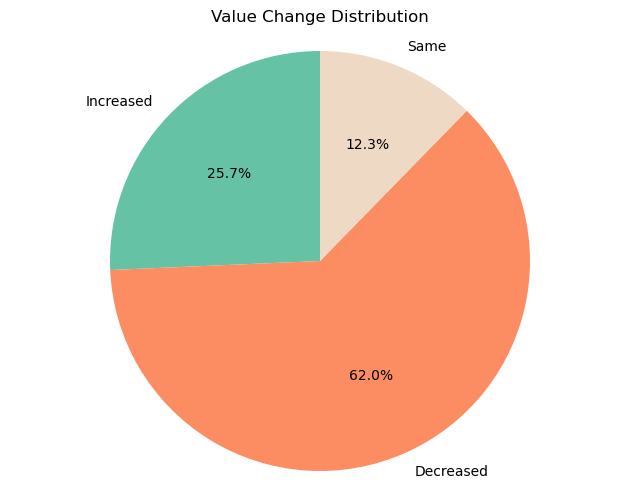


Total Market Value in 2020: €22.17 billion
Total Market Value in 2021: €20.28 billion
Market Value Difference: €-1.88 billion
Market Value Change: -8.49%

Average Value of Players in Each League:
        League  Value (M€)
Premier League   20.167211
       La Liga   11.363272
       Serie A   10.919776
    Bundesliga   10.695888
       Ligue 1    9.404870


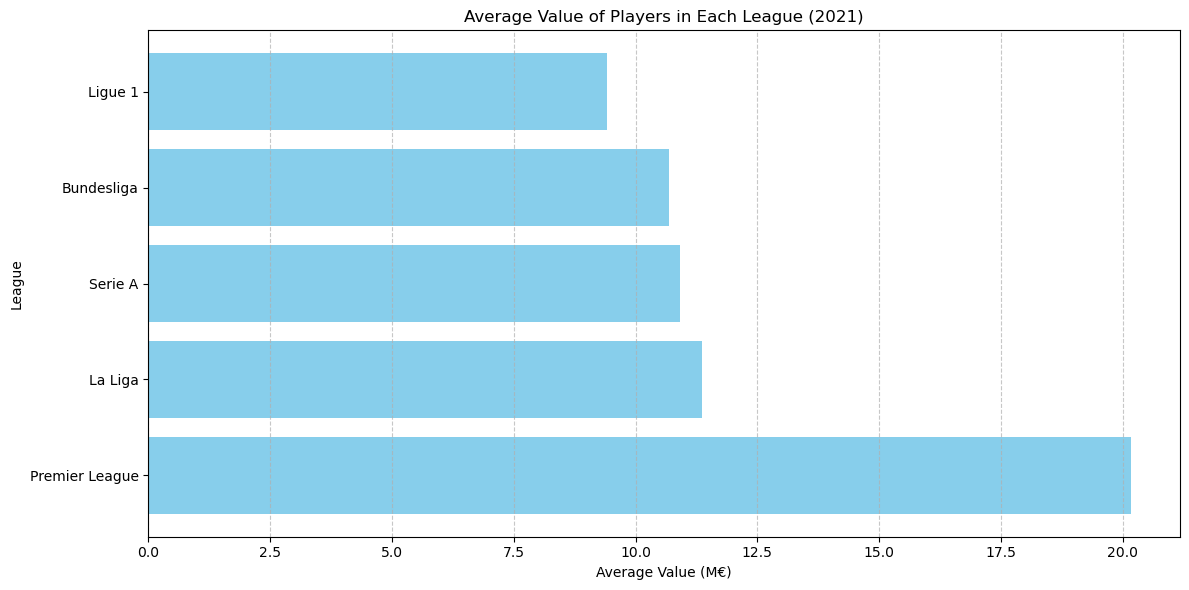


Average Value of Players in Each Position:
          Position  Value (M€)
       Left Winger   16.296667
Attacking Midfield   16.137000
      Right Winger   15.382627
    Second Striker   14.518333
    Centre-Forward   13.814043
  Central Midfield   13.144053
       Centre-Back   11.917880
Defensive Midfield   11.735976
         Left-Back    9.902290
     Left Midfield    9.454545
    Right Midfield    8.723529
        Right-Back    8.617751


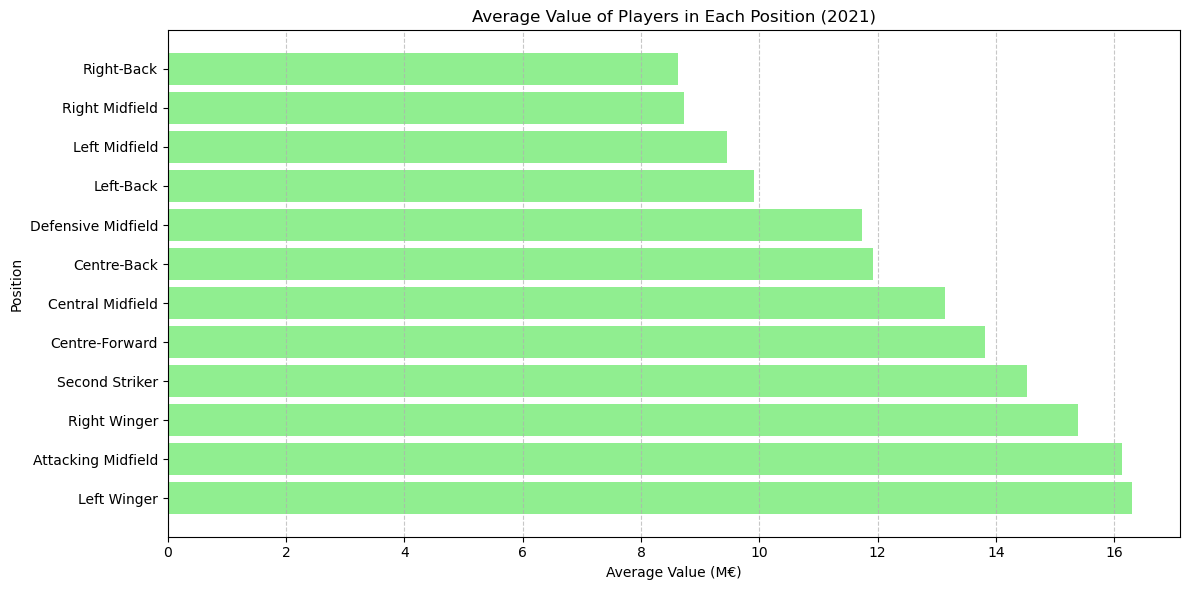


Average Value of Players in Each Category:
  Category  Value (M€)
   Forward   14.778805
Midfielder   13.052794
  Defender   10.583847


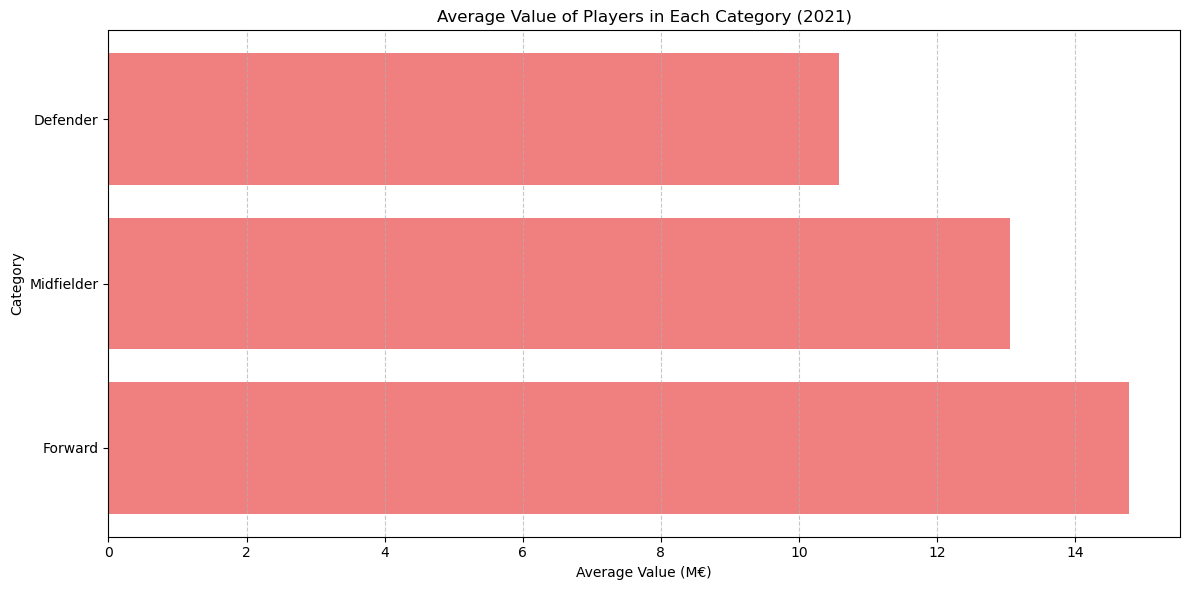


Average Value of Players by Age:
 Age  Value (M€)
  18   22.984091
  22   19.952041
  21   18.911798
  24   16.732877
  20   16.050909
  25   15.870992
  16   15.000000
  23   14.893972
  27   14.329921
  26   14.205000
  28   12.659322
  29    9.788846
  17    9.500000
  30    8.420408
  19    8.276316
  36    4.194444
  32    3.780357
  31    3.586236
  34    3.017442
  33    2.919565
  35    2.369444
  39    2.000000
  38    1.000000
  37    0.566667


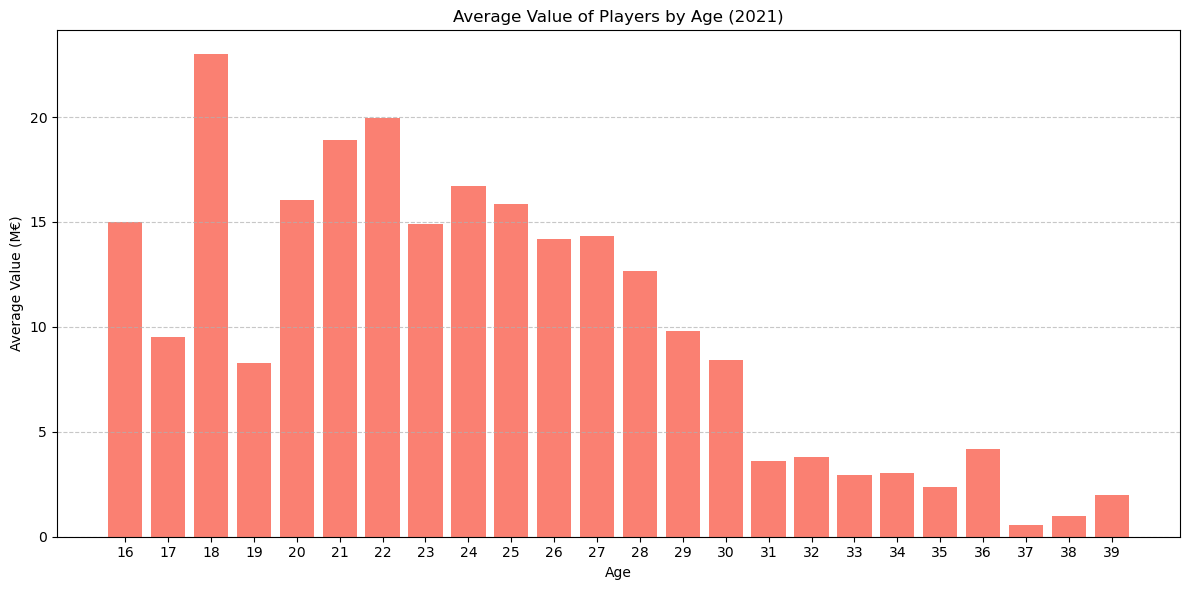

In [4]:
# Players with the highest value increase
top_increase = df.nlargest(10, 'Value Difference')
print("Top 10 Players with Highest Value Increase:")
# Convert to millions and format
top_increase_display = top_increase.copy()
top_increase_display['Value Difference (M€)'] = top_increase_display['Value Difference'] / 1e6
print(top_increase_display[['Player', 'Value Difference (M€)']].to_string(index=False))

# Players with the highest value decrease
top_decrease = df.nsmallest(10, 'Value Difference')
print("\nTop 10 Players with Highest Value Decrease:")
# Convert to millions and format
top_decrease_display = top_decrease.copy()
top_decrease_display['Value Difference (M€)'] = top_decrease_display['Value Difference'] / 1e6
print(top_decrease_display[['Player', 'Value Difference (M€)']].to_string(index=False))

# Players with the highest value increase (%)
top_increase_percent = df.nlargest(10, 'Value Difference (%)')
print("\nTop 10 Players with Highest Value Increase (%):")
print(top_increase_percent[['Player', 'Value Difference (%)']].to_string(index=False))
# Players with the highest value decrease (%)
top_decrease_percent = df.nsmallest(10, 'Value Difference (%)')
print("\nTop 10 Players with Highest Value Decrease (%):")
print(top_decrease_percent[['Player', 'Value Difference (%)']].to_string(index=False))

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Print how many player's value increased and decreased
print("\n=== Value Change Analysis ===")
value_increased = df[df['Value Difference'] > 0].shape[0]
value_same = df[df['Value Difference'] == 0].shape[0]
value_decreased = df[df['Value Difference'] < 0].shape[0]
print(f"Number of players with increased value: {value_increased}")
print(f"Number of players with decreased value: {value_decreased}")
print(f"Number of players with same value: {value_same}")
# Show it on a pie chart
plt.figure(figsize=(8, 6))
plt.pie([value_increased, value_decreased,value_same], labels=['Increased', 'Decreased','Same'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62','#eed9c4'])
plt.title('Value Change Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Print the total market value of all players
total_market_value_2020 = df['Value (2020)'].sum()
total_markev_value_2021 = df['Value (2021)'].sum()
market_value_difference = total_markev_value_2021 - total_market_value_2020
market_value_change = (market_value_difference / total_market_value_2020) * 100
market_value_difference = market_value_difference / 1e9  # Convert to billions
total_market_value_2020 = total_market_value_2020 / 1e9  # Convert to billions
total_market_value_2021 = total_markev_value_2021 / 1e9  # Convert to billions
print(f"\nTotal Market Value in 2020: €{total_market_value_2020:.2f} billion")
print(f"Total Market Value in 2021: €{total_market_value_2021:.2f} billion")
print(f"Market Value Difference: €{market_value_difference:.2f} billion")
print(f"Market Value Change: {market_value_change:.2f}%")

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Calculate the average value of players in each league
average_value_per_league = df.groupby('League')['Value (2021)'].mean().reset_index()
average_value_per_league = average_value_per_league.sort_values(by='Value (2021)', ascending=False)
# Convert to millions
average_value_per_league['Value (M€)'] = average_value_per_league['Value (2021)'] / 1e6
print("\nAverage Value of Players in Each League:")
print(average_value_per_league[['League', 'Value (M€)']].to_string(index=False))

# Plot the average value of players in each league (in millions)
plt.figure(figsize=(12, 6))
plt.barh(average_value_per_league['League'], average_value_per_league['Value (M€)'], color='skyblue')
plt.xlabel('Average Value (M€)')
plt.ylabel('League')
plt.title('Average Value of Players in Each League (2021)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Calculate the average value of players in each position
average_value_per_position = df.groupby('Position')['Value (2021)'].mean().reset_index()
average_value_per_position = average_value_per_position.sort_values(by='Value (2021)', ascending=False)
# Convert to millions
average_value_per_position['Value (M€)'] = average_value_per_position['Value (2021)'] / 1e6
print("\nAverage Value of Players in Each Position:")
print(average_value_per_position[['Position', 'Value (M€)']].to_string(index=False))

# Plot the average value of players in each position (in millions)
plt.figure(figsize=(12, 6))
plt.barh(average_value_per_position['Position'], average_value_per_position['Value (M€)'], color='lightgreen')
plt.xlabel('Average Value (M€)')
plt.ylabel('Position')
plt.title('Average Value of Players in Each Position (2021)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Calculate the average value of players in each category
average_value_per_category = df.groupby('Category')['Value (2021)'].mean().reset_index()
average_value_per_category = average_value_per_category.sort_values(by='Value (2021)', ascending=False)
# Convert to millions
average_value_per_category['Value (M€)'] = average_value_per_category['Value (2021)'] / 1e6
print("\nAverage Value of Players in Each Category:")
print(average_value_per_category[['Category', 'Value (M€)']].to_string(index=False))

# Plot the average value of players in each category (in millions)
plt.figure(figsize=(12, 6))
plt.barh(average_value_per_category['Category'], average_value_per_category['Value (M€)'], color='lightcoral')
plt.xlabel('Average Value (M€)')
plt.ylabel('Category')
plt.title('Average Value of Players in Each Category (2021)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#-----------------------------------------
#-----------------------------------------
#-----------------------------------------

# Calculate the average value of players in each age
average_value_per_age = df.groupby('Age')['Value (2021)'].mean().reset_index()
average_value_per_age = average_value_per_age.sort_values(by='Value (2021)', ascending=False)
# Convert to millions
average_value_per_age['Value (M€)'] = average_value_per_age['Value (2021)'] / 1e6
print("\nAverage Value of Players by Age:")
print(average_value_per_age[['Age', 'Value (M€)']].to_string(index=False))

# Plot the average value of players by age (in millions)
plt.figure(figsize=(12, 6))
plt.bar(average_value_per_age['Age'], average_value_per_age['Value (M€)'], color='salmon')
plt.xlabel('Age')
plt.ylabel('Average Value (M€)')
plt.title('Average Value of Players by Age (2021)')
plt.xticks(average_value_per_age['Age'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


=== Value Change Analysis ===
Number of players with increased value: 413
Number of players with decreased value: 997


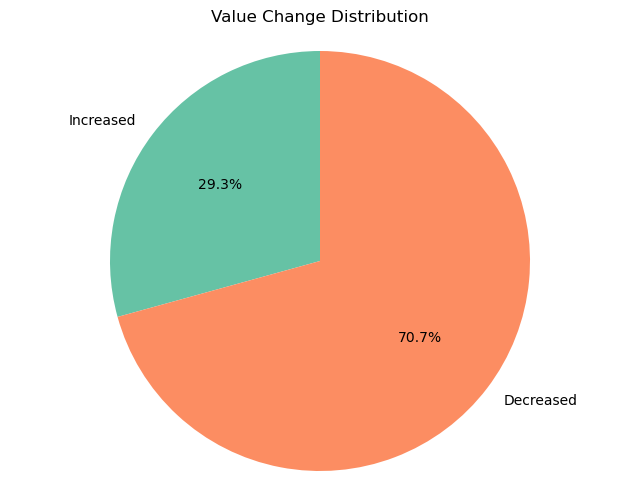

In [4]:
# Print how many player's value increased and decreased
print("\n=== Value Change Analysis ===")
value_increased = df[df['Value Difference'] > 0].shape[0]
value_decreased = df[df['Value Difference'] < 0].shape[0]
print(f"Number of players with increased value: {value_increased}")
print(f"Number of players with decreased value: {value_decreased}")
# Show it on a pie chart
plt.figure(figsize=(8, 6))
plt.pie([value_increased, value_decreased], labels=['Increased', 'Decreased'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Value Change Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


Analyse stats on their correlation with Value (2020), Value(2021), Value Difference, Value Difference (%)

=== Overall Correlation Analysis ===

--- Value (2020) ---

Top 20 (most positive) correlations with Value (2020):
 1. Total Carries in Forward Direction (20/21): 0.532
 2. Number of Times Player was Pass Target (20/21): 0.526
 3. Non-penalty xG+ xA (20/21): 0.518
 4. Goal Creating Actions (20/21): 0.517
 5. Passes Leading to Shot Attempt (20/21): 0.514

Bottom 20 (most negative) correlations with Value (2020):
 1. Avg Shot Distance (yds) (20/21): -0.051
 2. % Aerial Duels Won (20/21): -0.046
 3. % of Dribblers Tackled (20/21): -0.036
 4. Goal Saving Blocks (20/21): -0.027
 5. Penalties Conceded (20/21): -0.006


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


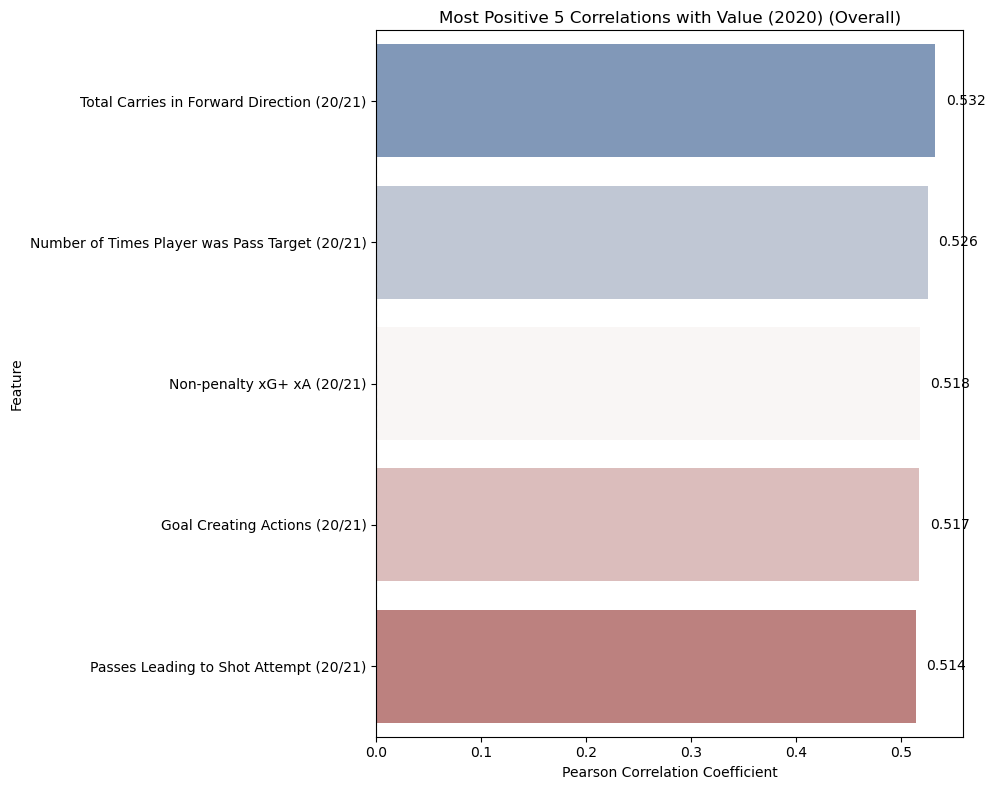

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


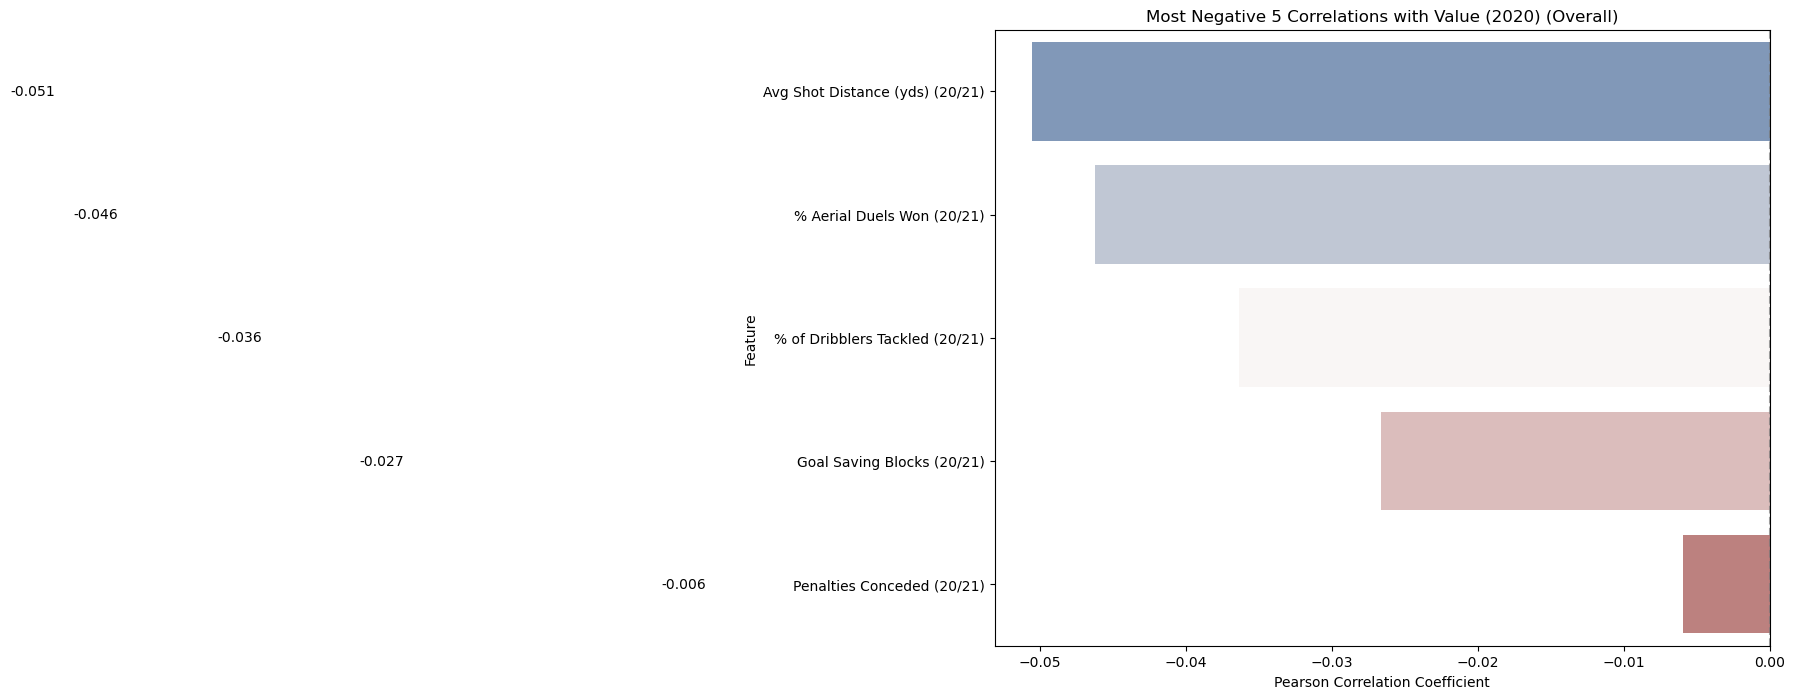


--- Value (2021) ---

Top 20 (most positive) correlations with Value (2021):
 1. Total Carries in Forward Direction (20/21): 0.485
 2. Number of Times Player was Pass Target (20/21): 0.472
 3. Goal Creating Actions (20/21): 0.469
 4. Non-penalty xG+ xA (20/21): 0.464
 5. Touches in Attacking Penalty Box (20/21): 0.463

Bottom 20 (most negative) correlations with Value (2021):
 1. Avg Shot Distance (yds) (20/21): -0.052
 2. % Aerial Duels Won (20/21): -0.044
 3. Goal Saving Blocks (20/21): -0.030
 4. % of Dribblers Tackled (20/21): -0.027
 5. % of Times Successfully Received Pass (20/21): 0.003


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


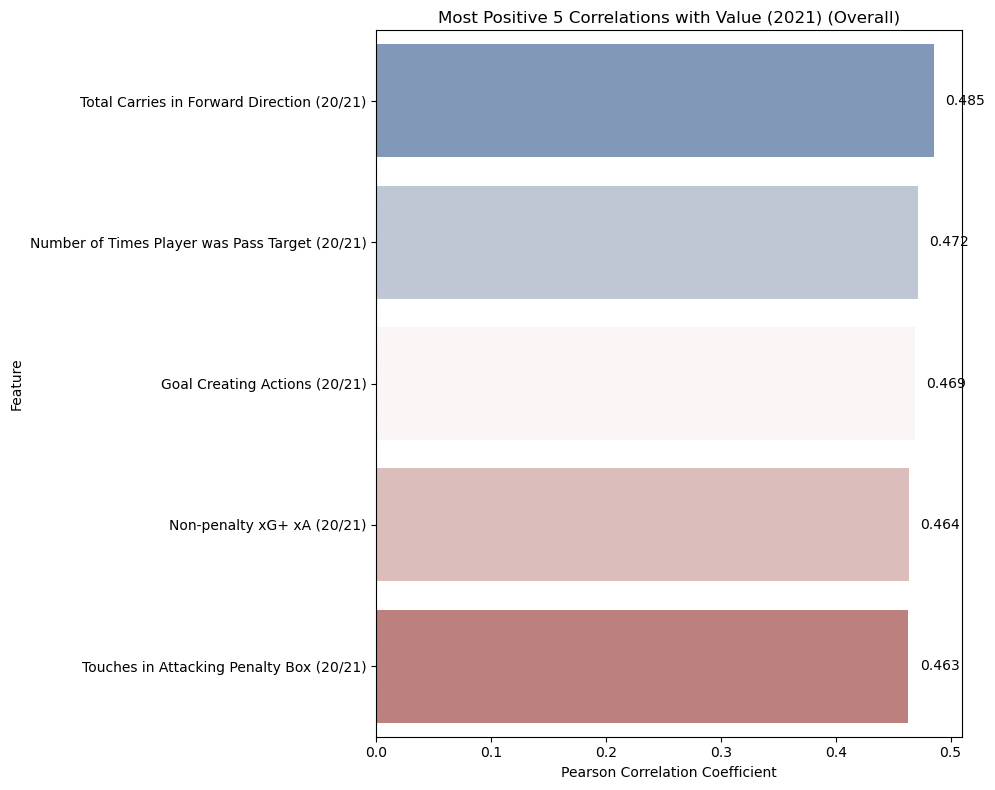

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


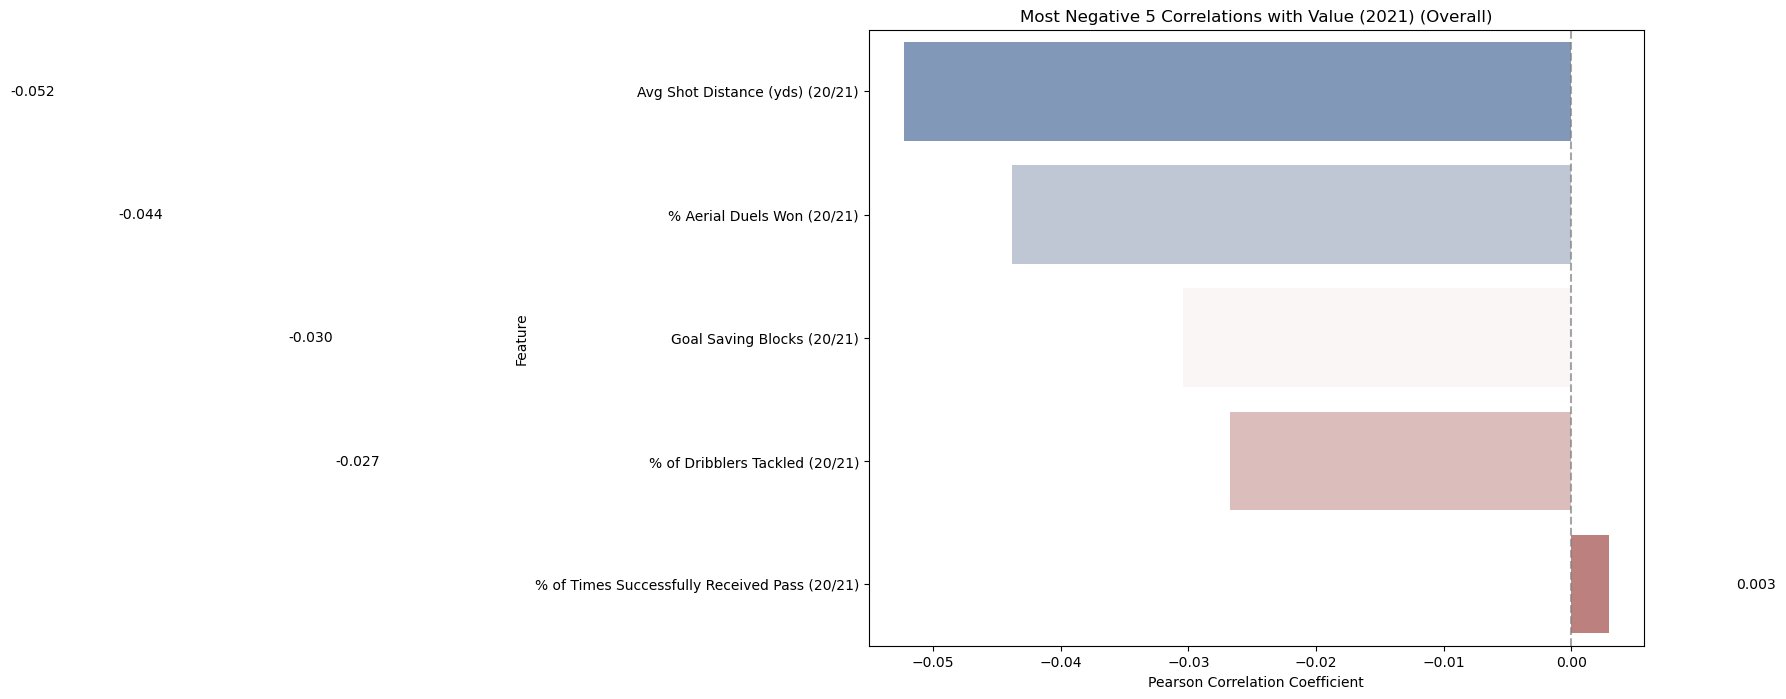


--- Value Difference ---

Top 20 (most positive) correlations with Value Difference:
 1. Tackles in Defensive 3rd (20/21): 0.039
 2. Number of Presses in Defensive Third (20/21): 0.031
 3. Penalties Conceded (20/21): 0.030
 4. % of Dribblers Tackled (20/21): 0.027
 5. Total Number of Players Tackled (20/21): 0.018

Bottom 20 (most negative) correlations with Value Difference:
 1. Gls (20/21): -0.176
 2. Number of Times Player was Pass Target (20/21): -0.173
 3. Non-penalty xG+ xA (20/21): -0.173
 4. xG (20/21): -0.170
 5. Total Shots on Target (20/21): -0.169


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


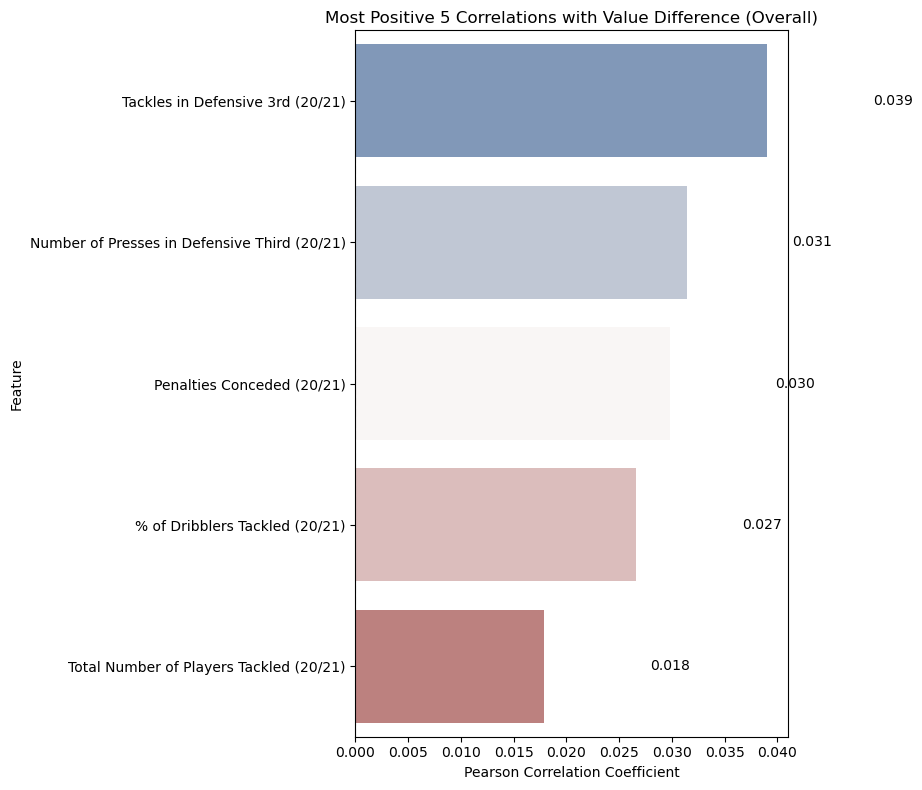

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


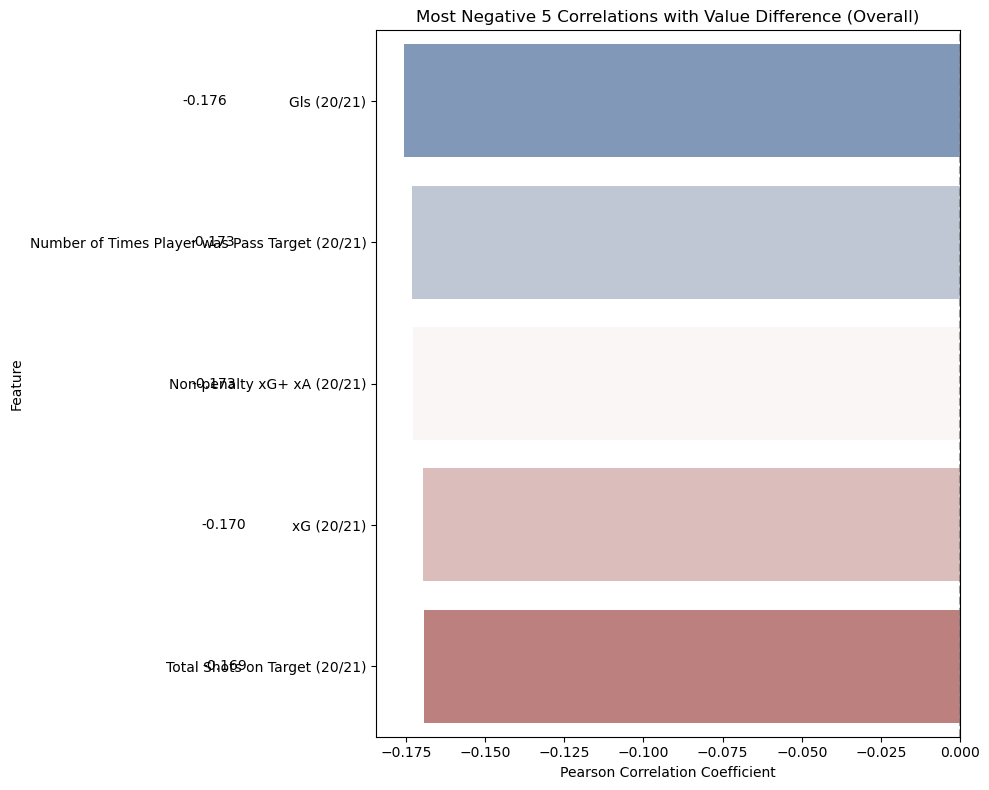

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (%) ---

Top 20 (most positive) correlations with Value Difference (%):
 1. Goals/Shots on Target (20/21): 0.077
 2. Goals/Shots (20/21): 0.047
 3. Non-Penalty Goals/90 (20/21): 0.029
 4. Pass Completion % (Long Passes) (20/21): 0.022
 5. 2nd Yellow Cards (20/21): 0.017

Bottom 20 (most negative) correlations with Value Difference (%):
 1. MP (20/21): -0.120
 2. Number of Times Player was Pass Target (20/21): -0.101
 3. Number of Times Received Pass (20/21): -0.098
 4. Passes Attempted (All pass-types) (20/21): -0.092
 5. Touches in Open-play (20/21): -0.092


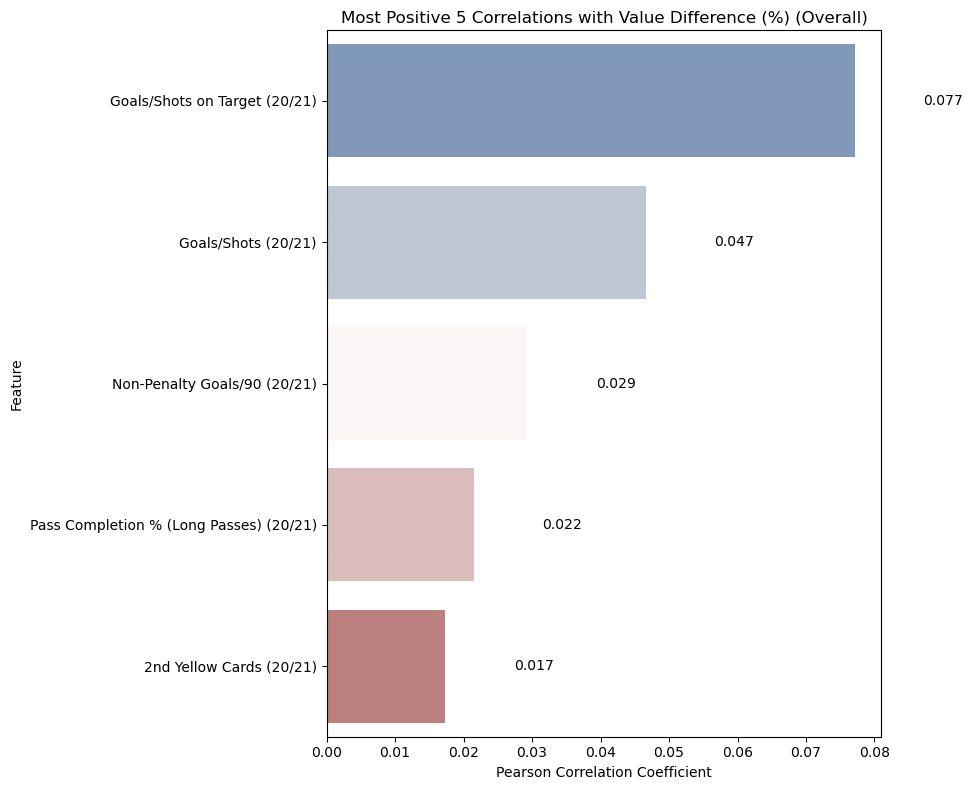

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


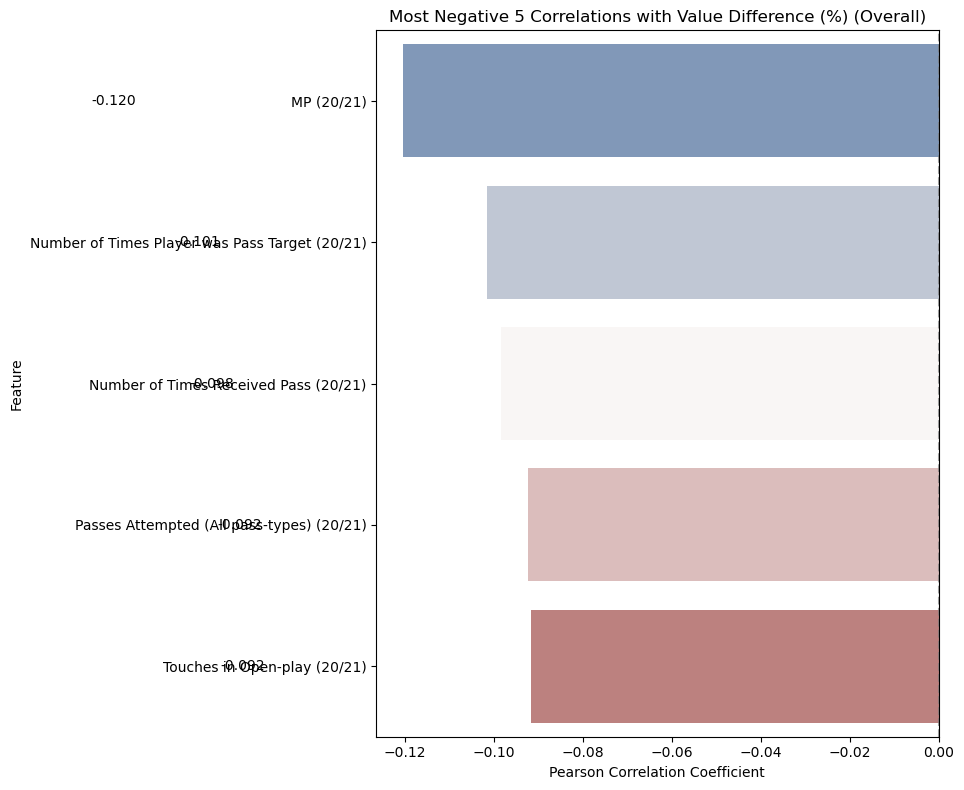


=== Group-wise Analysis by 'Category' ===

--- Group: Forward ---

--- Value (2020) (Group: Forward) ---

Top 20 (most positive) correlations with Value (2020) in group 'Forward':
 1. Touches in Attacking Penalty Box (20/21): 0.647
 2. Non-penalty xG+ xA (20/21): 0.645
 3. Carries into Attacking Penalty Box (20/21): 0.635
 4. Goal Creating Actions (20/21): 0.632
 5. Touches in Attacking 3rd (20/21): 0.617

Bottom 20 (most negative) correlations with Value (2020) in group 'Forward':
 1. % Aerial Duels Won (20/21): -0.045
 2. Penalties Conceded (20/21): -0.034
 3. 2nd Yellow Cards (20/21): -0.012
 4. Avg Shot Distance (yds) (20/21): -0.001
 5. Aerial Duel Won (20/21): 0.016


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


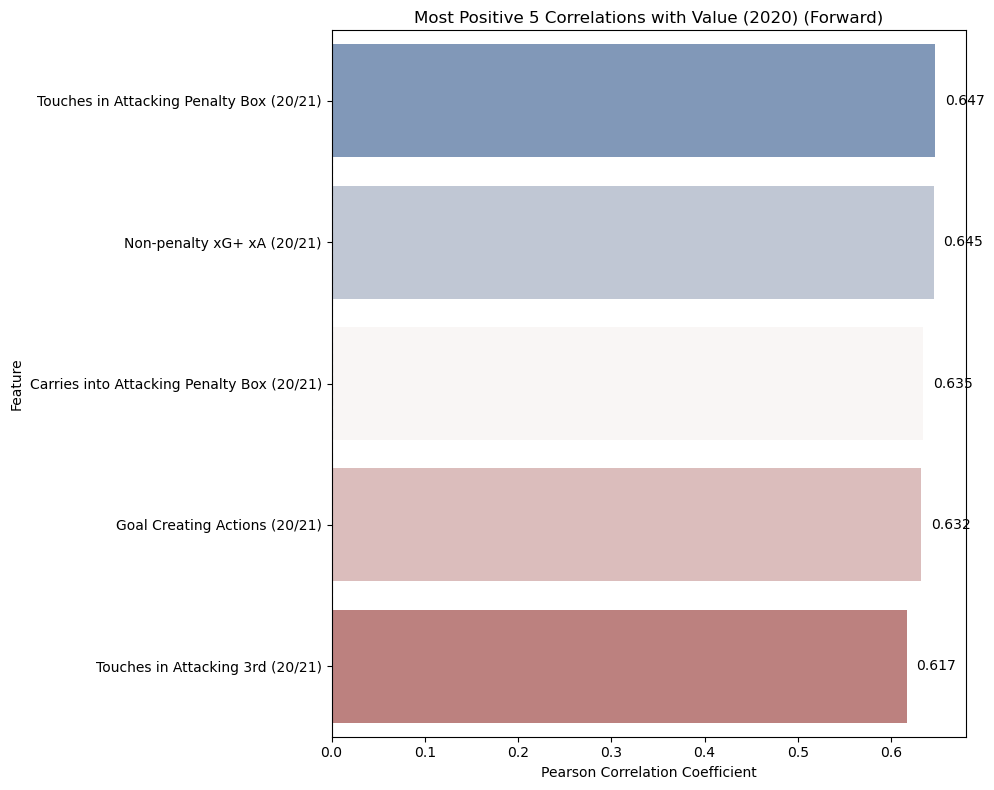

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


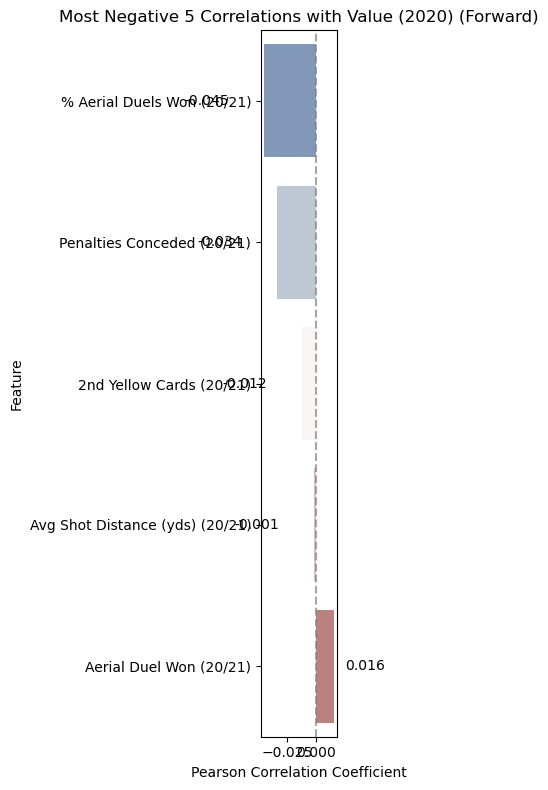

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value (2021) (Group: Forward) ---

Top 20 (most positive) correlations with Value (2021) in group 'Forward':
 1. Carries into Attacking Penalty Box (20/21): 0.596
 2. Touches in Attacking Penalty Box (20/21): 0.590
 3. Non-penalty xG+ xA (20/21): 0.581
 4. Goal Creating Actions (20/21): 0.564
 5. Touches in Attacking 3rd (20/21): 0.553

Bottom 20 (most negative) correlations with Value (2021) in group 'Forward':
 1. % Aerial Duels Won (20/21): -0.048
 2. 2nd Yellow Cards (20/21): -0.025
 3. Penalties Conceded (20/21): -0.015
 4. Avg Shot Distance (yds) (20/21): -0.011
 5. Red Cards (20/21): 0.017


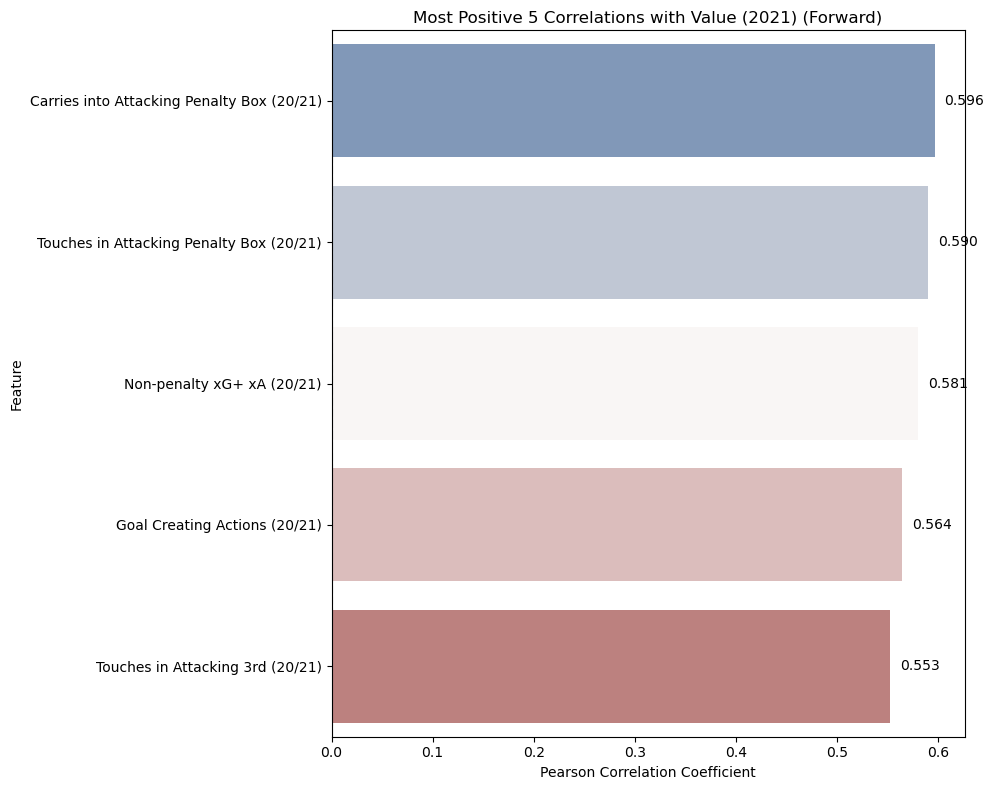

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


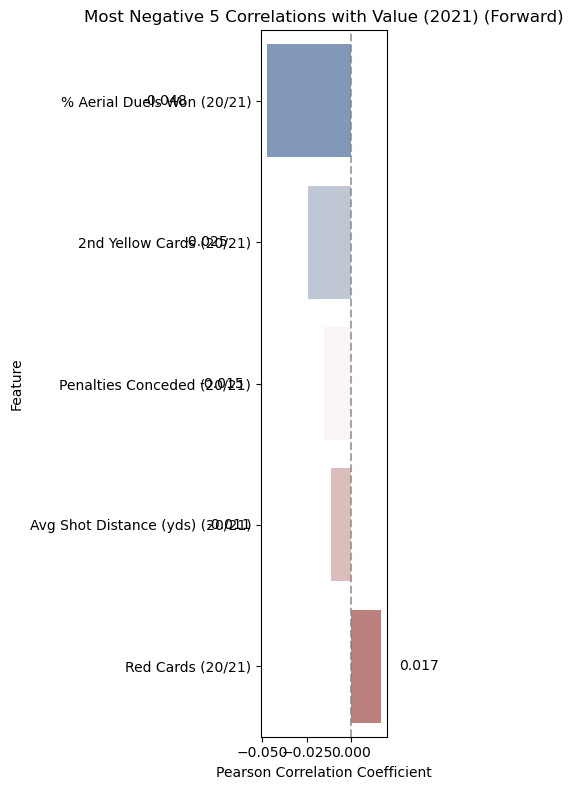


--- Value Difference (Group: Forward) ---

Top 20 (most positive) correlations with Value Difference in group 'Forward':
 1. Tackles in Defensive 3rd (20/21): 0.048
 2. Penalties Conceded (20/21): 0.047
 3. Aerial Duel Won (20/21): 0.024
 4. Number of Presses in Defensive Third (20/21): 0.023
 5. Aerial Duel Lost (20/21): 0.021

Bottom 20 (most negative) correlations with Value Difference in group 'Forward':
 1. Completed passes that enter Final 3rd (20/21): -0.255
 2. Total Completed Progressive Passes (20/21): -0.252
 3. Freekick Shots (20/21): -0.240
 4. Completed passes that enter Penalty Box (20/21): -0.237
 5. Total Shots (20/21): -0.237


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


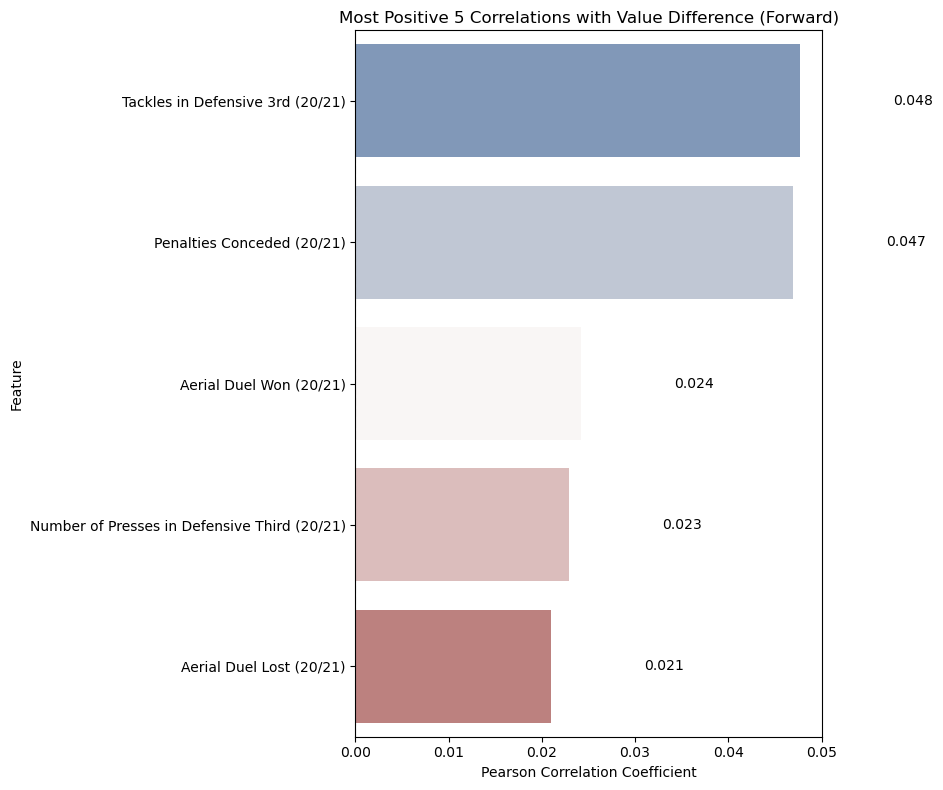

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


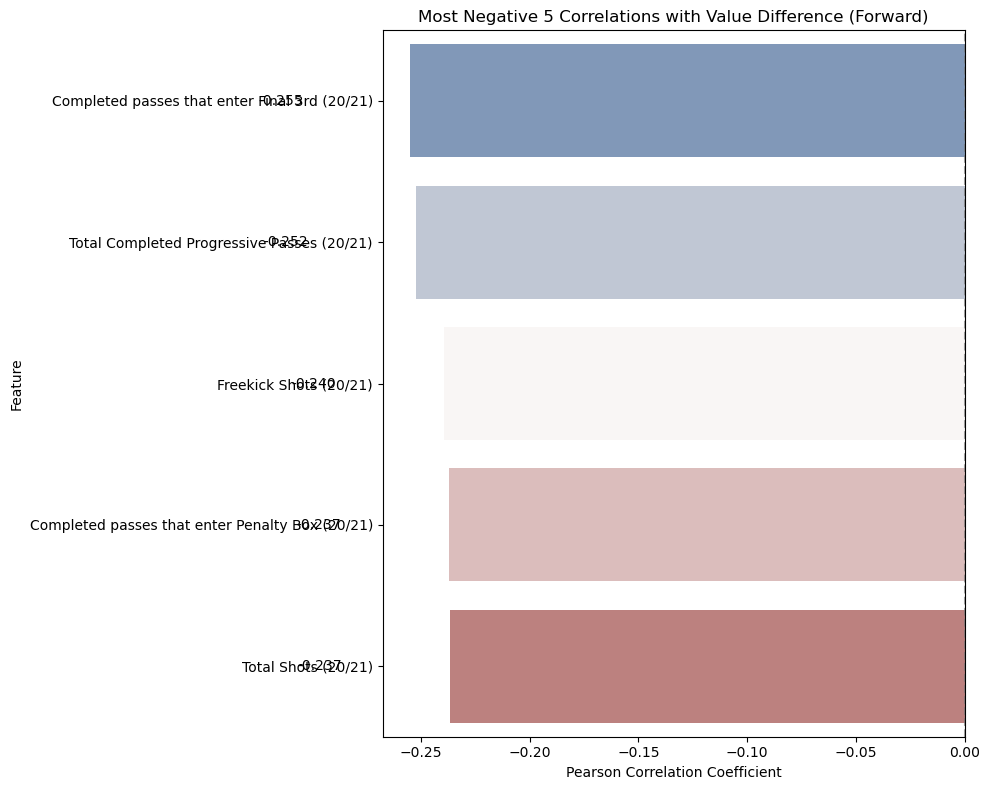


--- Value Difference (%) (Group: Forward) ---

Top 20 (most positive) correlations with Value Difference (%) in group 'Forward':
 1. Goals/Shots on Target (20/21): 0.162
 2. Goals/Shots (20/21): 0.122
 3. Pass Completion % (All pass-types) (20/21): 0.057
 4. Pass Completion % (Medium Passes) (20/21): 0.057
 5. Non-Penalty Goals/90 (20/21): 0.057

Bottom 20 (most negative) correlations with Value Difference (%) in group 'Forward':
 1. MP (20/21): -0.164
 2. Total Completed Progressive Passes (20/21): -0.093
 3. Passes Leading to Shot Attempt (20/21): -0.091
 4. Shot-Creating Actions (20/21): -0.090
 5. Passes Attempted (All pass-types) (20/21): -0.089


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


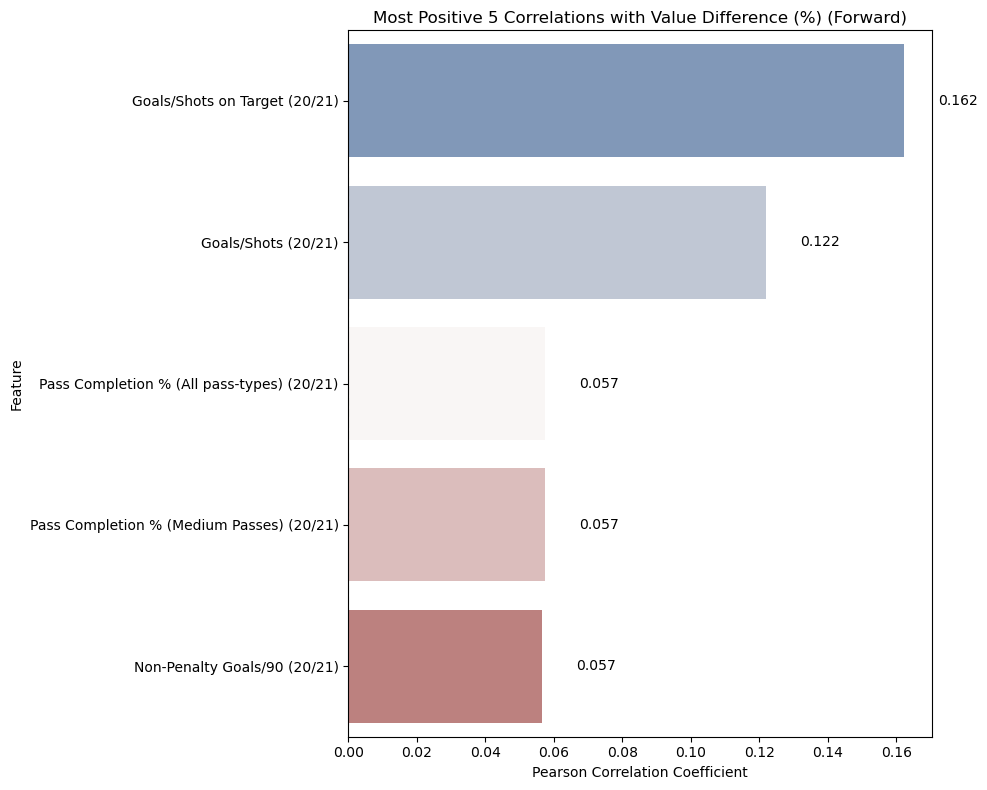

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


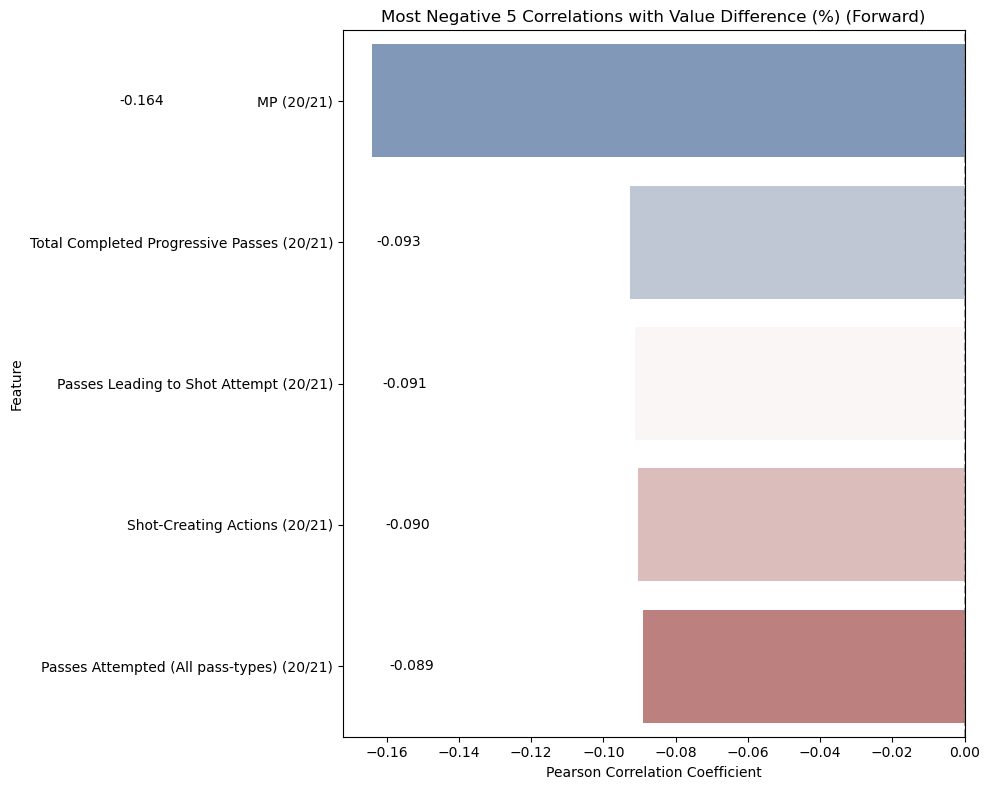


--- Group: Defender ---

--- Value (2020) (Group: Defender) ---

Top 20 (most positive) correlations with Value (2020) in group 'Defender':
 1. Number of Times Received Pass (20/21): 0.552
 2. Total Carries (20/21): 0.549
 3. Number of Times Player was Pass Target (20/21): 0.547
 4. Passes Completed (All pass-types) (20/21): 0.536
 5. Total Distance Carried the Ball (20/21): 0.527

Bottom 20 (most negative) correlations with Value (2020) in group 'Defender':
 1. Avg Shot Distance (yds) (20/21): -0.142
 2. Penalties Attempted (20/21): -0.028
 3. Penalties Scored (20/21): -0.026
 4. Goal Saving Blocks (20/21): -0.001
 5. 2nd Yellow Cards (20/21): 0.003


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


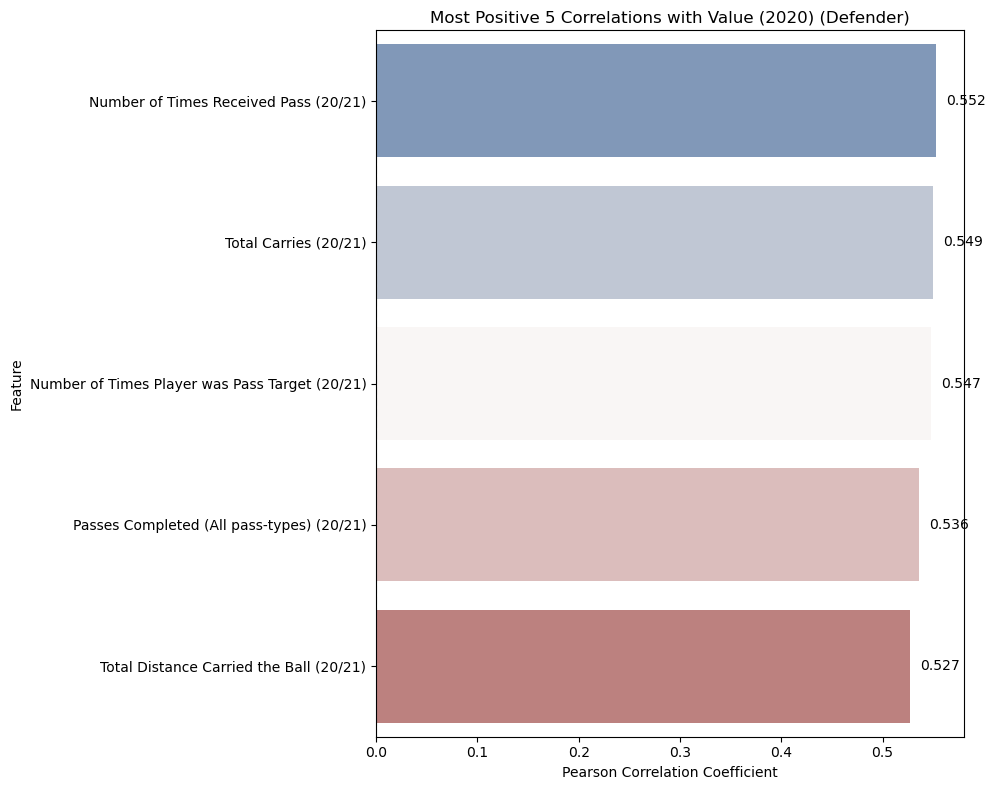

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


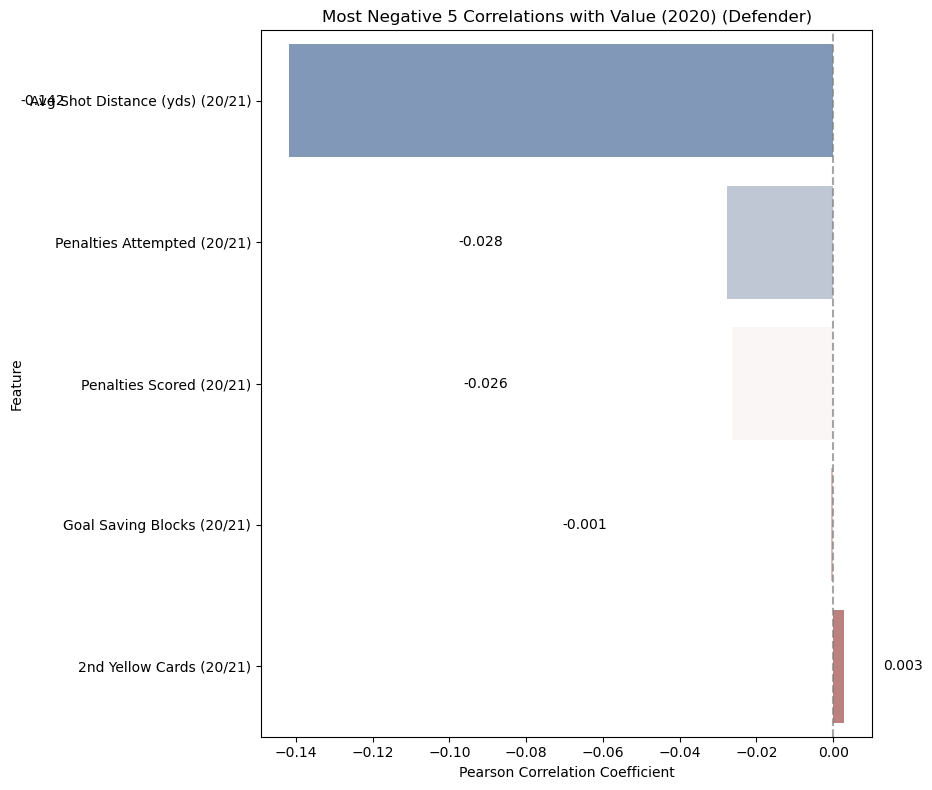


--- Value (2021) (Group: Defender) ---

Top 20 (most positive) correlations with Value (2021) in group 'Defender':
 1. Total Carries (20/21): 0.486
 2. Number of Times Received Pass (20/21): 0.484
 3. Number of Times Player was Pass Target (20/21): 0.480
 4. Total Distance Carried the Ball (20/21): 0.469
 5. Passes Completed (All pass-types) (20/21): 0.467

Bottom 20 (most negative) correlations with Value (2021) in group 'Defender':
 1. Avg Shot Distance (yds) (20/21): -0.134
 2. Penalties Attempted (20/21): -0.041
 3. Penalties Scored (20/21): -0.040
 4. Goal Saving Blocks (20/21): -0.020
 5. 2nd Yellow Cards (20/21): -0.000


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


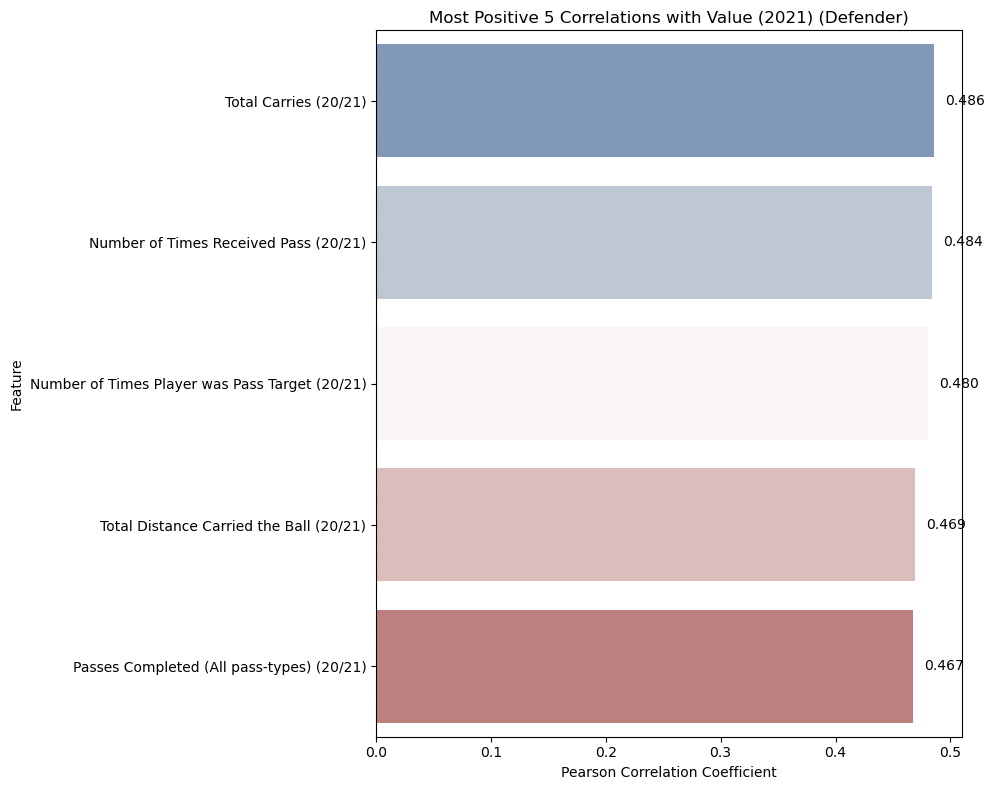

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


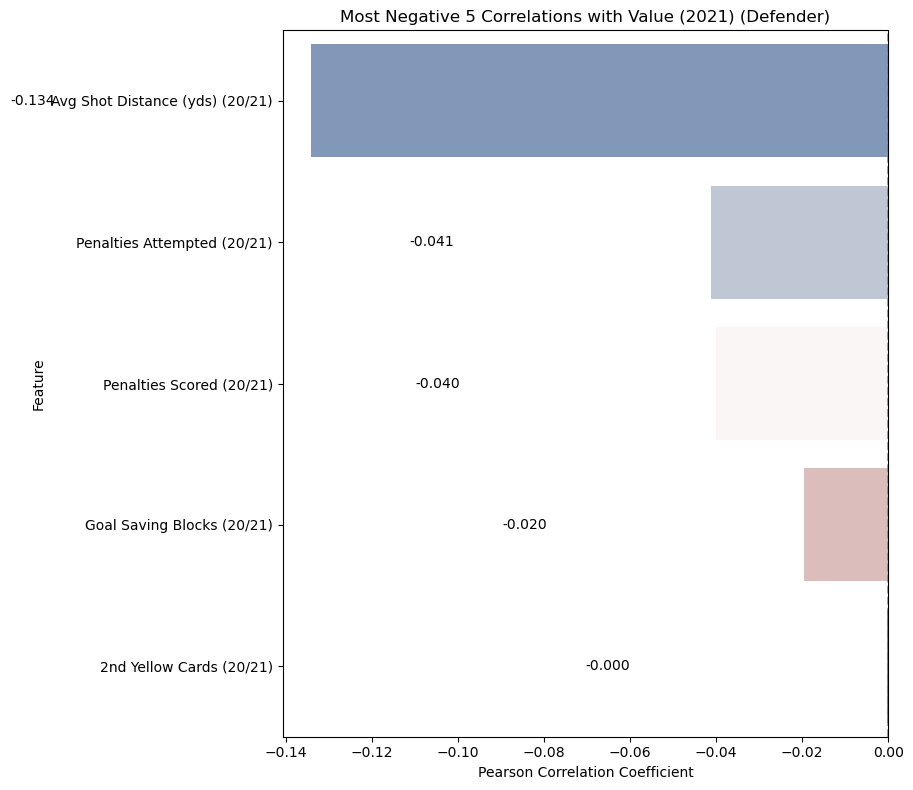

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (Group: Defender) ---

Top 20 (most positive) correlations with Value Difference in group 'Defender':
 1. Fouls Drawn Leading to Shot Attempt (20/21): 0.069
 2. Penalty Kicks Won (20/21): 0.061
 3. Dribbles Leading to Goals (20/21): 0.057
 4. Freekick Shots (20/21): 0.054
 5. Defensive Actions Leading to Goals (20/21): 0.050

Bottom 20 (most negative) correlations with Value Difference in group 'Defender':
 1. Number of Times Received Pass (20/21): -0.190
 2. Passes Completed (All pass-types) (20/21): -0.189
 3. Passes Completed (Medium Passes) (20/21): -0.186
 4. Total Distance of Completed Passes (All Pass-types) (20/21): -0.185
 5. Number of Times Player was Pass Target (20/21): -0.185


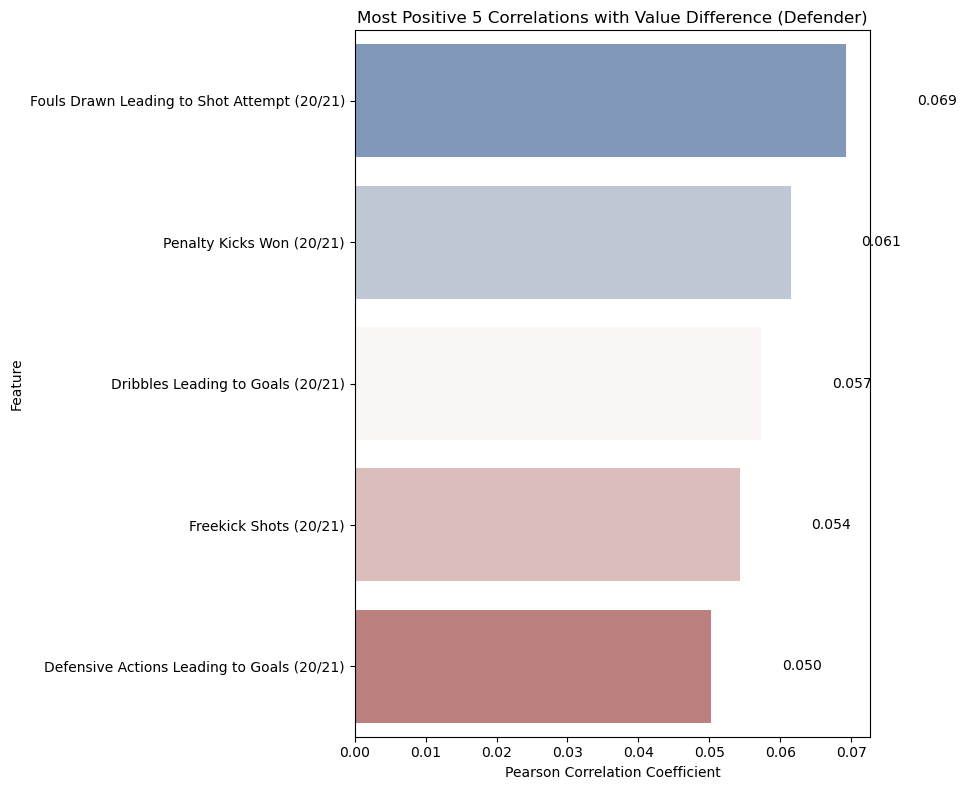

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


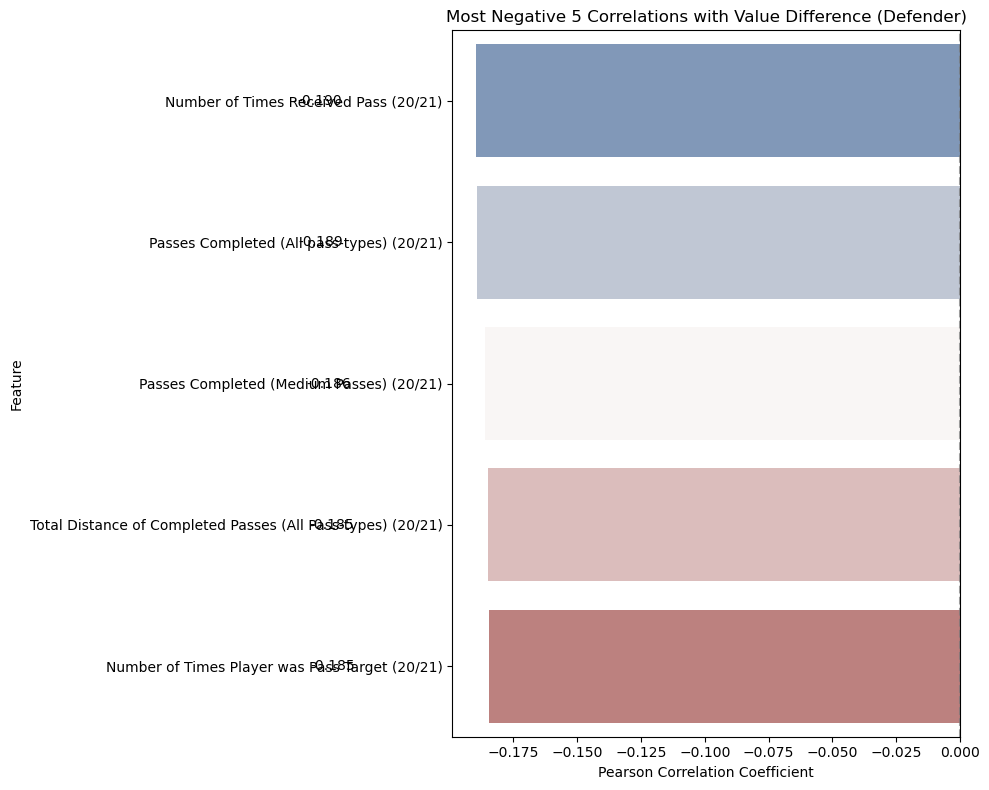


--- Value Difference (%) (Group: Defender) ---

Top 20 (most positive) correlations with Value Difference (%) in group 'Defender':
 1. Shots/90 (20/21): 0.078
 2. Goals/Shots on Target (20/21): 0.074
 3. Non-Penalty xG/90 (20/21): 0.070
 4. xG/90 (20/21): 0.058
 5. Non-Penalty xG/Shots (20/21): 0.038

Bottom 20 (most negative) correlations with Value Difference (%) in group 'Defender':
 1. Total Distance of Completed Passes (All Pass-types) (20/21): -0.154
 2. Passes Completed (All pass-types) (20/21): -0.152
 3. Number of Times Received Pass (20/21): -0.150
 4. Total Distance of Completed Progressive Passes (All Pass-types) (20/21): -0.149
 5. Passes Completed (Medium Passes) (20/21): -0.149


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


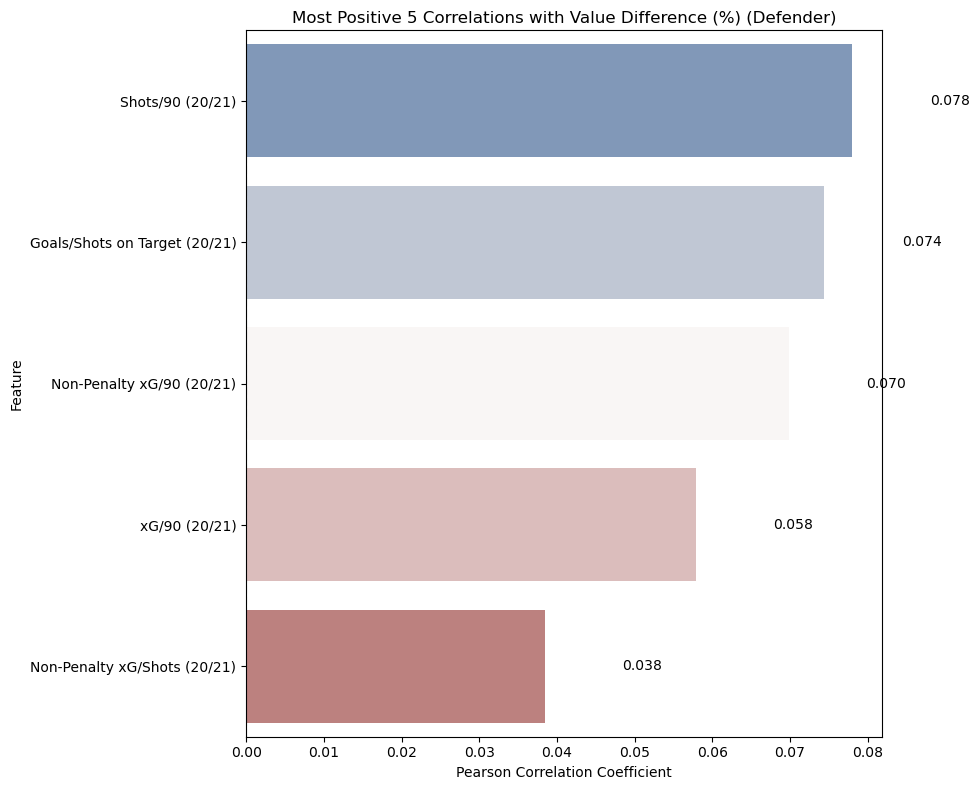

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


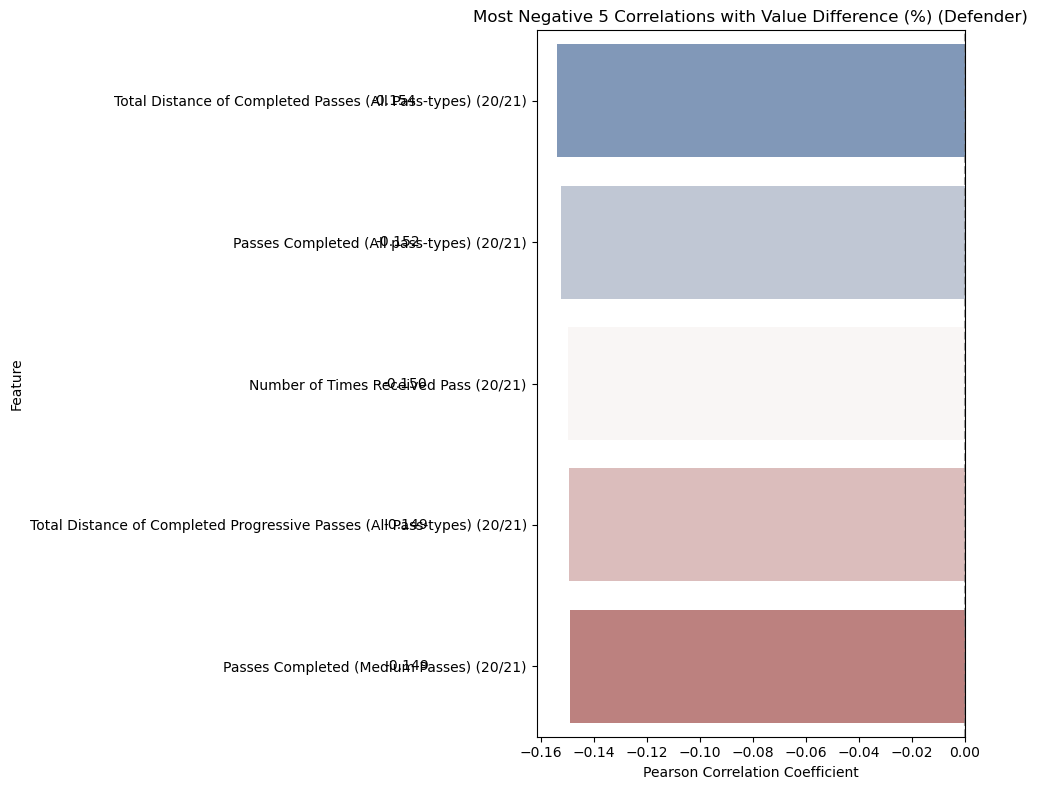


--- Group: Midfielder ---

--- Value (2020) (Group: Midfielder) ---

Top 20 (most positive) correlations with Value (2020) in group 'Midfielder':
 1. Total Carries in Forward Direction (20/21): 0.564
 2. Number of Times Player was Pass Target (20/21): 0.559
 3. Number of Times Received Pass (20/21): 0.559
 4. Total Distance Carried the Ball in Forward Direction (20/21): 0.550
 5. Total Carries (20/21): 0.547

Bottom 20 (most negative) correlations with Value (2020) in group 'Midfielder':
 1. Avg Shot Distance (yds) (20/21): -0.044
 2. % Aerial Duels Won (20/21): -0.021
 3. Goal Saving Blocks (20/21): -0.021
 4. Red Cards (20/21): -0.014
 5. Own Goals (20/21): -0.012


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


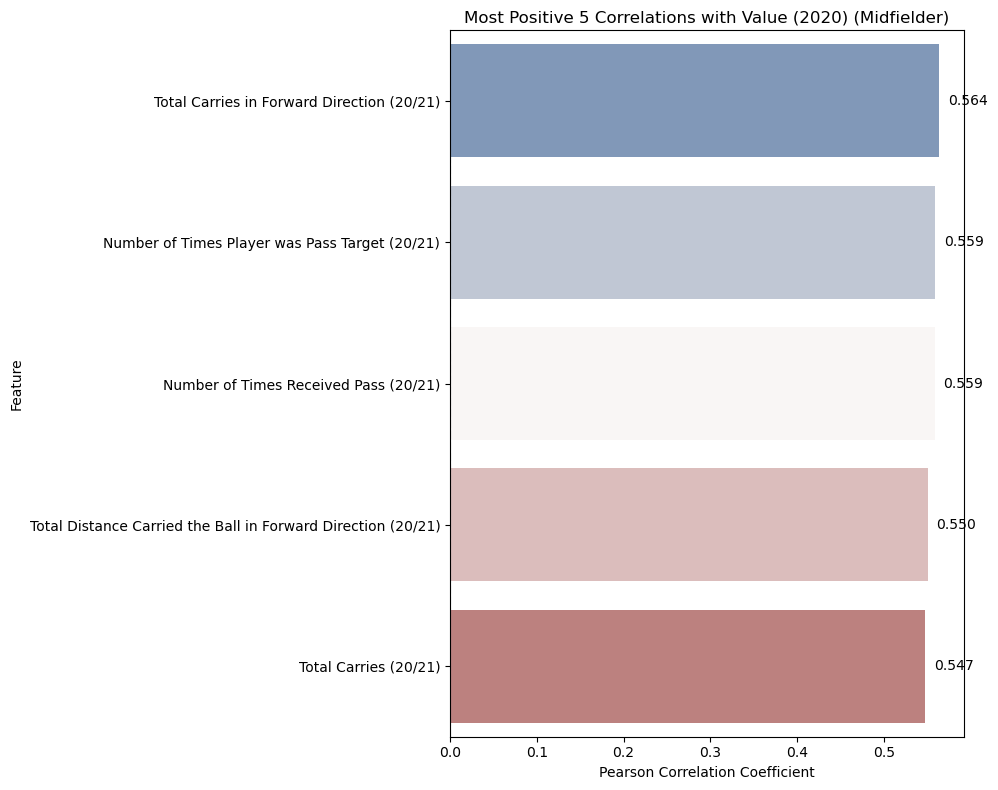

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


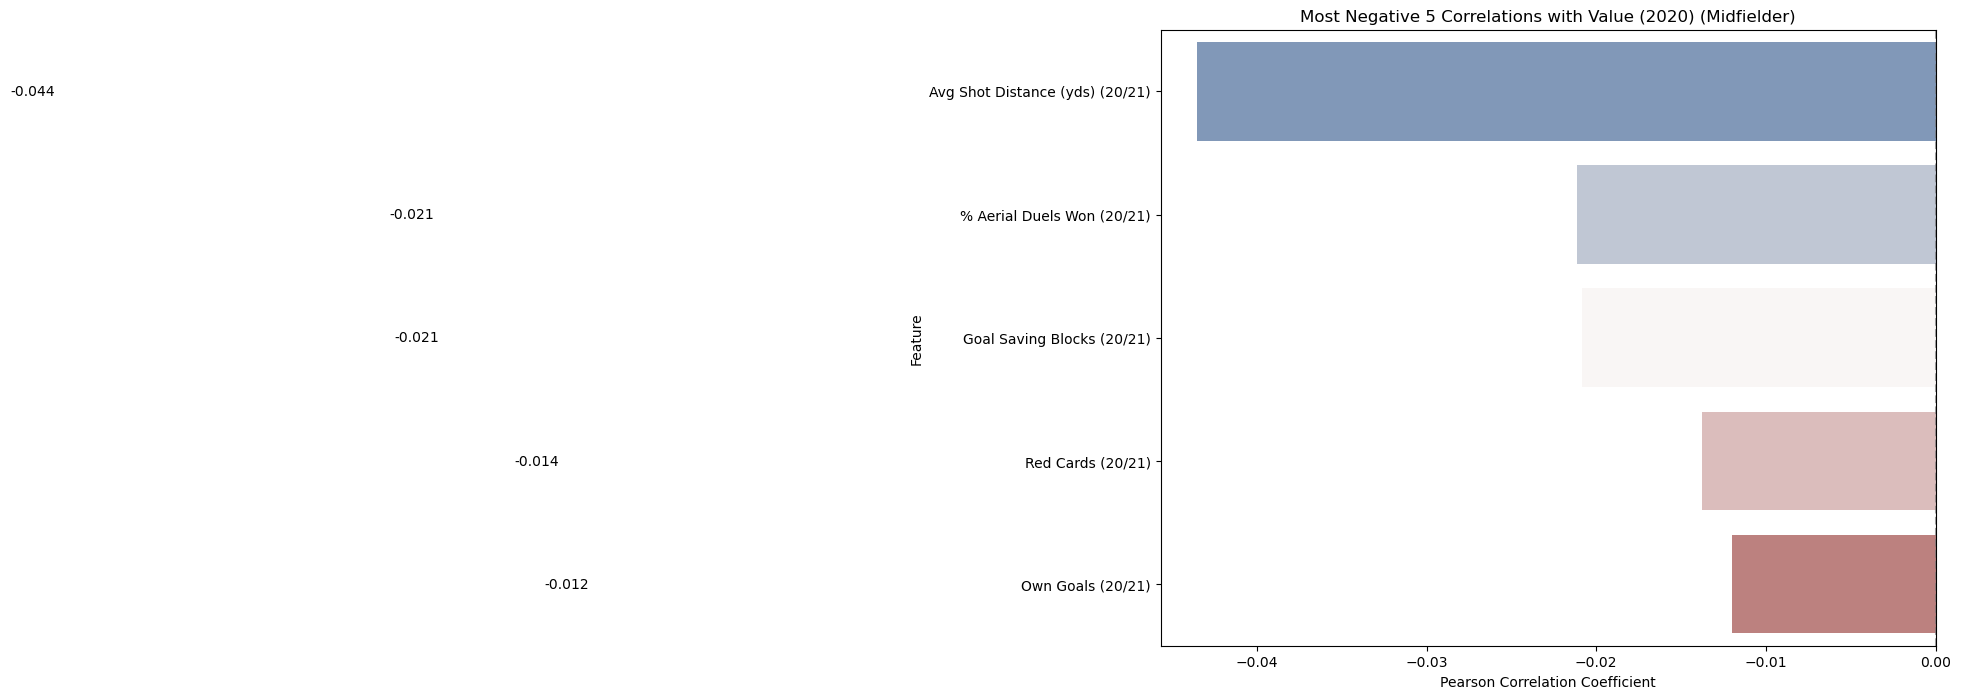


--- Value (2021) (Group: Midfielder) ---

Top 20 (most positive) correlations with Value (2021) in group 'Midfielder':
 1. Total Carries in Forward Direction (20/21): 0.519
 2. Total Distance Carried the Ball (20/21): 0.509
 3. Number of Times Player was Pass Target (20/21): 0.509
 4. Total Distance Carried the Ball in Forward Direction (20/21): 0.506
 5. Number of Times Received Pass (20/21): 0.505

Bottom 20 (most negative) correlations with Value (2021) in group 'Midfielder':
 1. Avg Shot Distance (yds) (20/21): -0.044
 2. % Aerial Duels Won (20/21): -0.018
 3. Goal Saving Blocks (20/21): -0.015
 4. % of Dribblers Tackled (20/21): -0.014
 5. Own Goals (20/21): 0.003


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


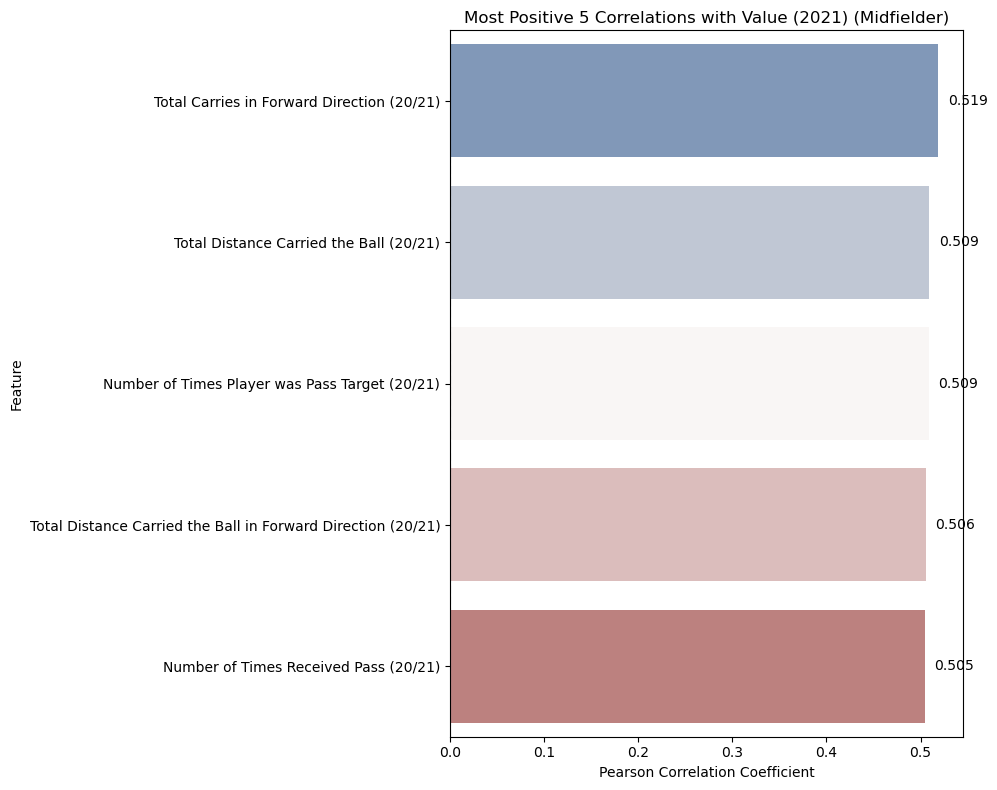

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


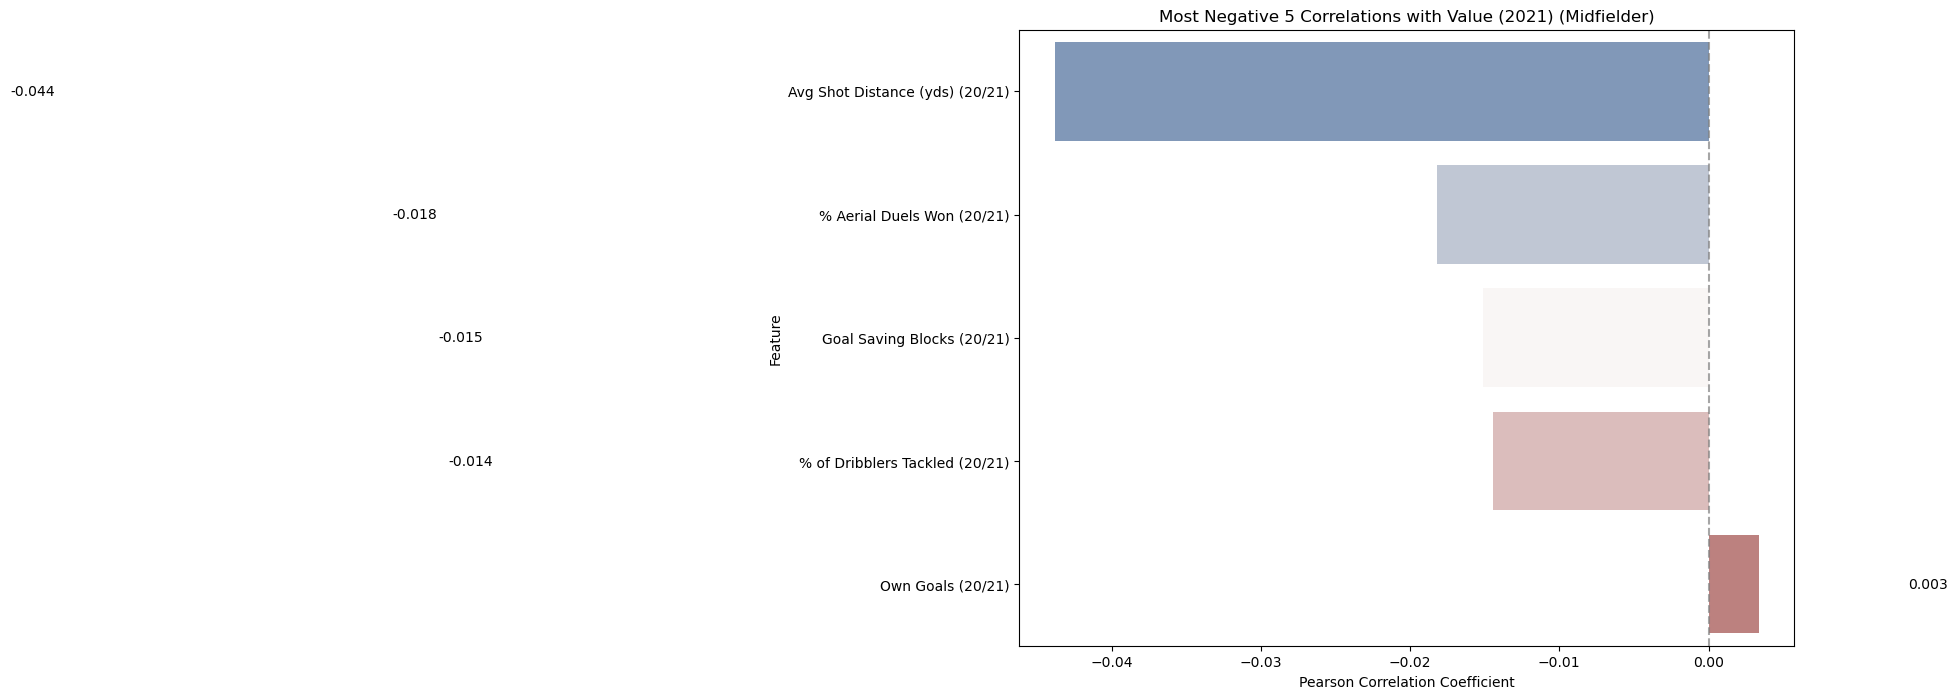


--- Value Difference (Group: Midfielder) ---

Top 20 (most positive) correlations with Value Difference in group 'Midfielder':
 1. Aerial Duel Lost (20/21): 0.058
 2. Red Cards (20/21): 0.055
 3. 2nd Yellow Cards (20/21): 0.050
 4. Aerial Duel Won (20/21): 0.042
 5. Own Goals (20/21): 0.039

Bottom 20 (most negative) correlations with Value Difference in group 'Midfielder':
 1. Passes Completed (Short Passes) (20/21): -0.181
 2. Passes Attempted (Short Passes) (20/21): -0.172
 3. Number of Times Received Pass (20/21): -0.168
 4. Total Distance of Completed Progressive Passes (All Pass-types) (20/21): -0.164
 5. Passes Completed (All pass-types) (20/21): -0.162


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


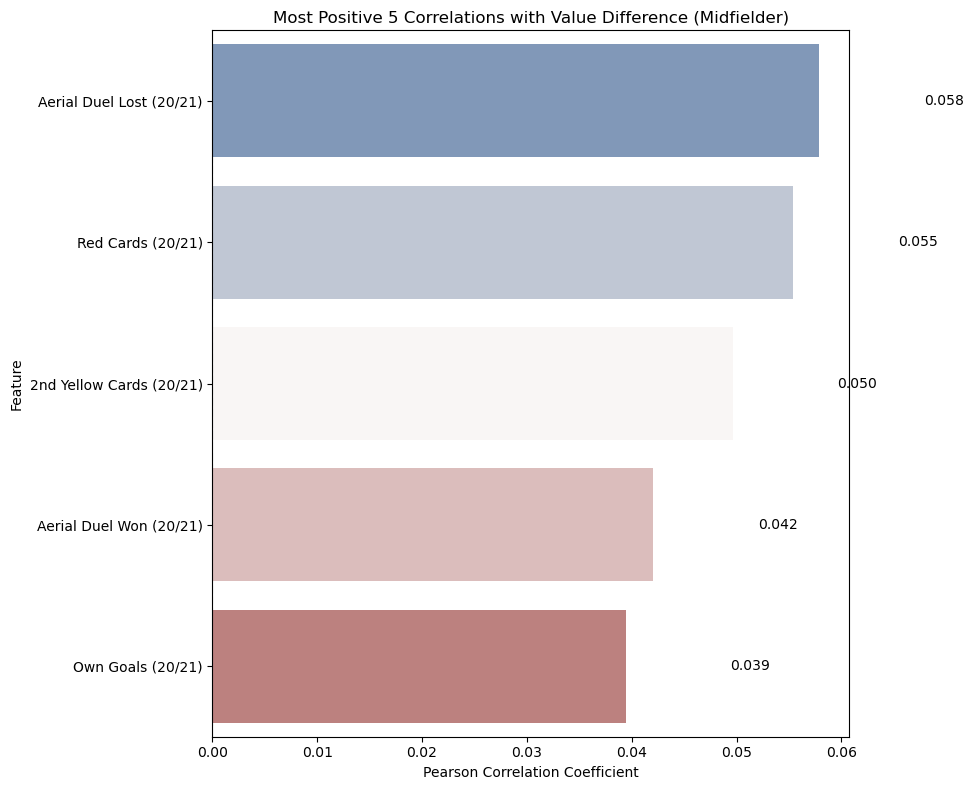

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


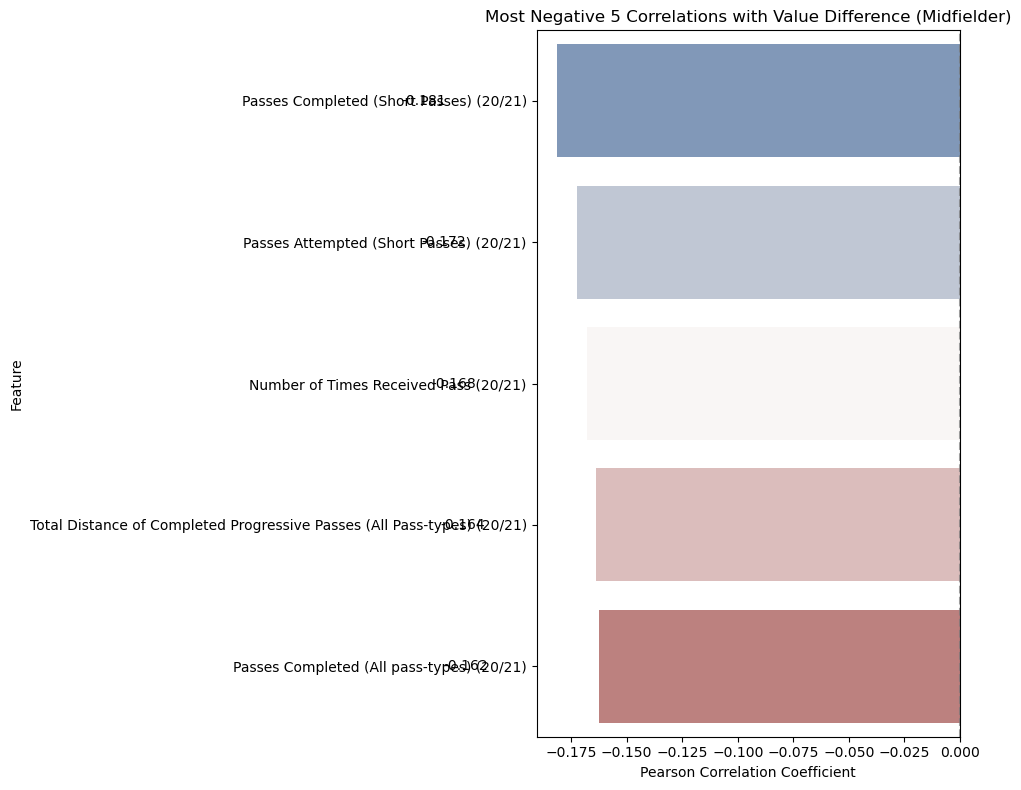


--- Value Difference (%) (Group: Midfielder) ---

Top 20 (most positive) correlations with Value Difference (%) in group 'Midfielder':
 1. 2nd Yellow Cards (20/21): 0.070
 2. Fouls Drawn Leading to Goals (20/21): 0.067
 3. Pass Completion % (Long Passes) (20/21): 0.061
 4. Aerial Duel Lost (20/21): 0.050
 5. Red Cards (20/21): 0.040

Bottom 20 (most negative) correlations with Value Difference (%) in group 'Midfielder':
 1. xA/90 (20/21): -0.116
 2. Ast/90 (20/21): -0.112
 3. (G+A)/90 (20/21): -0.111
 4. (xG+xA)/90 (20/21): -0.106
 5. % of Times Successfully Received Pass (20/21): -0.105


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


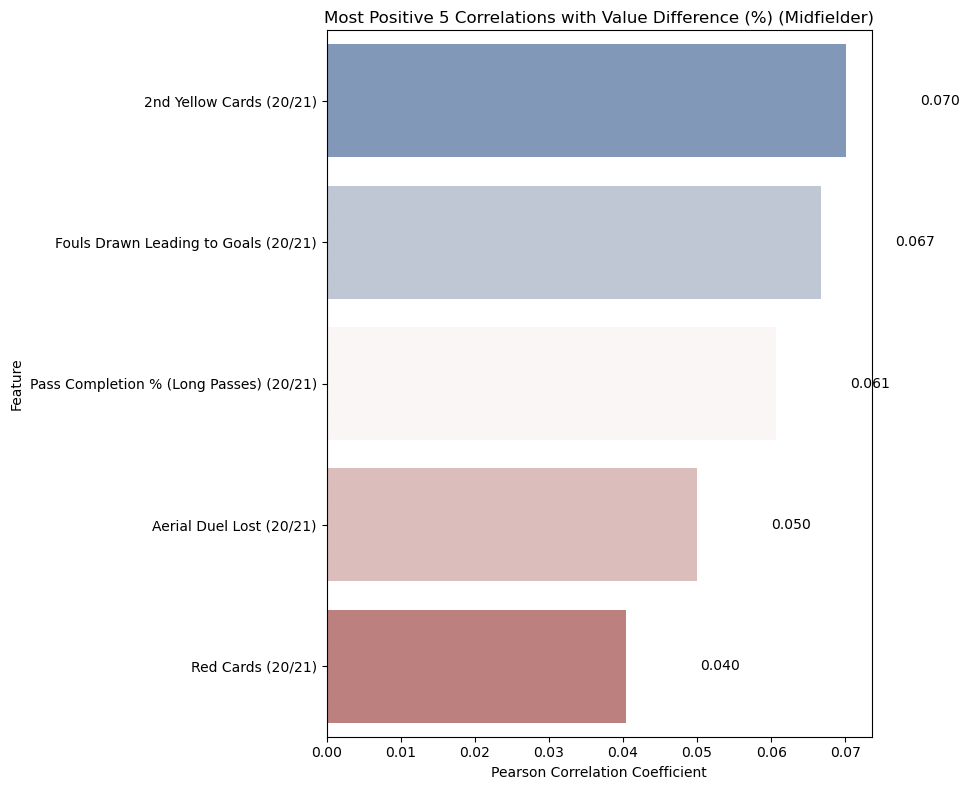

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


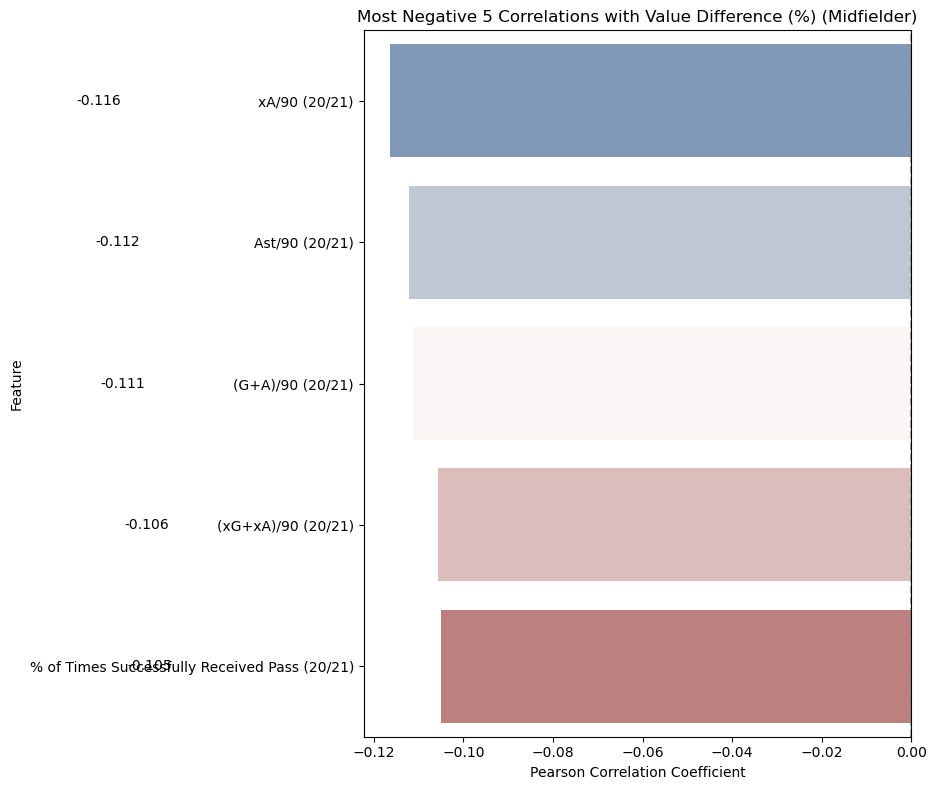


=== Group-wise Analysis by 'League' ===

--- League: Bundesliga ---
Number of players: 304

--- Value (2020) (League: Bundesliga) ---

Top 20 (most positive) correlations with Value (2020) in league 'Bundesliga':
 1. Non-penalty xG+ xA (20/21): 0.575
 2. Goal Creating Actions (20/21): 0.559
 3. Total Carries in Forward Direction (20/21): 0.559
 4. Touches in Attacking Penalty Box (20/21): 0.556
 5. Total Shots on Target (20/21): 0.551

Bottom 20 (most negative) correlations with Value (2020) in league 'Bundesliga':
 1. Avg Shot Distance (yds) (20/21): -0.085
 2. Own Goals (20/21): -0.015
 3. Penalties Conceded (20/21): -0.011
 4. 2nd Yellow Cards (20/21): -0.003
 5. Goal Saving Blocks (20/21): 0.000


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


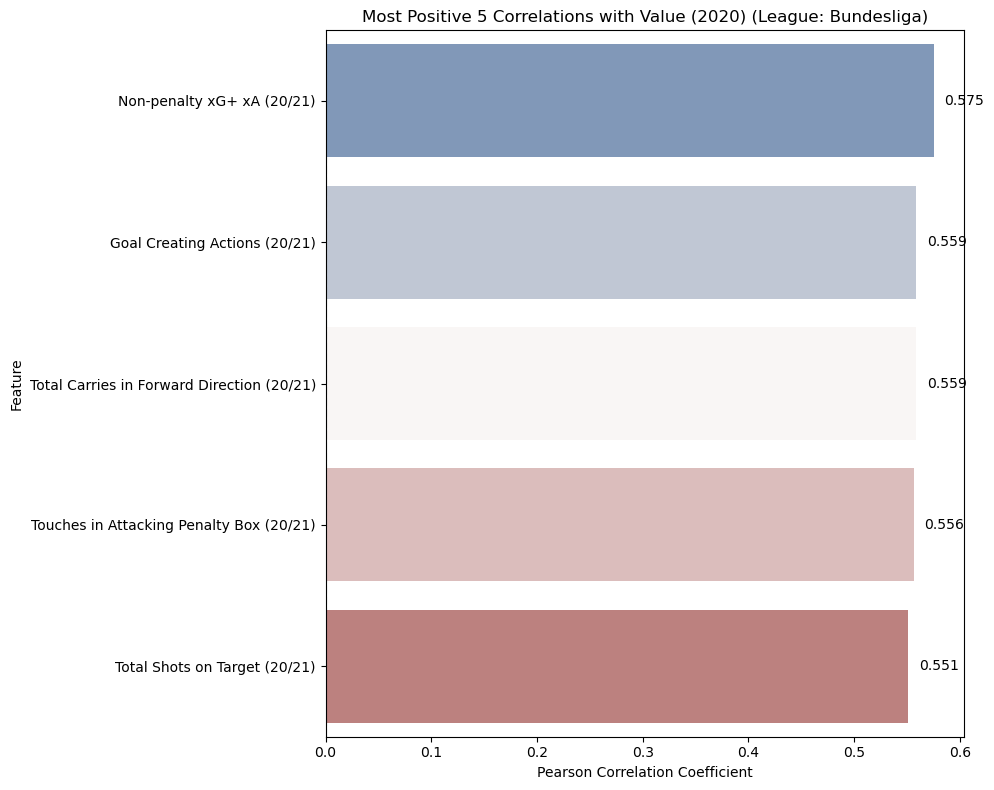

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


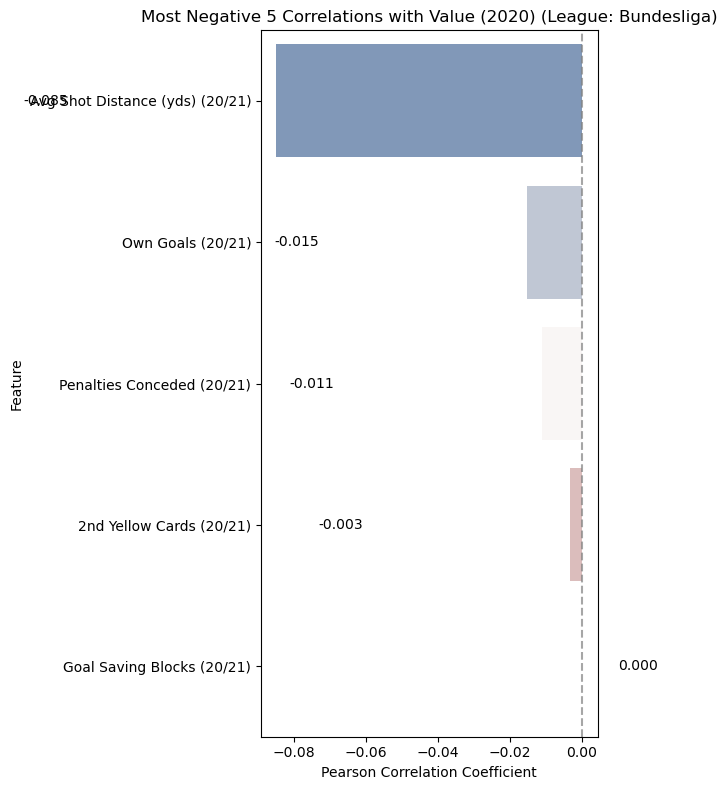

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value (2021) (League: Bundesliga) ---

Top 20 (most positive) correlations with Value (2021) in league 'Bundesliga':
 1. Non-penalty xG+ xA (20/21): 0.533
 2. Touches in Attacking Penalty Box (20/21): 0.518
 3. Dribbles Leading to Goals (20/21): 0.509
 4. Goal Creating Actions (20/21): 0.508
 5. Non-Penalty xG (20/21): 0.498

Bottom 20 (most negative) correlations with Value (2021) in league 'Bundesliga':
 1. Avg Shot Distance (yds) (20/21): -0.091
 2. Mistakes leading to Opponent Shots (20/21): -0.031
 3. Defensive Actions Leading to Goals (20/21): -0.023
 4. % of Dribblers Tackled (20/21): -0.022
 5. Goal Saving Blocks (20/21): -0.017


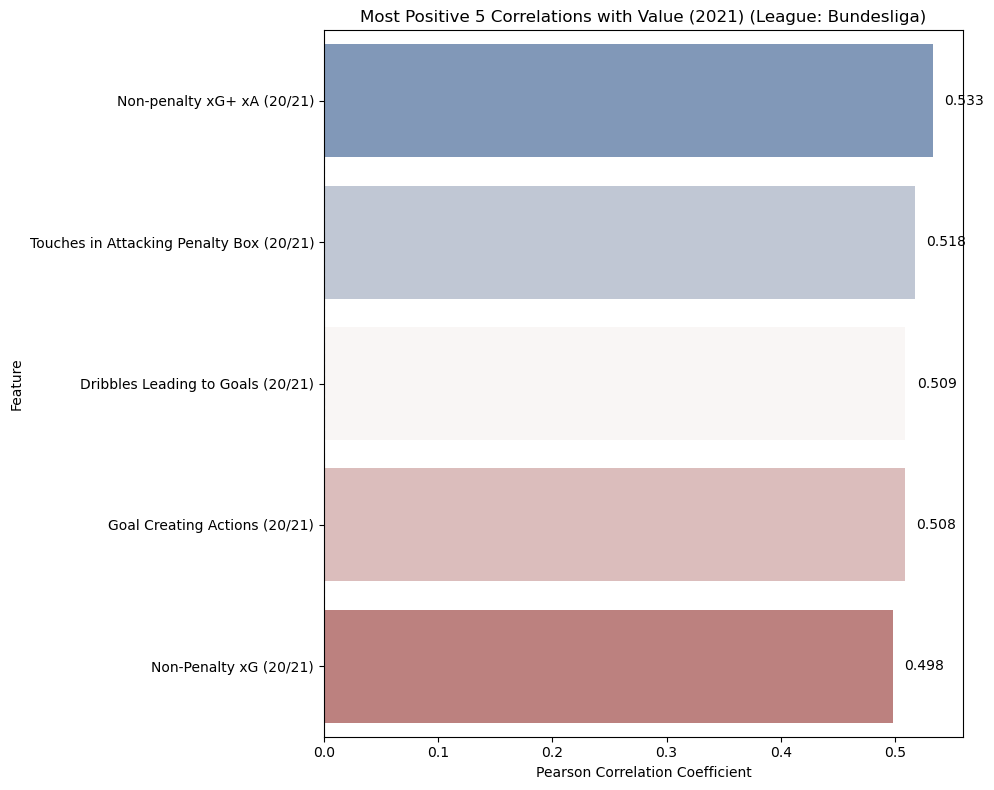

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


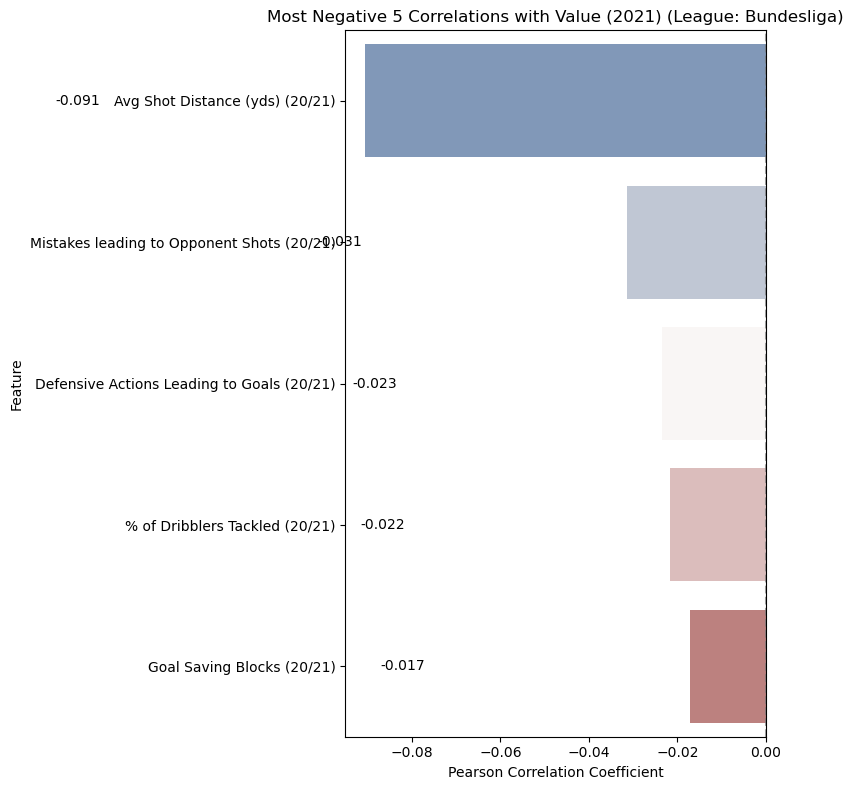


--- Value Difference (League: Bundesliga) ---

Top 20 (most positive) correlations with Value Difference in league 'Bundesliga':
 1. Dribbles Leading to Goals (20/21): 0.191
 2. 2nd Yellow Cards (20/21): 0.108
 3. Dribbles Leading to Shot Attempt (20/21): 0.099
 4. Non-Penalty xG/Shots (20/21): 0.063
 5. Total Nutmegs (20/21): 0.063

Bottom 20 (most negative) correlations with Value Difference in league 'Bundesliga':
 1. Completed passes that enter Final 3rd (20/21): -0.255
 2. Total Completed Progressive Passes (20/21): -0.249
 3. Penalties Scored (20/21): -0.236
 4. Total Distance of Completed Progressive Passes (All Pass-types) (20/21): -0.228
 5. Passes Attempted (Medium Passes) (20/21): -0.227


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


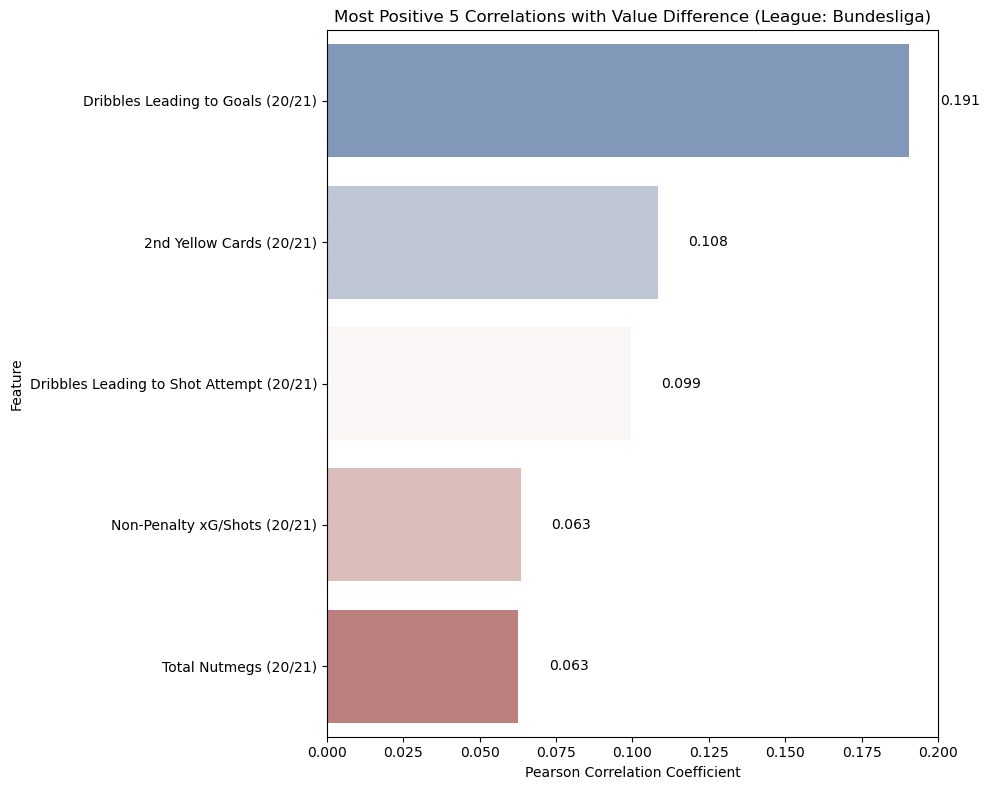

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


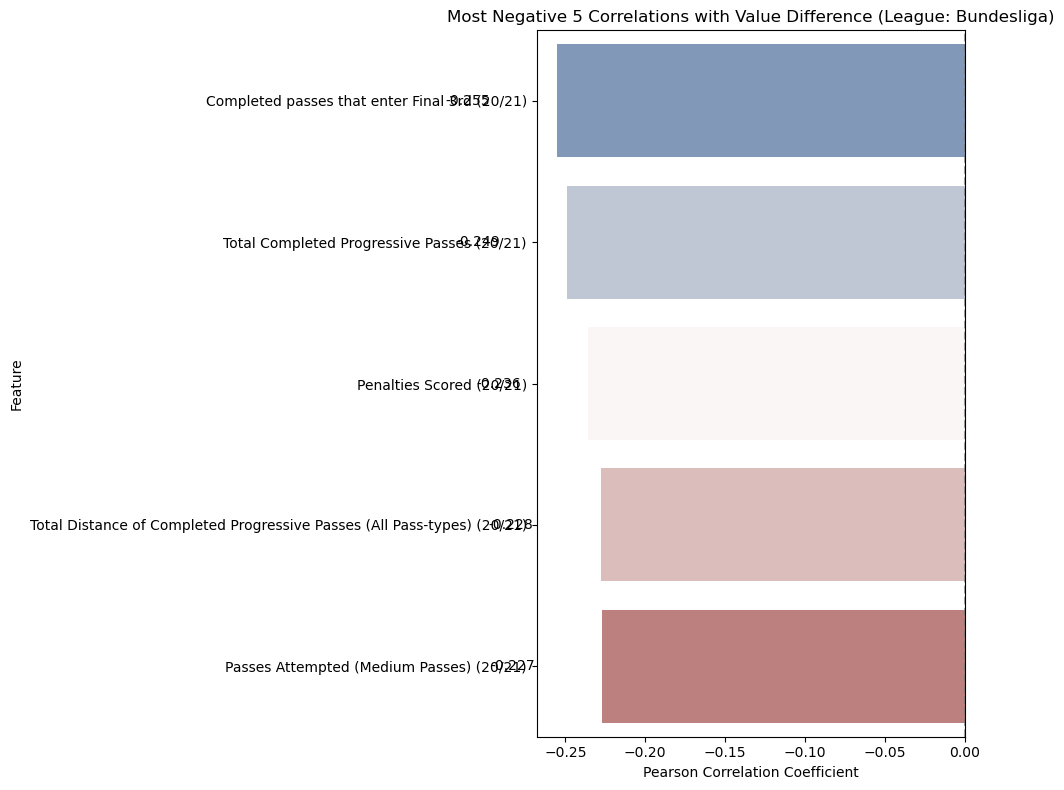


--- Value Difference (%) (League: Bundesliga) ---

Top 20 (most positive) correlations with Value Difference (%) in league 'Bundesliga':
 1. Pass Completion % (Long Passes) (20/21): 0.063
 2. % Aerial Duels Won (20/21): 0.044
 3. Pass Completion % (All pass-types) (20/21): 0.039
 4. Own Goals (20/21): 0.029
 5. Pass Completion % (Short Passes) (20/21): 0.028

Bottom 20 (most negative) correlations with Value Difference (%) in league 'Bundesliga':
 1. MP (20/21): -0.219
 2. Total Completed Progressive Passes (20/21): -0.190
 3. Completed passes that enter Penalty Box (20/21): -0.188
 4. Number of Times Player was Pass Target (20/21): -0.183
 5. Number of Times Received Pass (20/21): -0.183


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


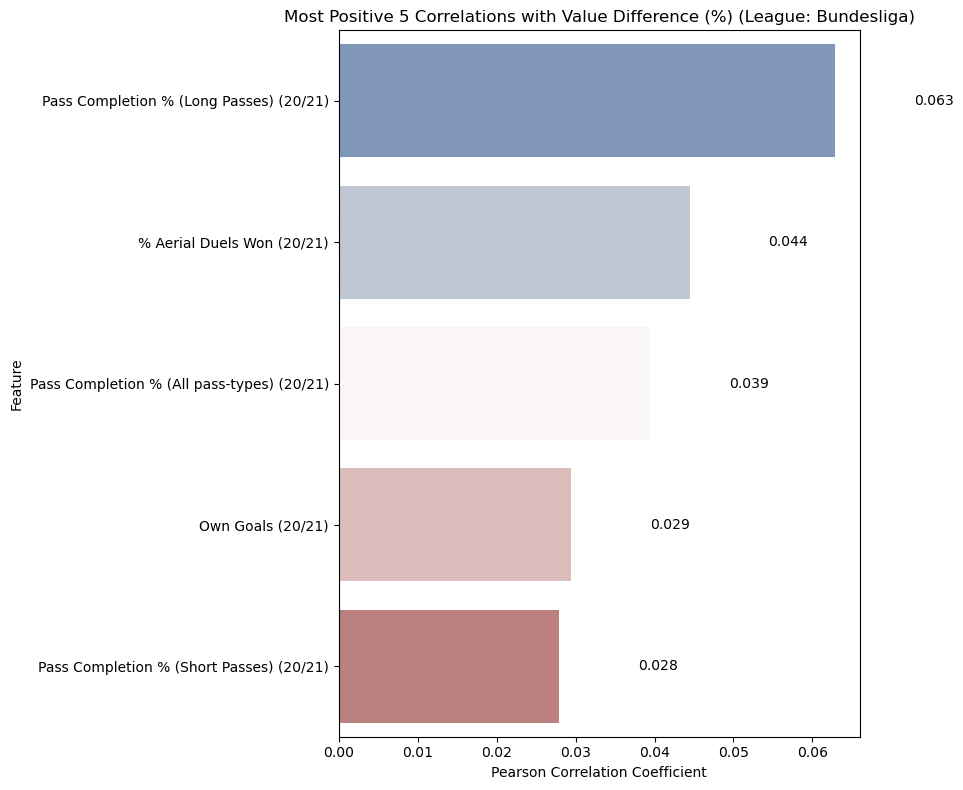

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


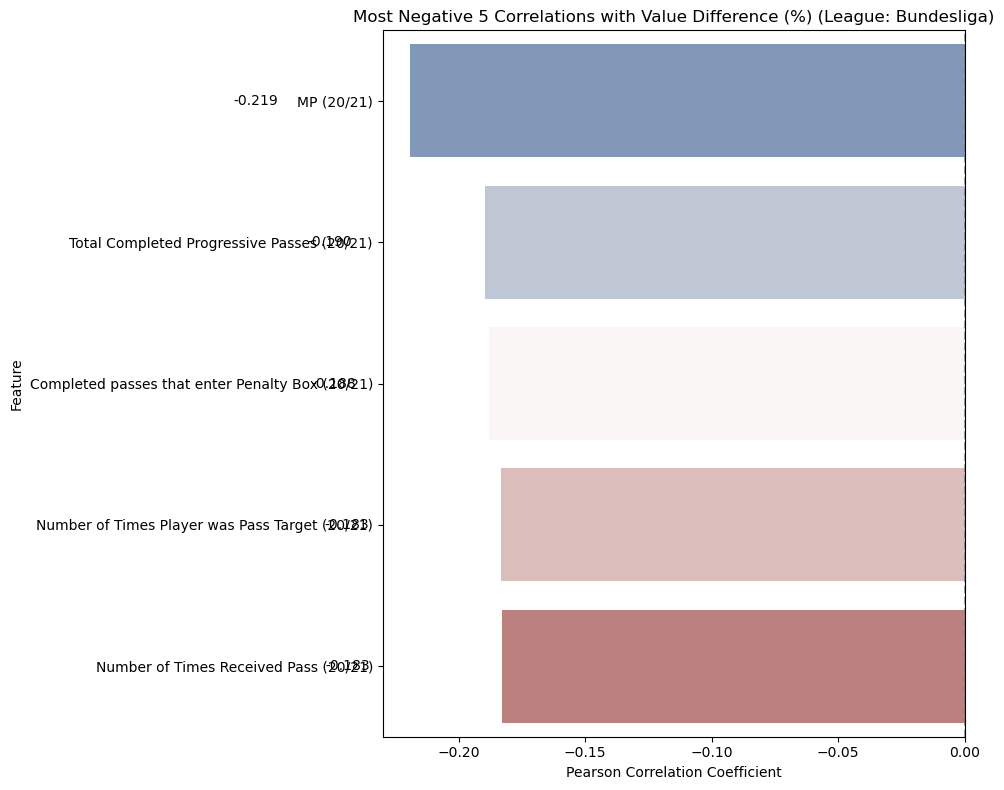


--- League: Serie A ---
Number of players: 335

--- Value (2020) (League: Serie A) ---

Top 20 (most positive) correlations with Value (2020) in league 'Serie A':
 1. Number of Times Player was Pass Target (20/21): 0.554
 2. Passes Leading to Shot Attempt (20/21): 0.530
 3. Number of Times Received Pass (20/21): 0.518
 4. Shot-Creating Actions (20/21): 0.514
 5. Total Carries in Forward Direction (20/21): 0.507

Bottom 20 (most negative) correlations with Value (2020) in league 'Serie A':
 1. % Aerial Duels Won (20/21): -0.049
 2. Avg Shot Distance (yds) (20/21): -0.040
 3. % of Times Successfully Received Pass (20/21): -0.019
 4. % of Dribblers Tackled (20/21): -0.013
 5. Pass Completion % (Short Passes) (20/21): 0.002


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


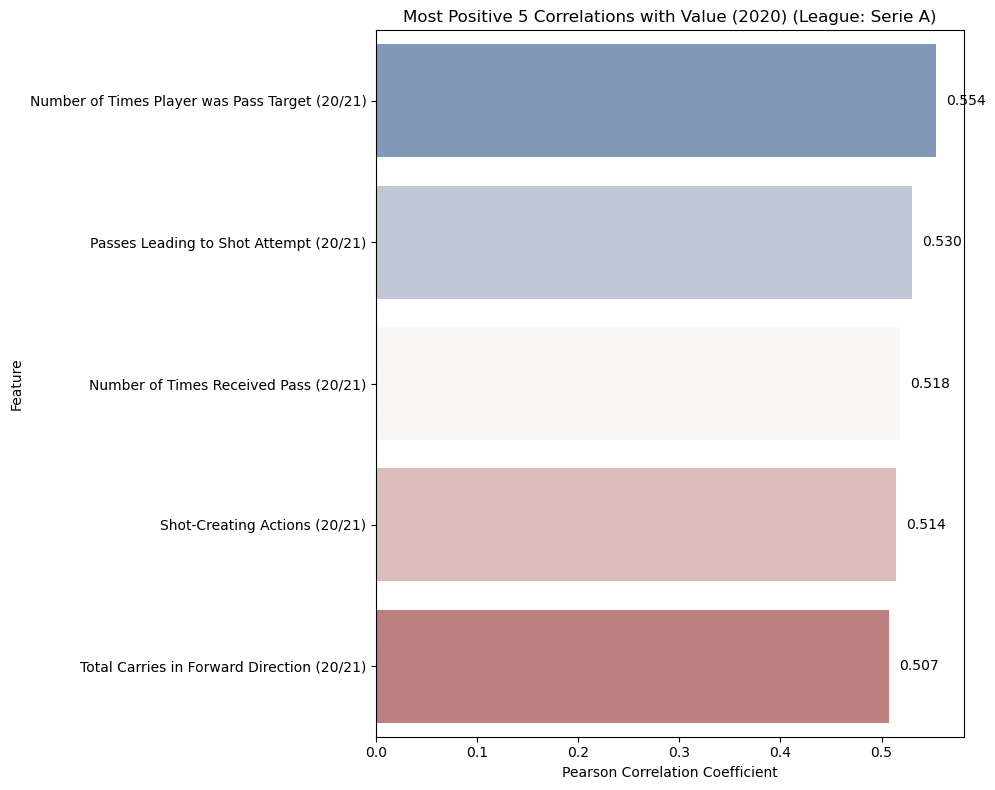

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


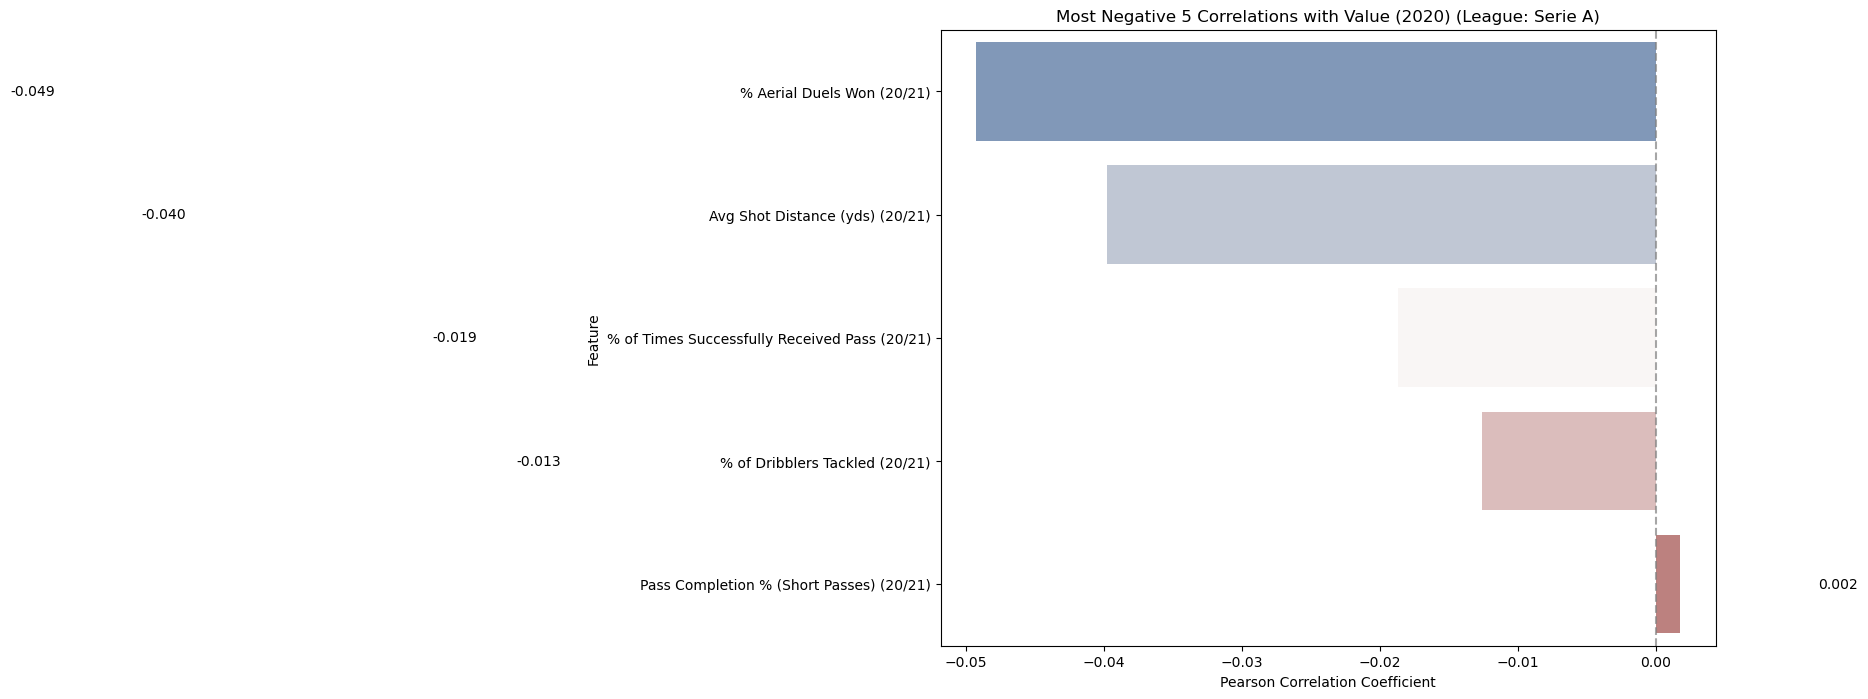


--- Value (2021) (League: Serie A) ---

Top 20 (most positive) correlations with Value (2021) in league 'Serie A':
 1. Number of Times Player was Pass Target (20/21): 0.458
 2. Non-penalty xG+ xA (20/21): 0.455
 3. Total Shots (20/21): 0.438
 4. Gls (20/21): 0.433
 5. Passes Leading to Shot Attempt (20/21): 0.429

Bottom 20 (most negative) correlations with Value (2021) in league 'Serie A':
 1. % of Times Successfully Received Pass (20/21): -0.078
 2. % Aerial Duels Won (20/21): -0.057
 3. Pass Completion % (Short Passes) (20/21): -0.054
 4. Avg Shot Distance (yds) (20/21): -0.044
 5. Pass Completion % (Medium Passes) (20/21): -0.022


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


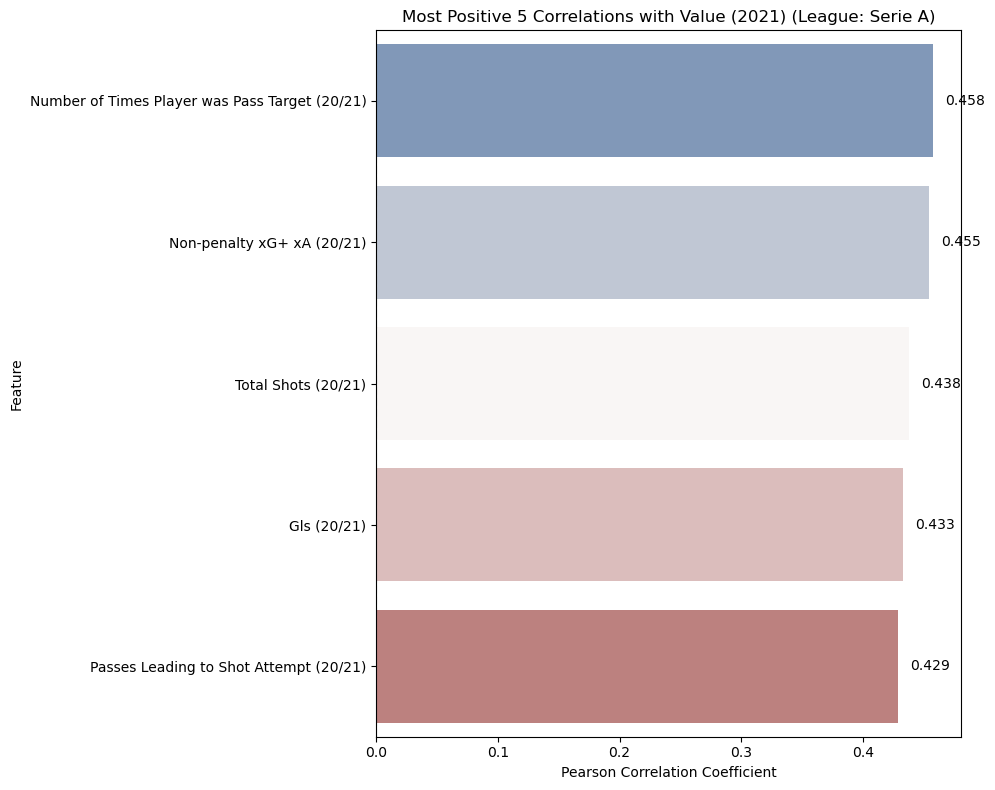

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


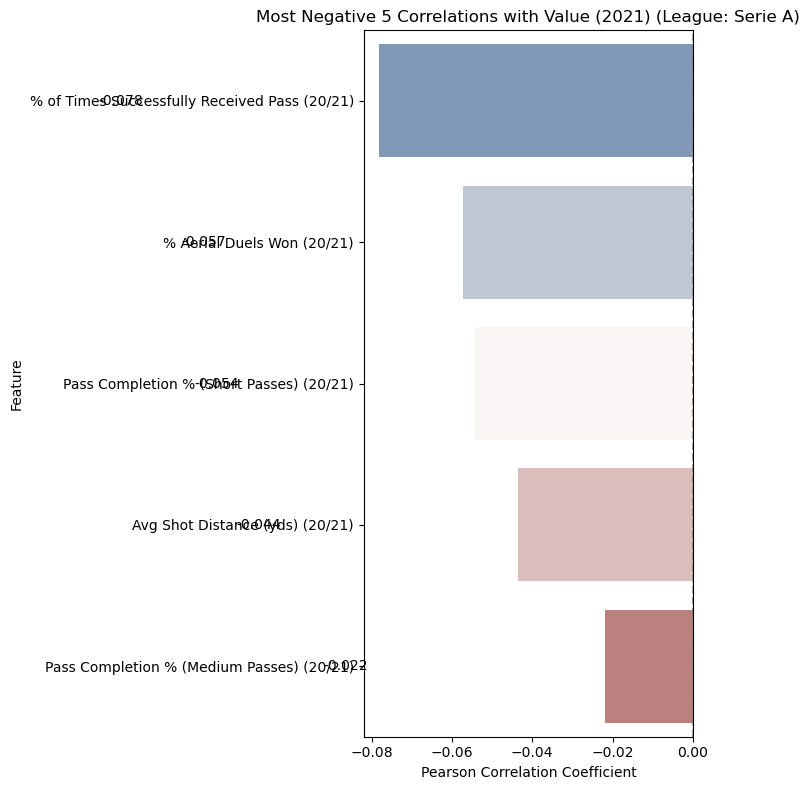

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (League: Serie A) ---

Top 20 (most positive) correlations with Value Difference in league 'Serie A':
 1. Aerial Duel Lost (20/21): 0.139
 2. Shots on Target% (20/21): 0.085
 3. % of Dribblers Tackled (20/21): 0.080
 4. Non-Penalty xG/Shots (20/21): 0.076
 5. Penalty Kicks Won (20/21): 0.063

Bottom 20 (most negative) correlations with Value Difference in league 'Serie A':
 1. Number of Times Received Pass (20/21): -0.216
 2. Total Carries (20/21): -0.214
 3. Total Distance Carried the Ball (20/21): -0.209
 4. Total Distance of Completed Passes (All Pass-types) (20/21): -0.209
 5. Passes Completed (All pass-types) (20/21): -0.209


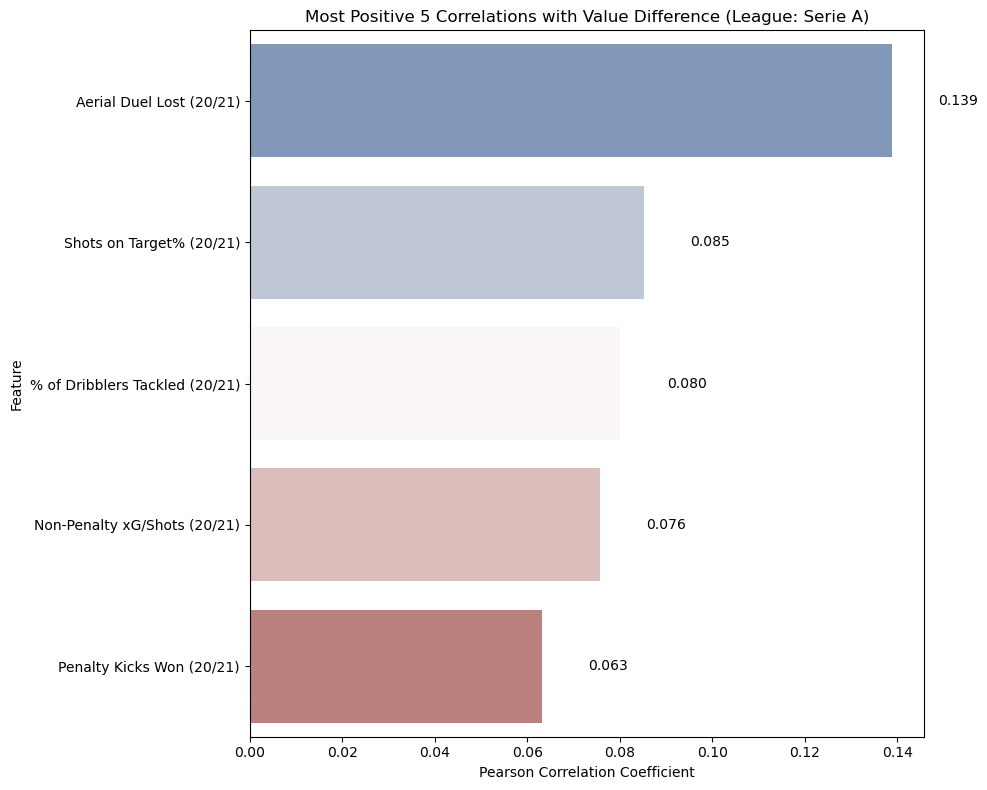

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


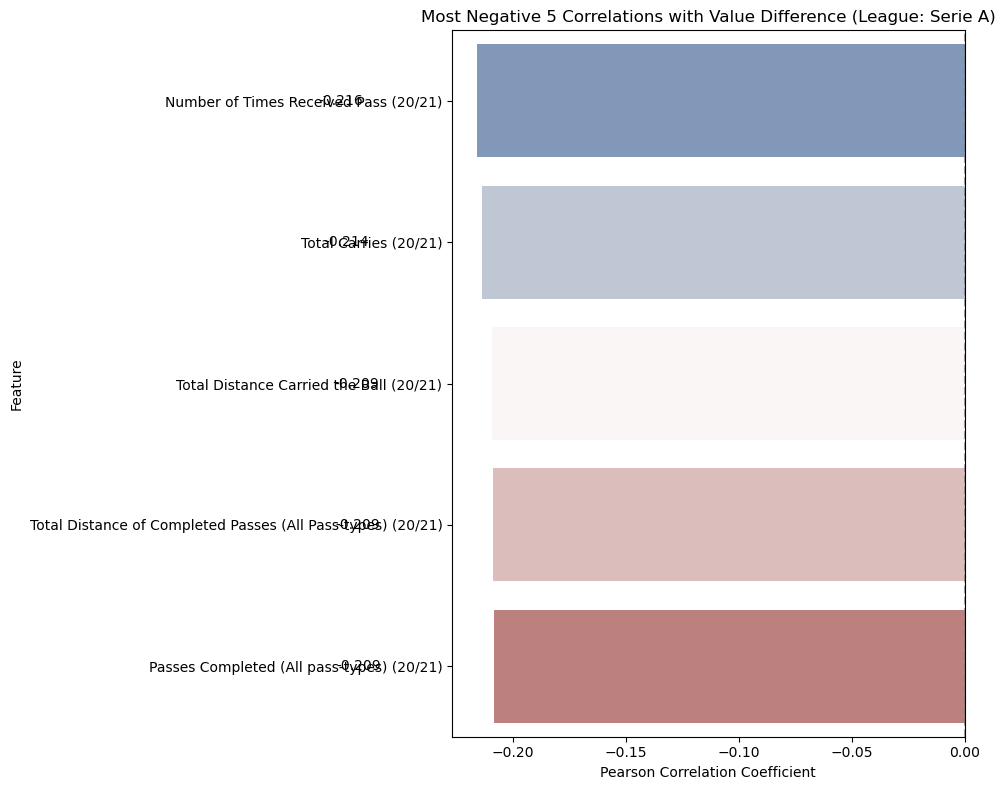

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (%) (League: Serie A) ---

Top 20 (most positive) correlations with Value Difference (%) in league 'Serie A':
 1. Dribble Success % (20/21): 0.109
 2. Non-Penalty Goals Scored minus Non-Penalty xG (20/21): 0.108
 3. Goals Scored minus xG (20/21): 0.105
 4. Shots on Target% (20/21): 0.104
 5. Goals/Shots (20/21): 0.087

Bottom 20 (most negative) correlations with Value Difference (%) in league 'Serie A':
 1. Passes Completed (Long Passes) (20/21): -0.127
 2. Total Distance of Completed Passes (All Pass-types) (20/21): -0.109
 3. Completed passes that enter Final 3rd (20/21): -0.107
 4. Passes Completed (Medium Passes) (20/21): -0.104
 5. Total Distance of Completed Progressive Passes (All Pass-types) (20/21): -0.103


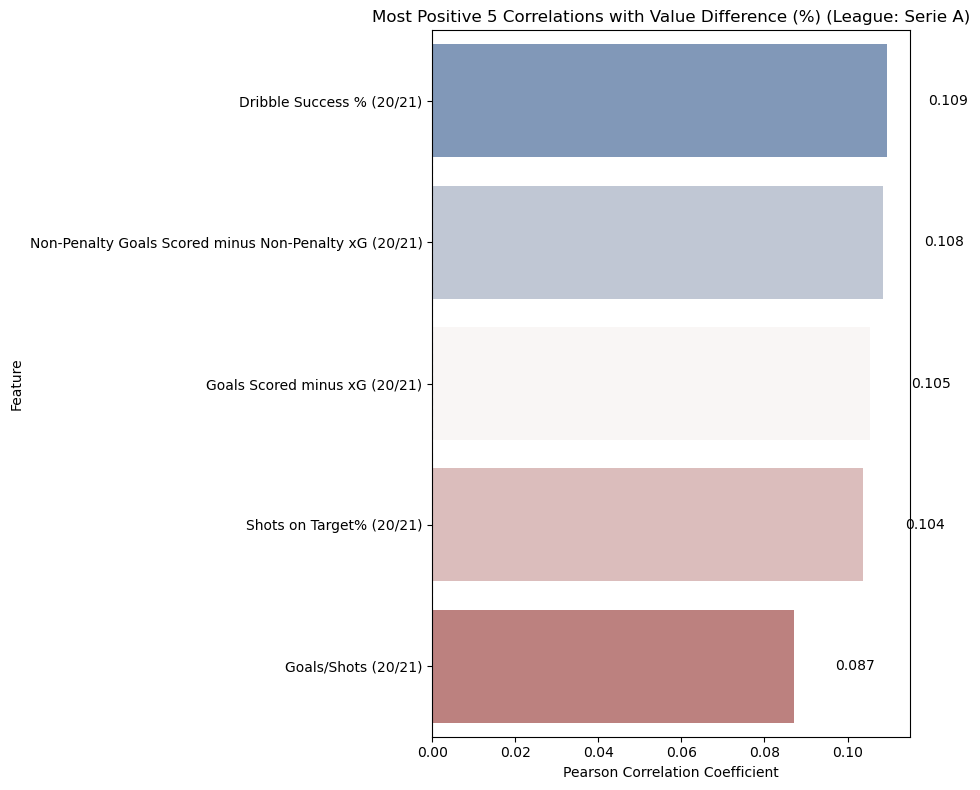

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


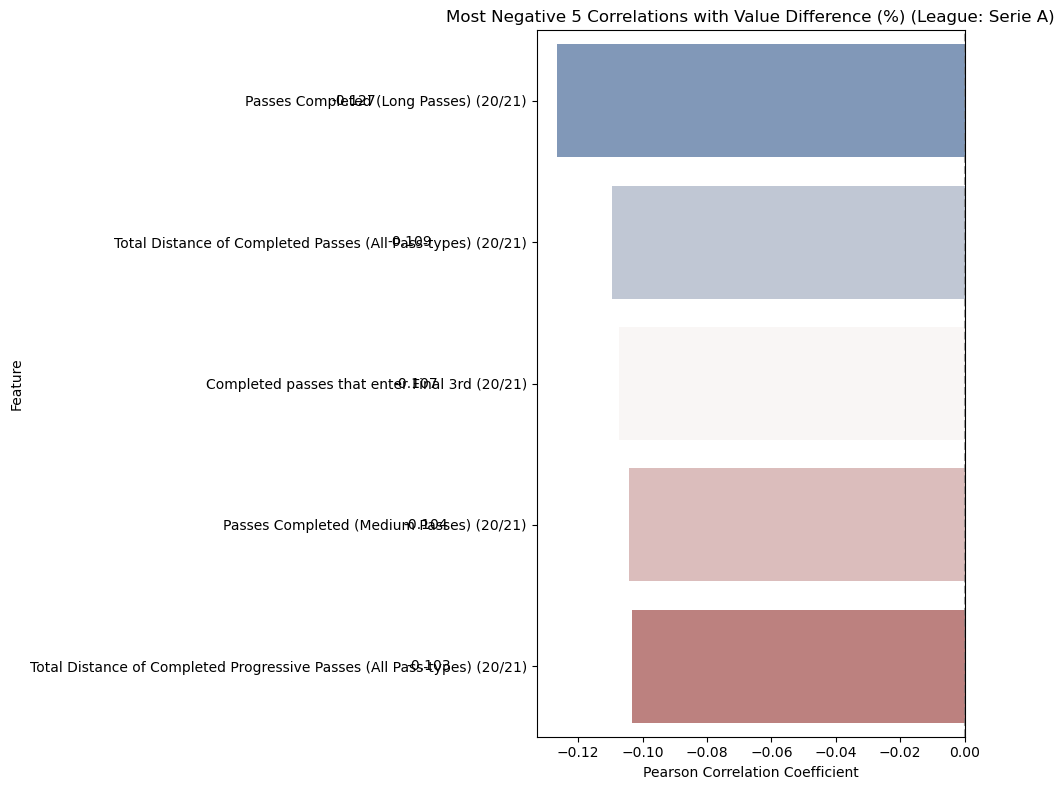


--- League: La Liga ---
Number of players: 324

--- Value (2020) (League: La Liga) ---

Top 20 (most positive) correlations with Value (2020) in league 'La Liga':
 1. Number of Times Player was Pass Target (20/21): 0.521
 2. Total Carries in Forward Direction (20/21): 0.516
 3. Number of Times Received Pass (20/21): 0.495
 4. Total Carries (20/21): 0.488
 5. Total Distance Carried the Ball (20/21): 0.483

Bottom 20 (most negative) correlations with Value (2020) in league 'La Liga':
 1. % Aerial Duels Won (20/21): -0.081
 2. % of Dribblers Tackled (20/21): -0.051
 3. Goal Saving Blocks (20/21): -0.045
 4. Avg Shot Distance (yds) (20/21): -0.038
 5. Total Clearances (20/21): -0.037


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


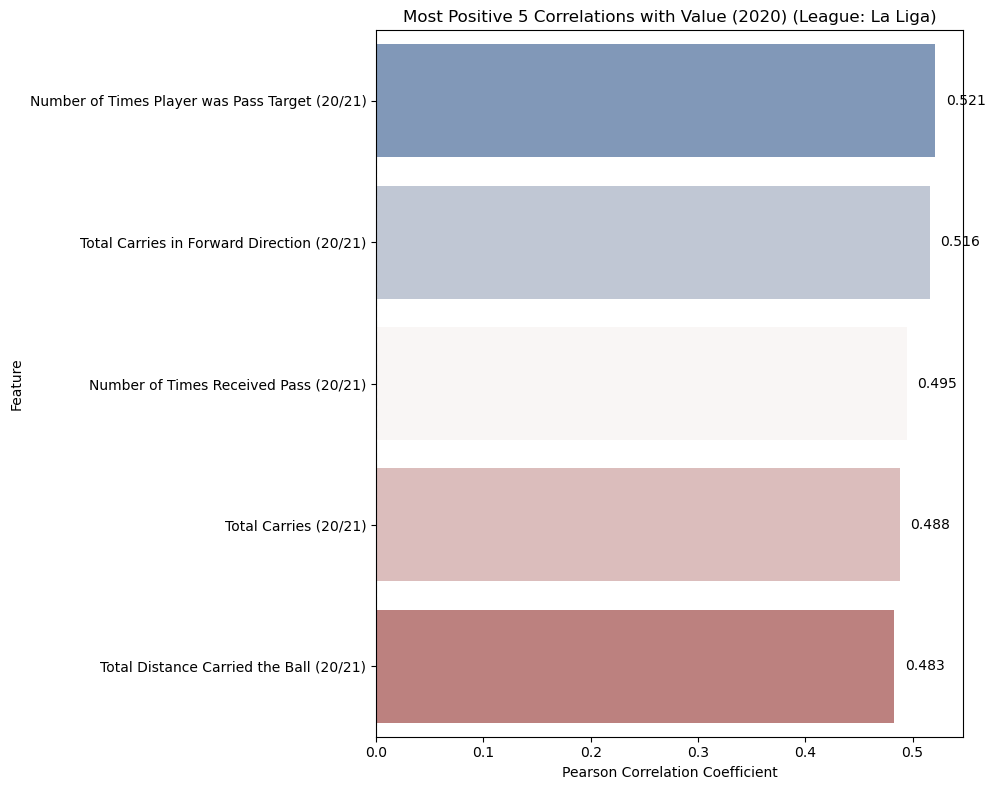

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


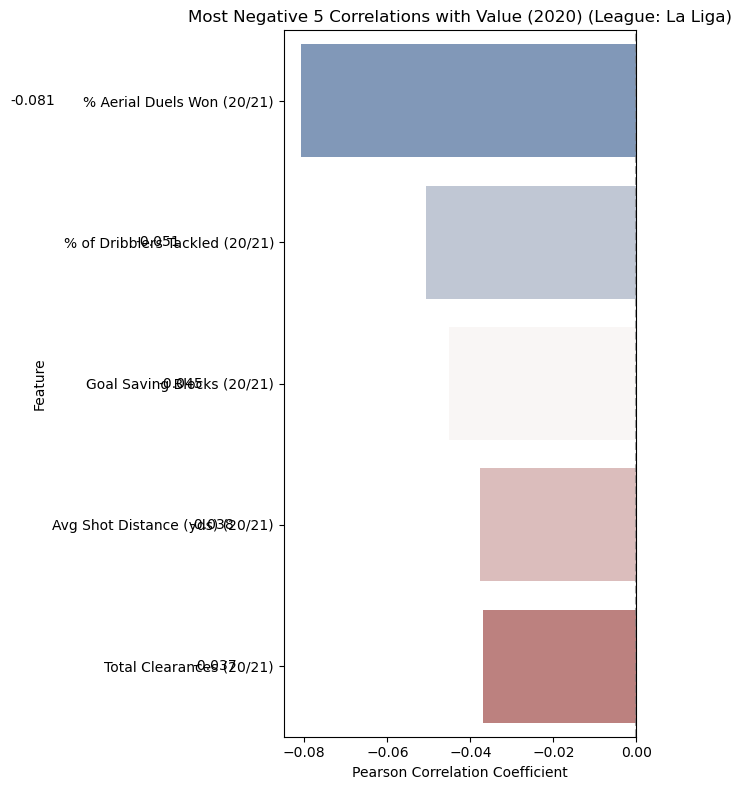

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value (2021) (League: La Liga) ---

Top 20 (most positive) correlations with Value (2021) in league 'La Liga':
 1. Total Carries in Forward Direction (20/21): 0.486
 2. Total Distance Carried the Ball in Forward Direction (20/21): 0.449
 3. Total Distance Carried the Ball (20/21): 0.446
 4. Carries into Final Third (20/21): 0.446
 5. Number of Times Player was Pass Target (20/21): 0.442

Bottom 20 (most negative) correlations with Value (2021) in league 'La Liga':
 1. % Aerial Duels Won (20/21): -0.070
 2. Avg Shot Distance (yds) (20/21): -0.048
 3. % of Dribblers Tackled (20/21): -0.038
 4. Goal Saving Blocks (20/21): -0.035
 5. 2nd Yellow Cards (20/21): -0.027


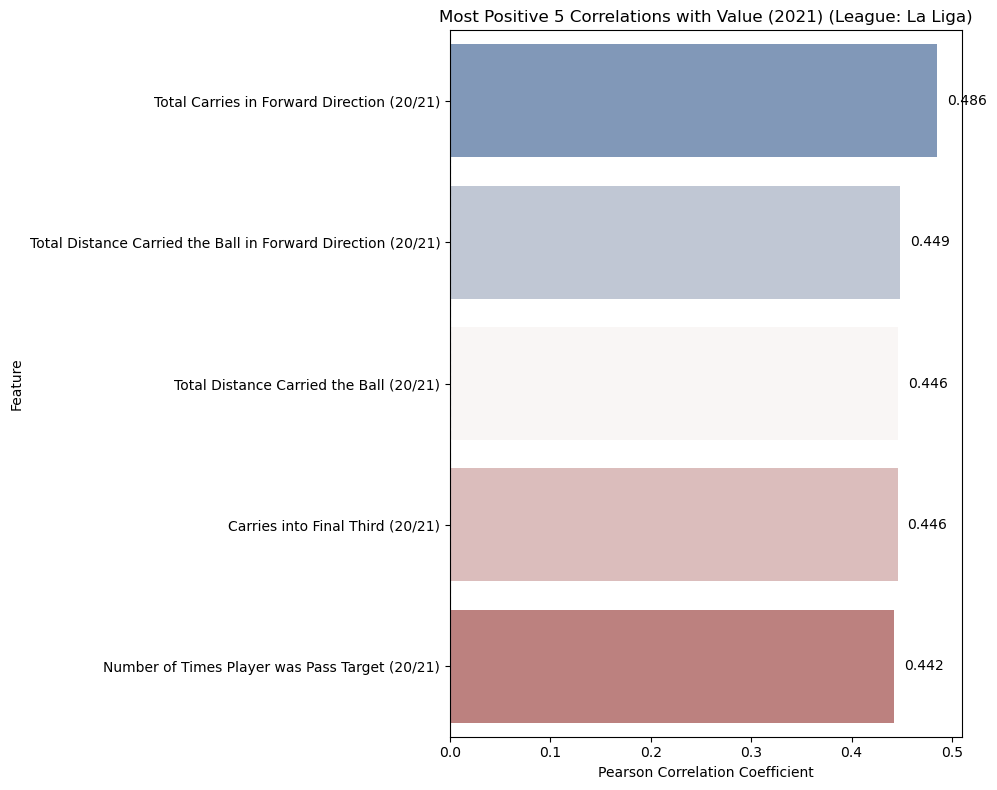

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


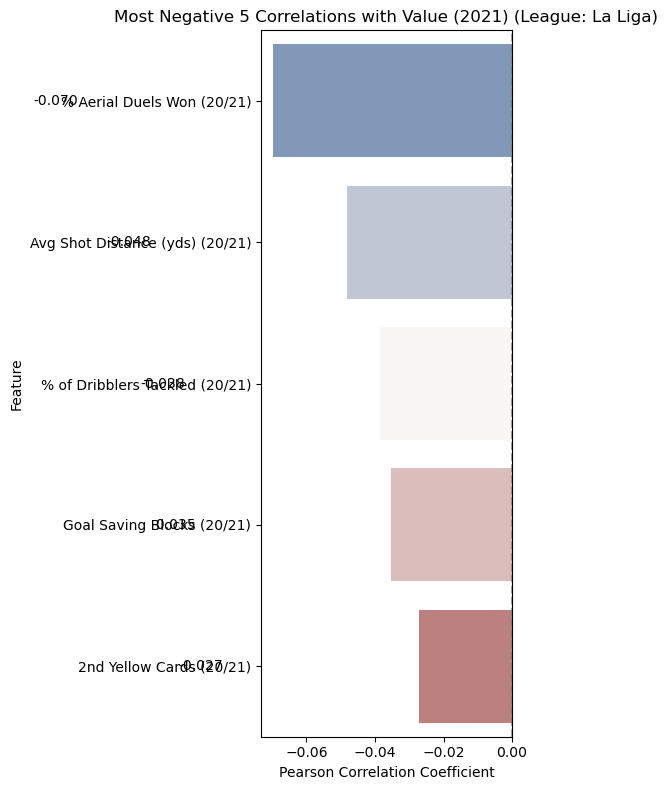


--- Value Difference (League: La Liga) ---

Top 20 (most positive) correlations with Value Difference in league 'La Liga':
 1. Red Cards (20/21): 0.048
 2. Penalties Conceded (20/21): 0.046
 3. Dribbles Leading to Goals (20/21): 0.038
 4. Set-Piece Leading to Goals (20/21): 0.032
 5. Dribbles Leading to Shot Attempt (20/21): 0.029

Bottom 20 (most negative) correlations with Value Difference in league 'La Liga':
 1. Passes Completed (Short Passes) (20/21): -0.205
 2. Passes Attempted (Short Passes) (20/21): -0.202
 3. Number of Times Player was Pass Target (20/21): -0.191
 4. Number of Times Received Pass (20/21): -0.186
 5. Completed passes that enter Final 3rd (20/21): -0.179


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


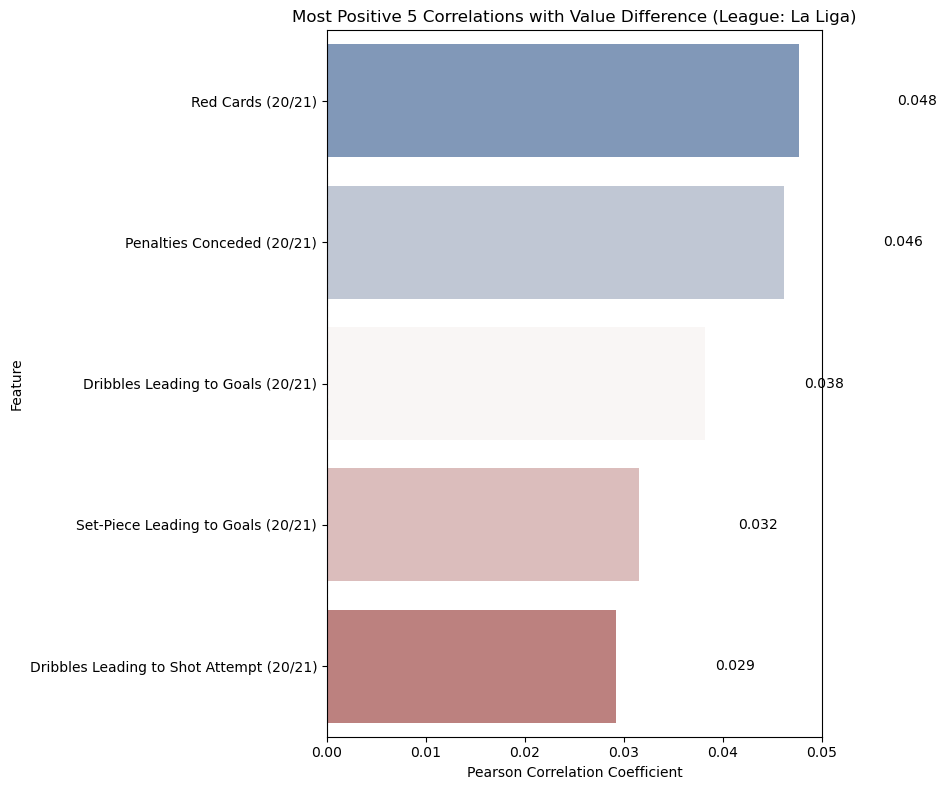

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


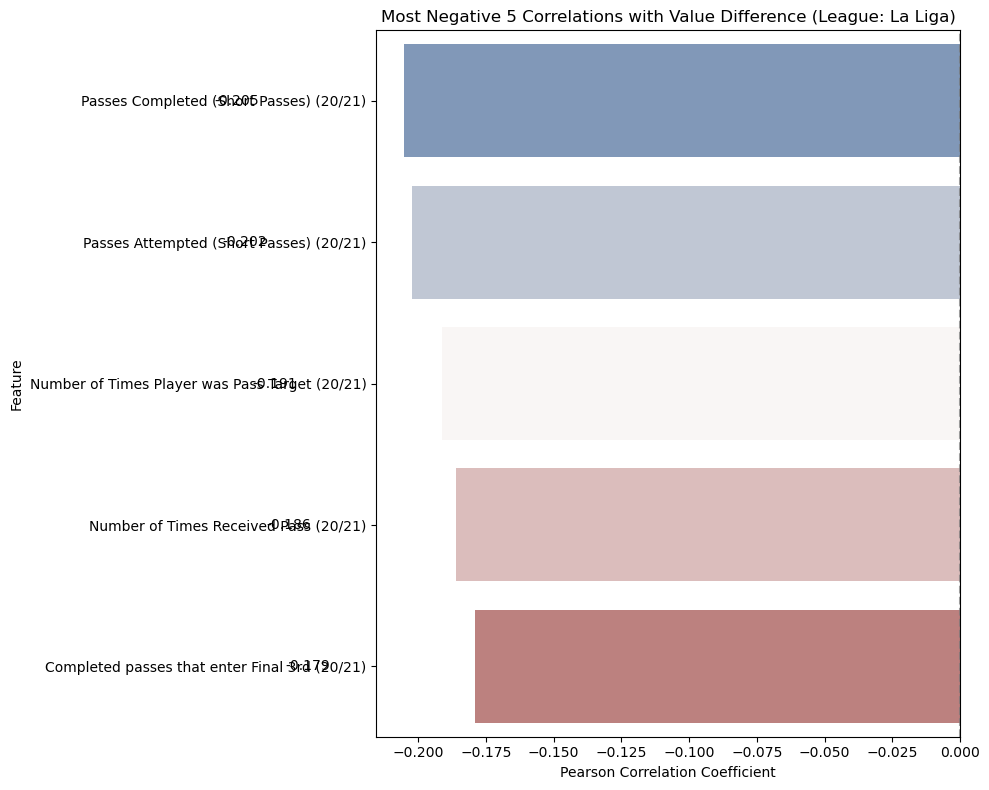


--- Value Difference (%) (League: La Liga) ---

Top 20 (most positive) correlations with Value Difference (%) in league 'La Liga':
 1. Fouls Committed (20/21): 0.105
 2. Total Failed Attempts at Controlling Ball (20/21): 0.102
 3. Number of Times Tackled when Dribbling (20/21): 0.096
 4. Aerial Duel Lost (20/21): 0.080
 5. 2nd Yellow Cards (20/21): 0.078

Bottom 20 (most negative) correlations with Value Difference (%) in league 'La Liga':
 1. Non-Penalty Goals Scored minus Non-Penalty xG (20/21): -0.113
 2. xA/90 (20/21): -0.104
 3. Goals Scored minus xG (20/21): -0.104
 4. (Gls+Ast-Scored Penalties)/90 (20/21): -0.093
 5. (G+A)/90 (20/21): -0.090


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


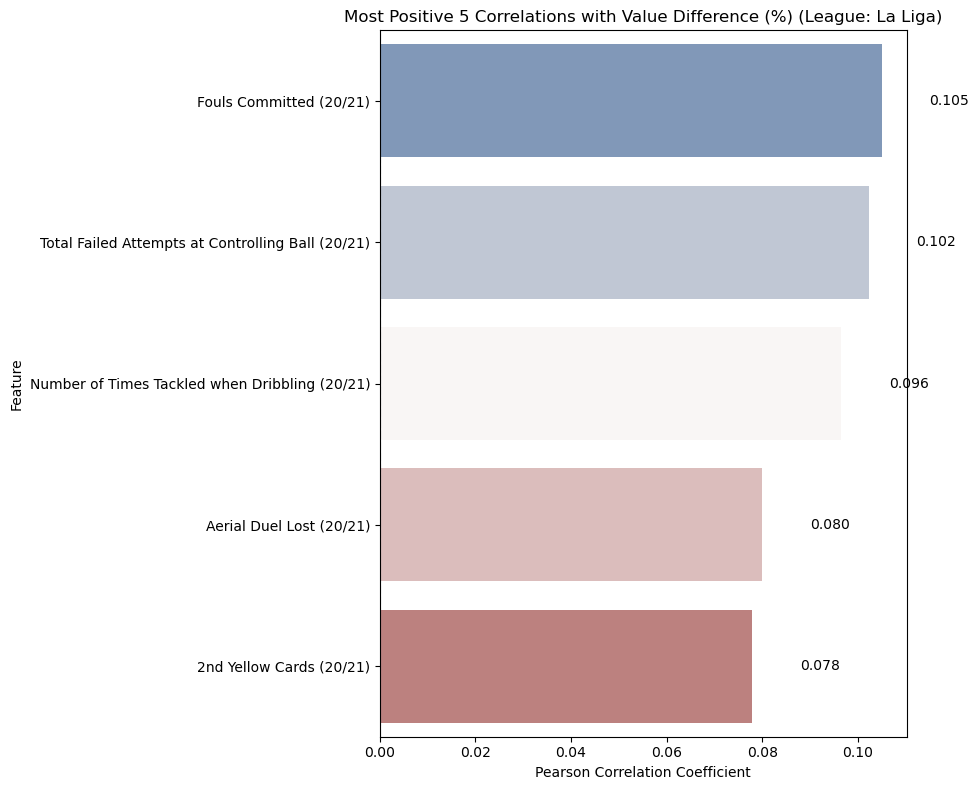

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


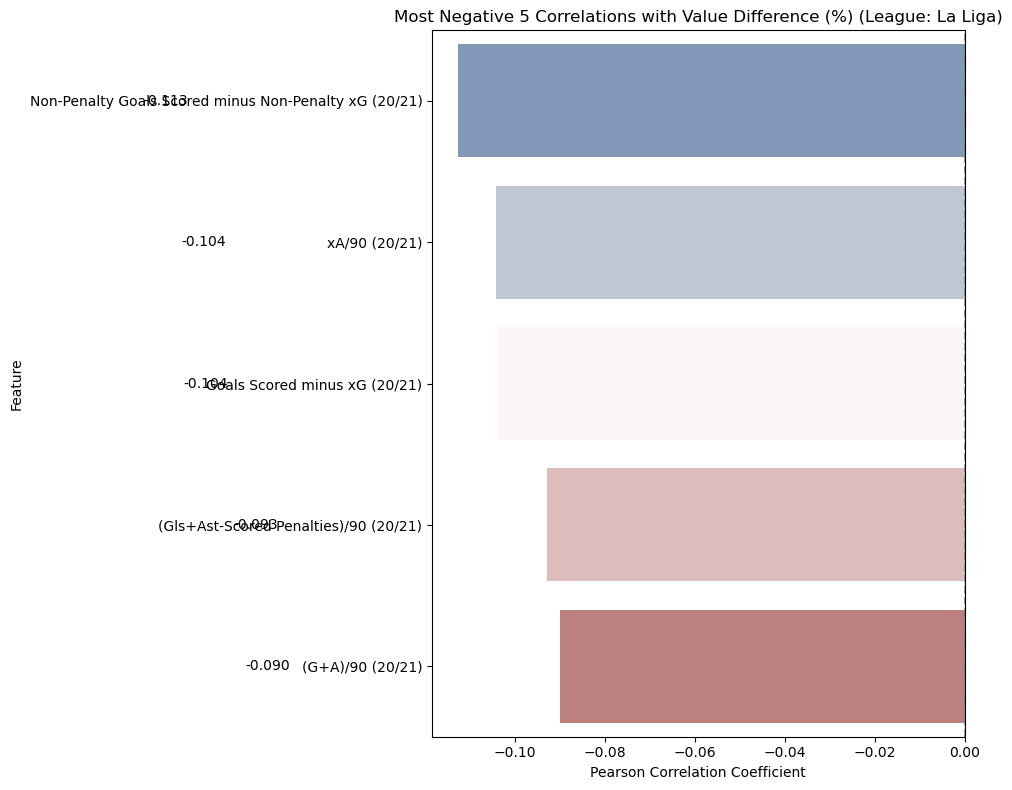


--- League: Ligue 1 ---
Number of players: 308

--- Value (2020) (League: Ligue 1) ---

Top 20 (most positive) correlations with Value (2020) in league 'Ligue 1':
 1. Goal Creating Actions (20/21): 0.565
 2. Total Nutmegs (20/21): 0.554
 3. Passes Leading to Goals (20/21): 0.523
 4. Gls (20/21): 0.520
 5. xG (20/21): 0.516

Bottom 20 (most negative) correlations with Value (2020) in league 'Ligue 1':
 1. Penalties Conceded (20/21): -0.160
 2. % of Dribblers Tackled (20/21): -0.106
 3. Goal Saving Blocks (20/21): -0.095
 4. Avg Shot Distance (yds) (20/21): -0.074
 5. Tackles in Defensive 3rd (20/21): -0.070


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


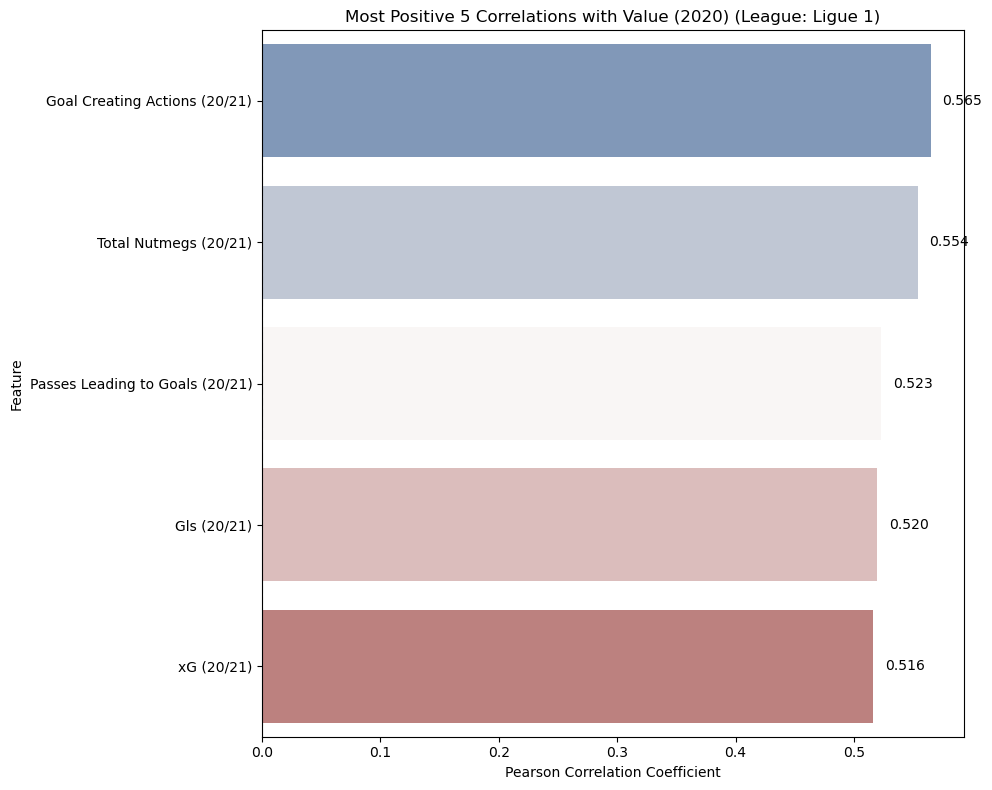

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


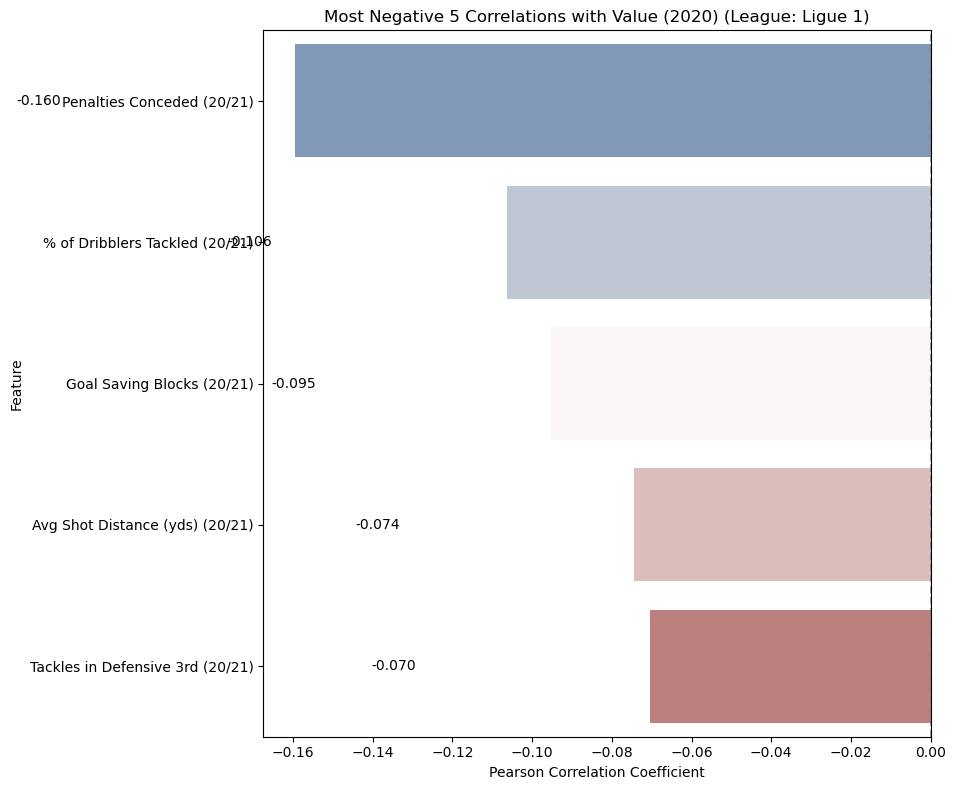

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value (2021) (League: Ligue 1) ---

Top 20 (most positive) correlations with Value (2021) in league 'Ligue 1':
 1. Goal Creating Actions (20/21): 0.539
 2. Total Nutmegs (20/21): 0.517
 3. Passes Leading to Goals (20/21): 0.494
 4. Gls (20/21): 0.494
 5. Carries into Attacking Penalty Box (20/21): 0.492

Bottom 20 (most negative) correlations with Value (2021) in league 'Ligue 1':
 1. Penalties Conceded (20/21): -0.132
 2. Goal Saving Blocks (20/21): -0.104
 3. % of Dribblers Tackled (20/21): -0.092
 4. Avg Shot Distance (yds) (20/21): -0.073
 5. Own Goals (20/21): -0.036


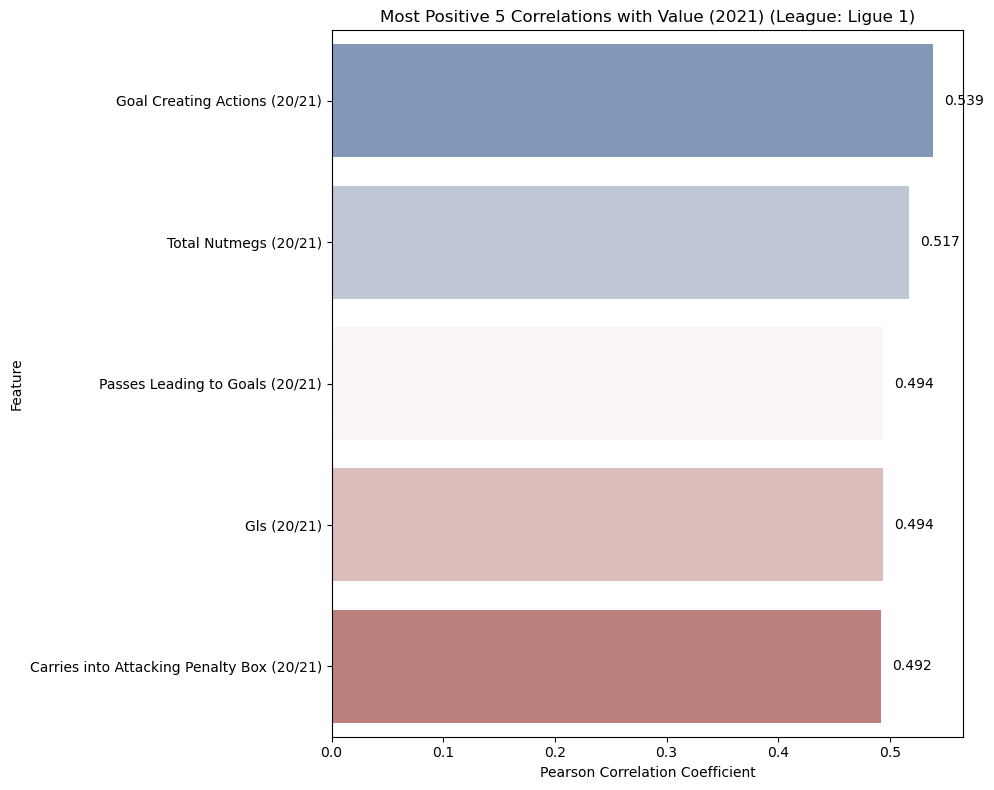

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


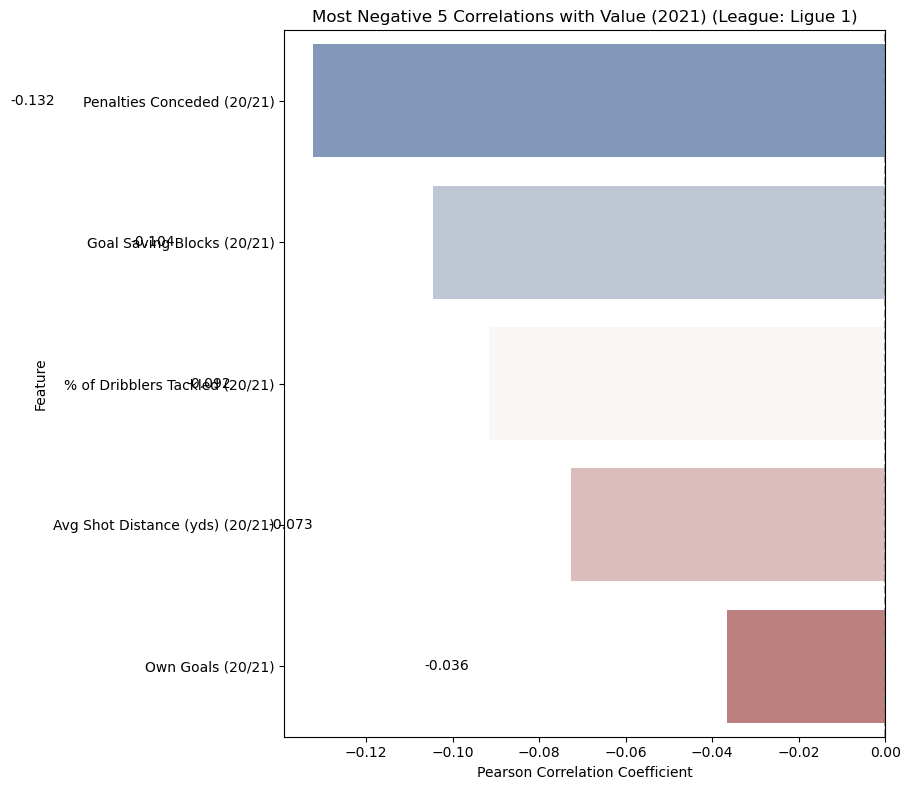

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (League: Ligue 1) ---

Top 20 (most positive) correlations with Value Difference in league 'Ligue 1':
 1. Total Players Tackled + Total Interceptions (20/21): 0.187
 2. Tackles in Defensive 3rd (20/21): 0.183
 3. Total Number of Players Tackled (20/21): 0.180
 4. Total Tackles Won (20/21): 0.172
 5. Number of Presses in Defensive Third (20/21): 0.172

Bottom 20 (most negative) correlations with Value Difference in league 'Ligue 1':
 1. Freekick Shots (20/21): -0.323
 2. (xG+xA)/90 (20/21): -0.258
 3. Fouls Drawn Leading to Shot Attempt (20/21): -0.256
 4. Dribbles Leading to Shot Attempt (20/21): -0.232
 5. xG/90 (20/21): -0.230


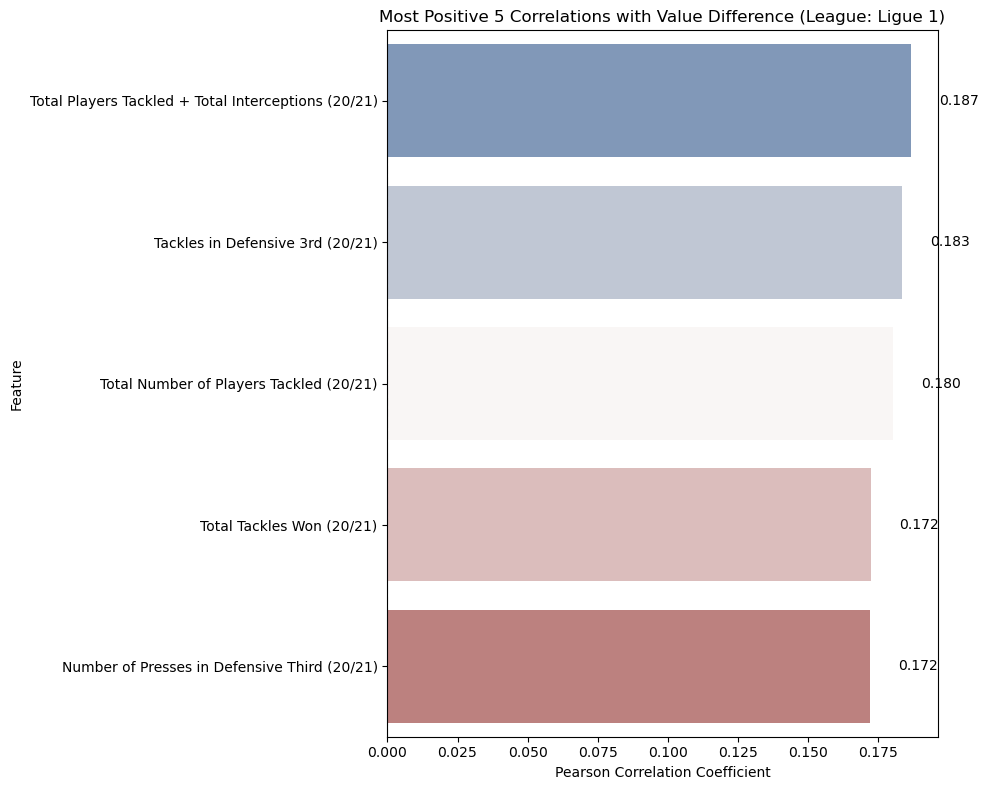

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


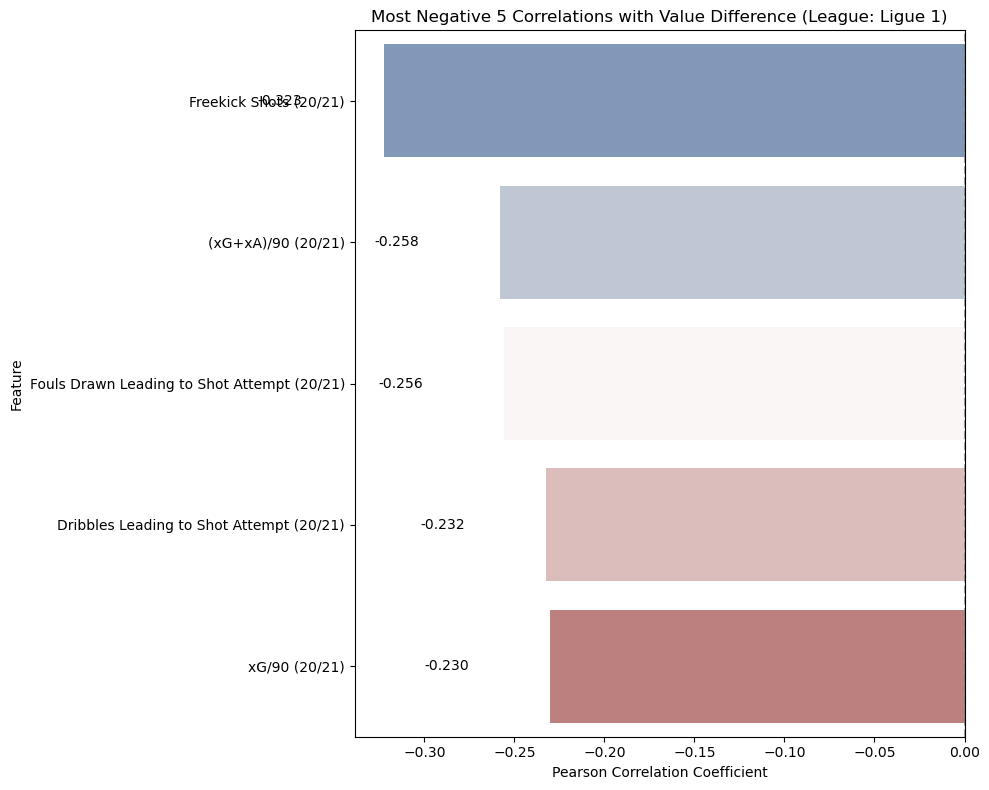

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")



--- Value Difference (%) (League: Ligue 1) ---

Top 20 (most positive) correlations with Value Difference (%) in league 'Ligue 1':
 1. % of Times Successfully Received Pass (20/21): 0.116
 2. 2nd Yellow Cards (20/21): 0.088
 3. Pass Completion % (Medium Passes) (20/21): 0.086
 4. % Aerial Duels Won (20/21): 0.086
 5. Pass Completion % (Long Passes) (20/21): 0.067

Bottom 20 (most negative) correlations with Value Difference (%) in league 'Ligue 1':
 1. MP (20/21): -0.150
 2. Shots/90 (20/21): -0.138
 3. xG/90 (20/21): -0.130
 4. (xG+xA)/90 (20/21): -0.129
 5. Shot-Creating Actions/90 (20/21): -0.126


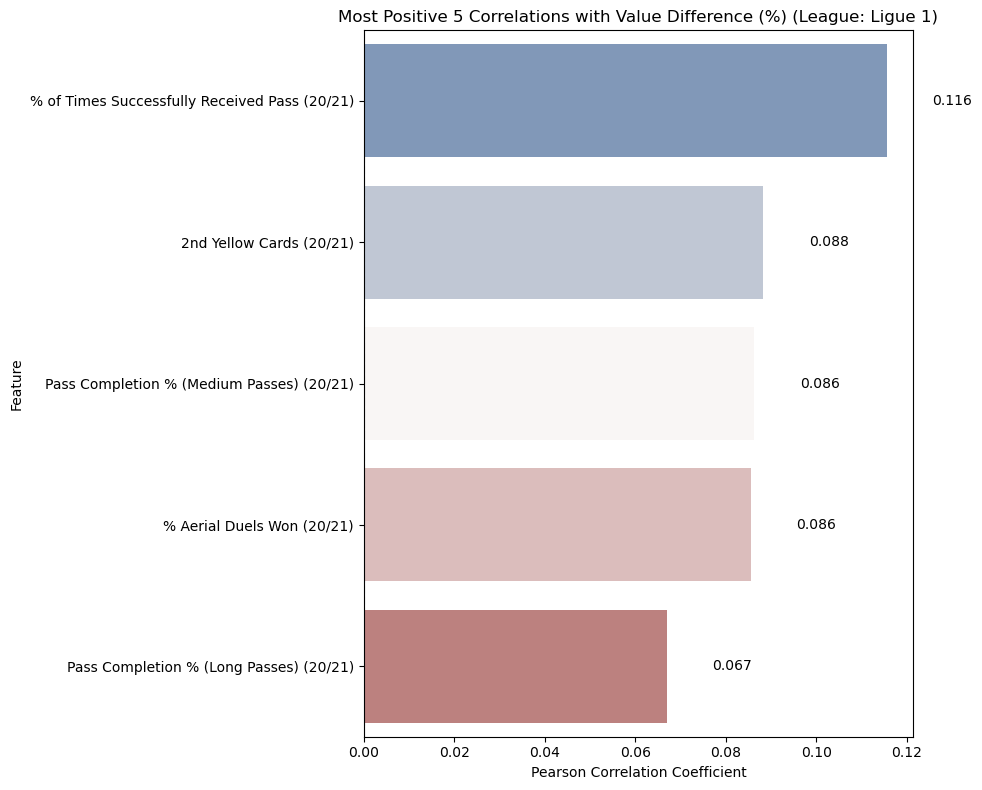

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


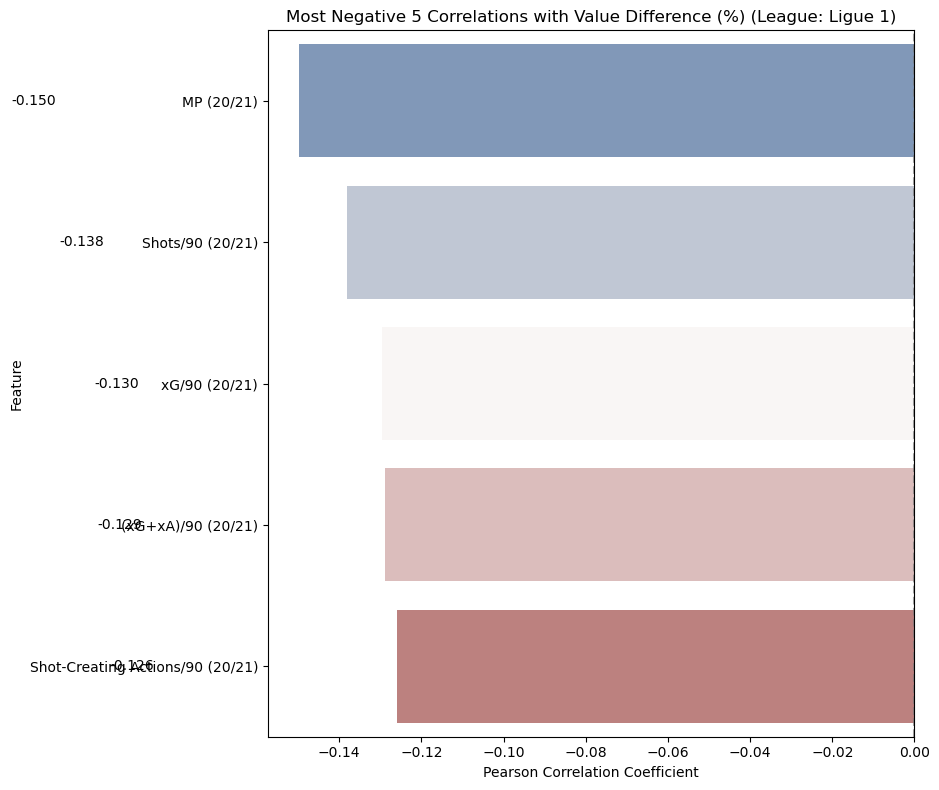


--- League: Premier League ---
Number of players: 337

--- Value (2020) (League: Premier League) ---

Top 20 (most positive) correlations with Value (2020) in league 'Premier League':
 1. Total Carries in Forward Direction (20/21): 0.617
 2. Passes Leading to Goals (20/21): 0.603
 3. Number of Times Player was Pass Target (20/21): 0.602
 4. Passes Leading to Shot Attempt (20/21): 0.593
 5. Goal Creating Actions (20/21): 0.593

Bottom 20 (most negative) correlations with Value (2020) in league 'Premier League':
 1. Goal Saving Blocks (20/21): -0.051
 2. % Aerial Duels Won (20/21): -0.050
 3. 2nd Yellow Cards (20/21): -0.042
 4. Avg Shot Distance (yds) (20/21): -0.029
 5. % of Dribblers Tackled (20/21): -0.024


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


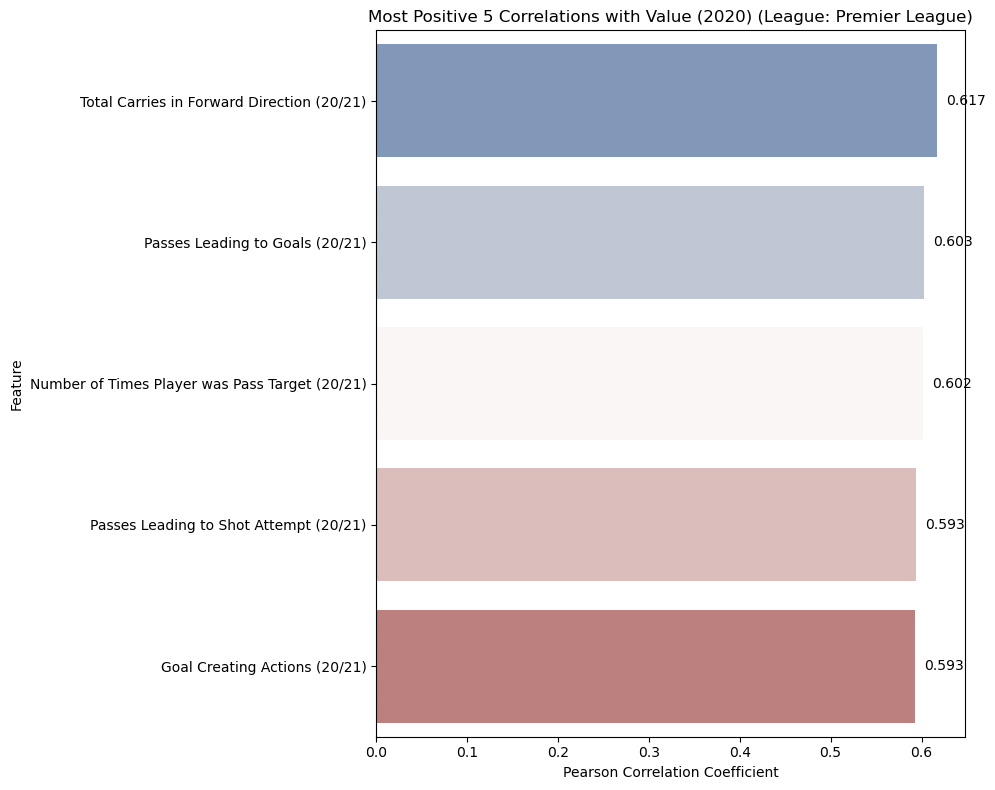

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


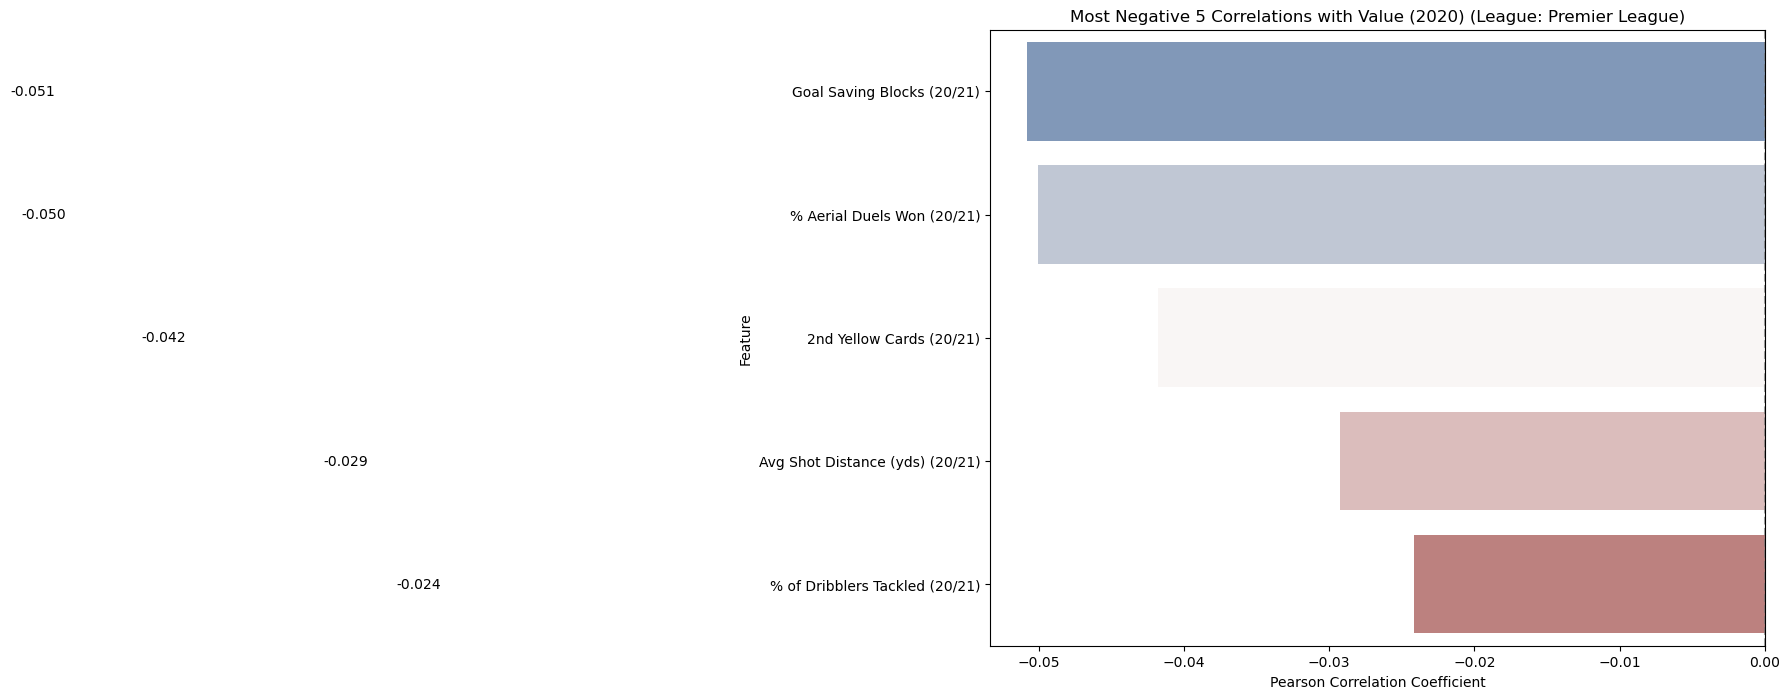


--- Value (2021) (League: Premier League) ---

Top 20 (most positive) correlations with Value (2021) in league 'Premier League':
 1. Total Carries in Forward Direction (20/21): 0.603
 2. Number of Times Player was Pass Target (20/21): 0.579
 3. Passes Leading to Shot Attempt (20/21): 0.559
 4. Passes Leading to Goals (20/21): 0.549
 5. Total Carries (20/21): 0.546

Bottom 20 (most negative) correlations with Value (2021) in league 'Premier League':
 1. Goal Saving Blocks (20/21): -0.061
 2. % Aerial Duels Won (20/21): -0.044
 3. 2nd Yellow Cards (20/21): -0.036
 4. Avg Shot Distance (yds) (20/21): -0.023
 5. % of Dribblers Tackled (20/21): -0.008


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


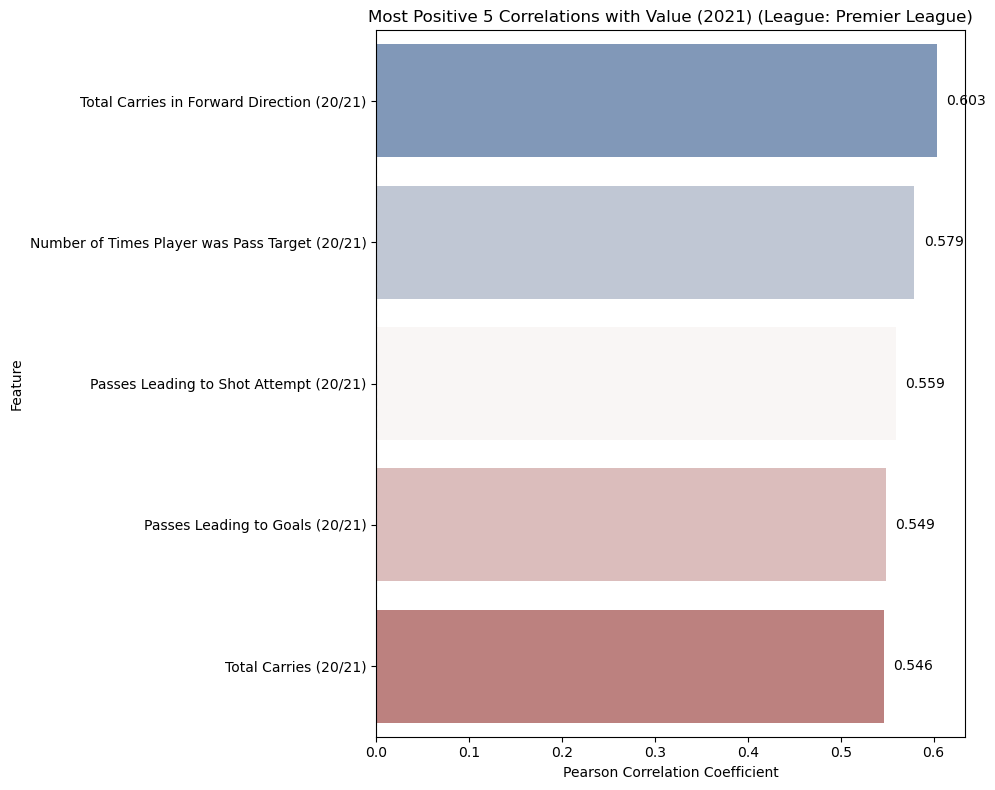

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


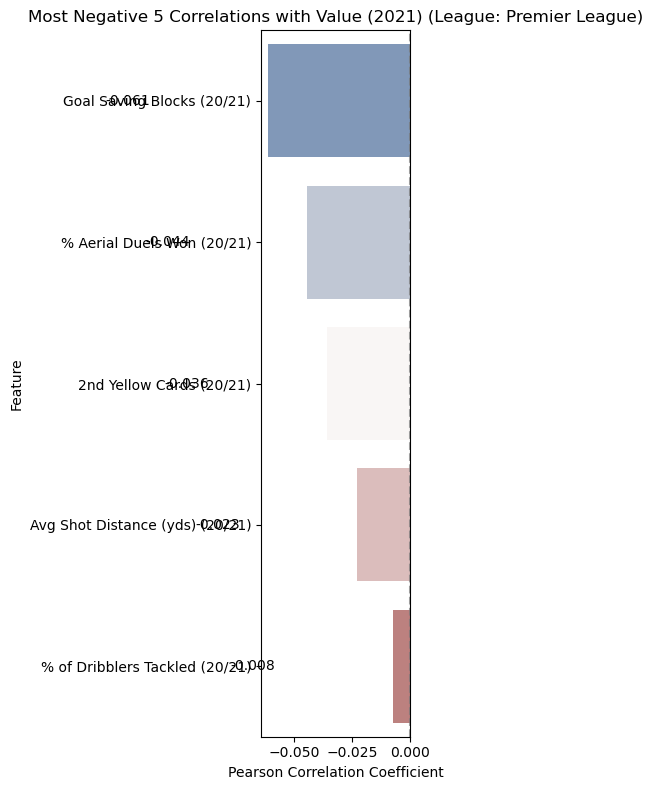


--- Value Difference (League: Premier League) ---

Top 20 (most positive) correlations with Value Difference in league 'Premier League':
 1. Number of Presses in Defensive Third (20/21): 0.194
 2. Tackles in Defensive 3rd (20/21): 0.193
 3. Total Interceptions (20/21): 0.171
 4. Interceptions (20/21): 0.171
 5. Total Players Tackled + Total Interceptions (20/21): 0.164

Bottom 20 (most negative) correlations with Value Difference in league 'Premier League':
 1. Non-Penalty xG (20/21): -0.390
 2. xG (20/21): -0.378
 3. Non-penalty xG+ xA (20/21): -0.378
 4. Non-Penalty Goals (20/21): -0.351
 5. Gls (20/21): -0.351


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


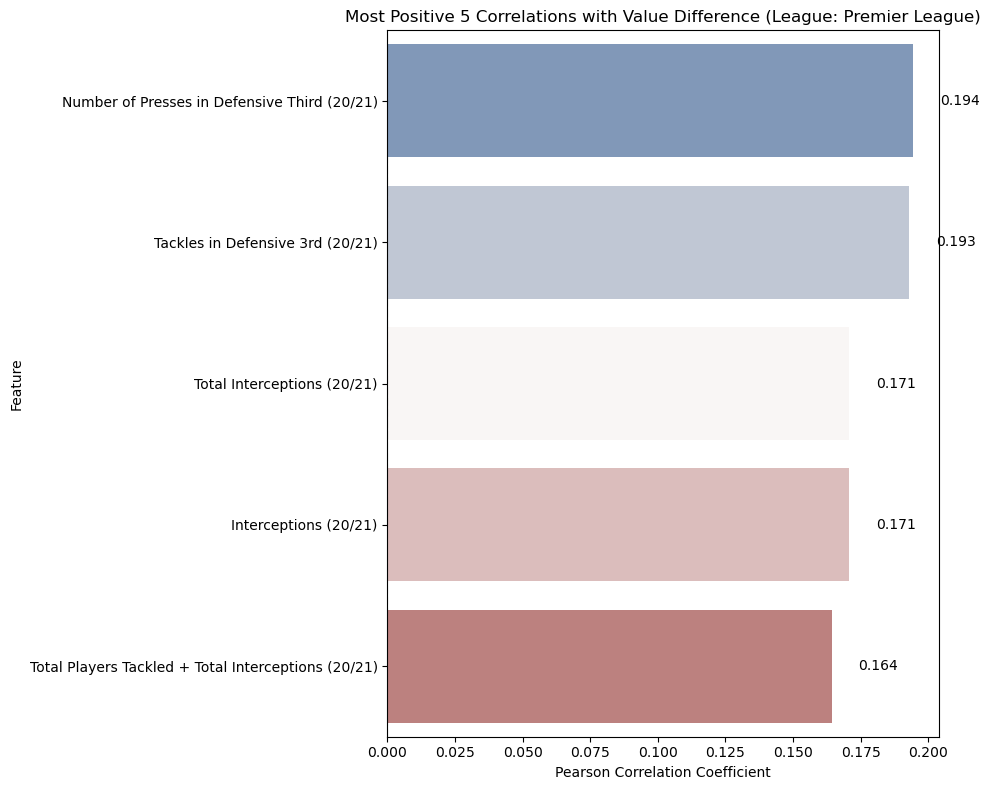

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


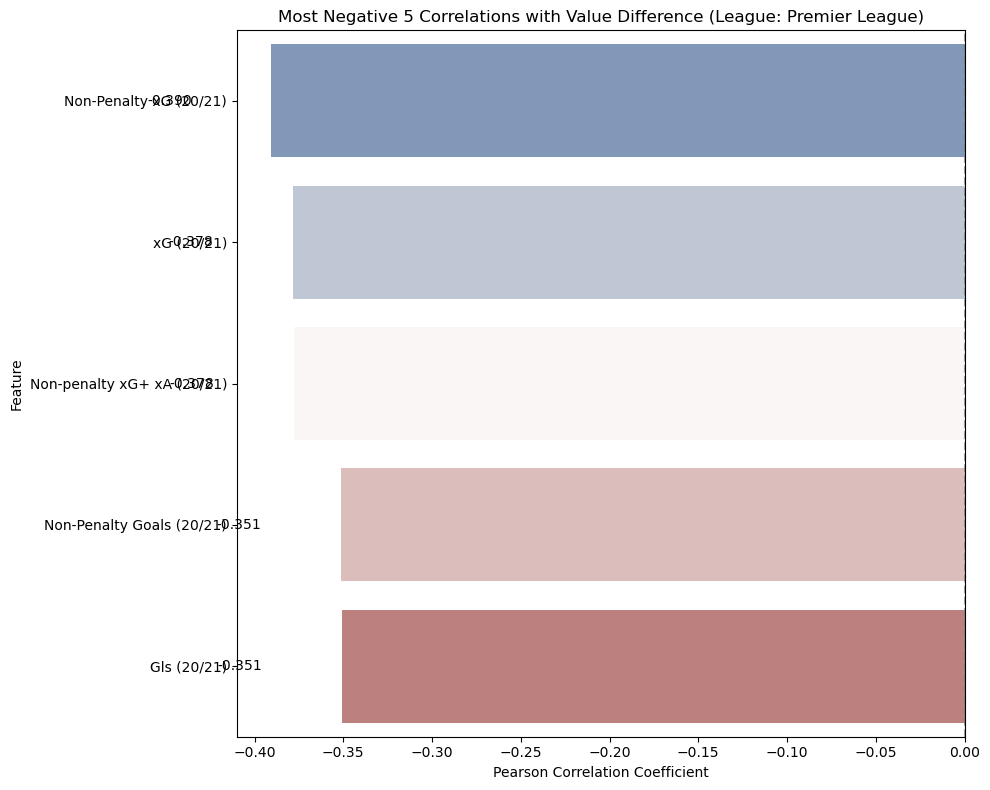


--- Value Difference (%) (League: Premier League) ---

Top 20 (most positive) correlations with Value Difference (%) in league 'Premier League':
 1. Goals/Shots on Target (20/21): 0.188
 2. Goals/Shots (20/21): 0.149
 3. Non-Penalty Goals/90 (20/21): 0.120
 4. Gls/90 (20/21): 0.096
 5. Pass Completion % (Long Passes) (20/21): 0.076

Bottom 20 (most negative) correlations with Value Difference (%) in league 'Premier League':
 1. MP (20/21): -0.146
 2. Min (20/21): -0.112
 3. Total Mins/90 (20/21): -0.112
 4. Starts (20/21): -0.110
 5. Number of Times Player was Pass Target (20/21): -0.106


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


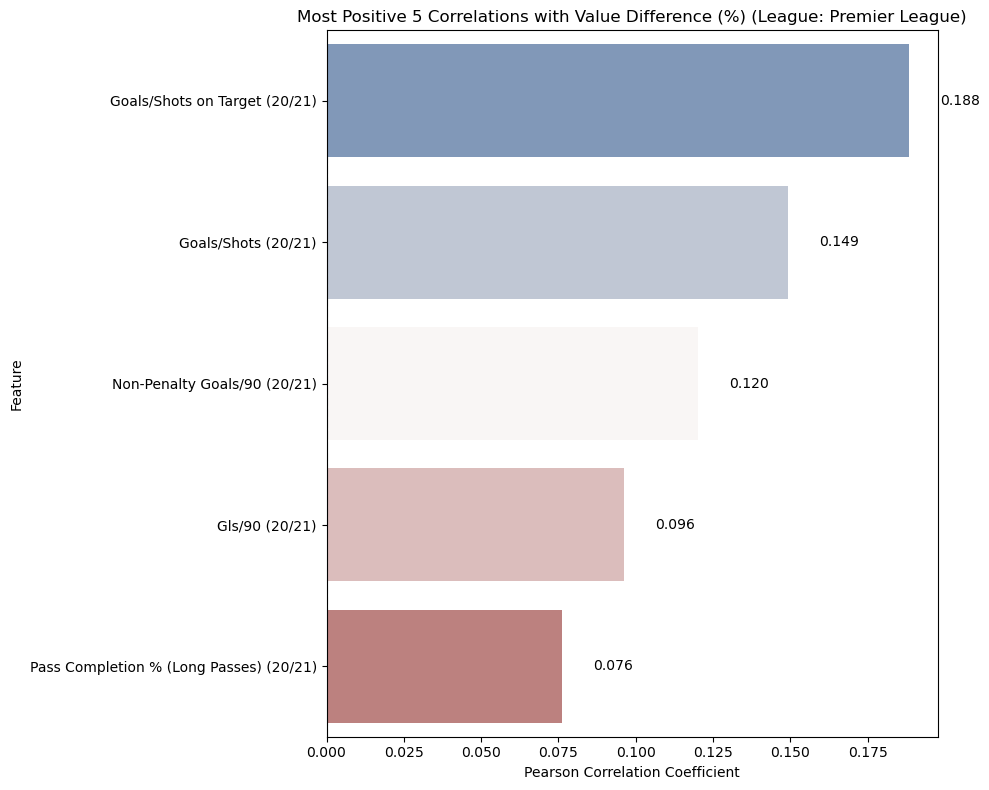

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")


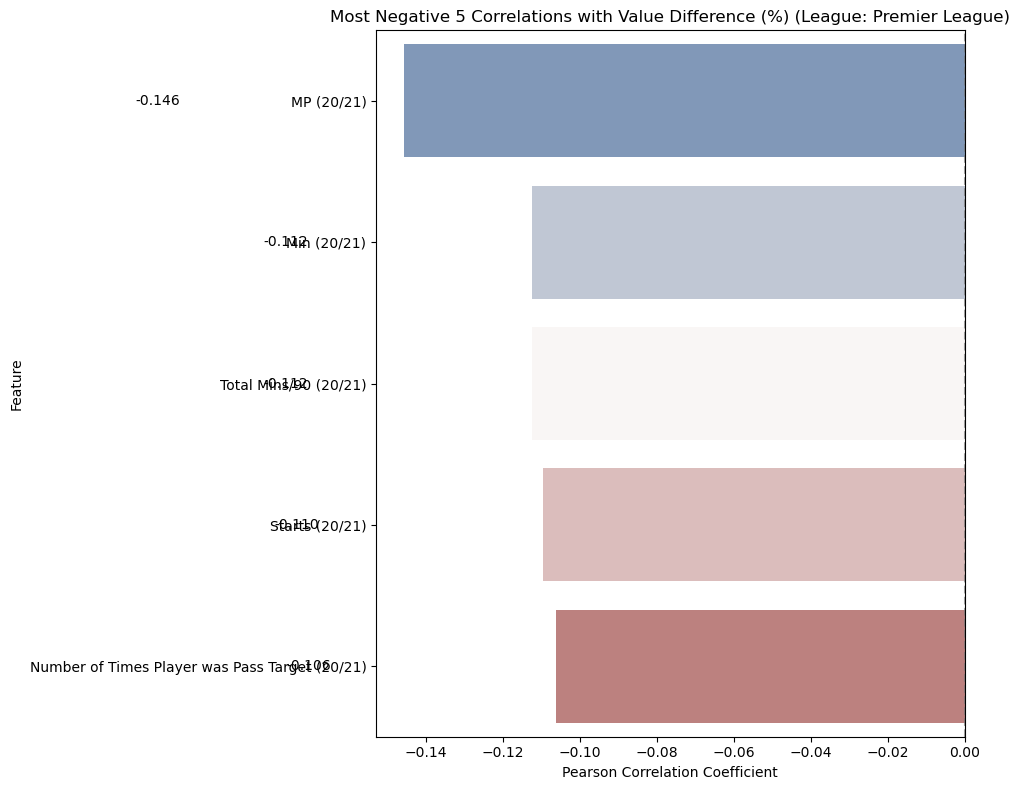


=== League Comparison ===


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y=metric, data=league_stats, palette='viridis')


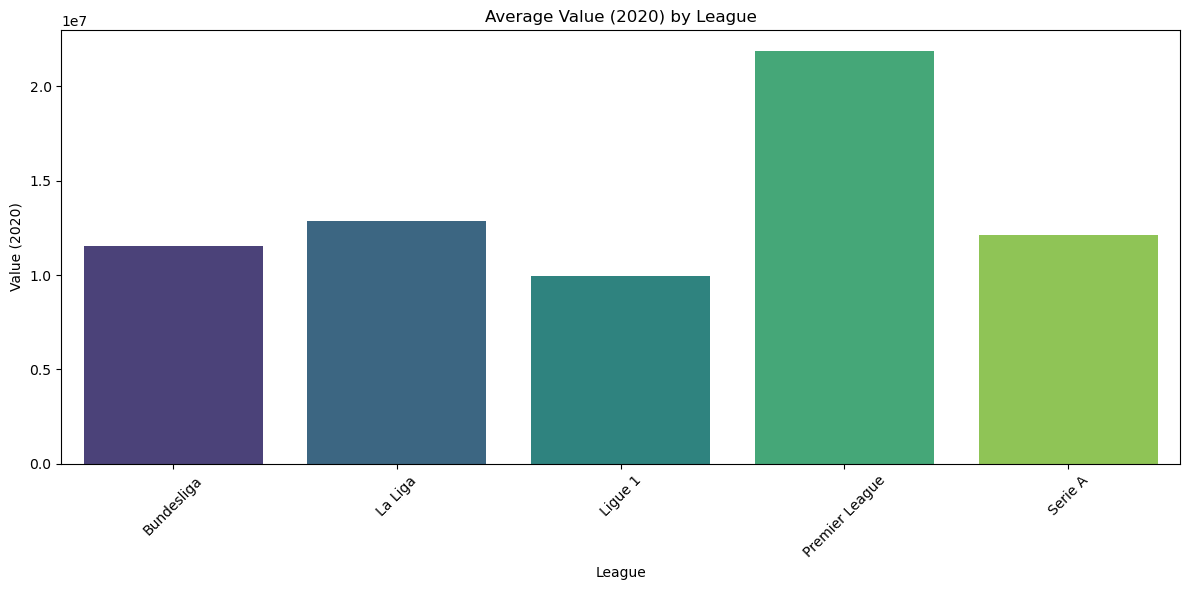

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y=metric, data=league_stats, palette='viridis')


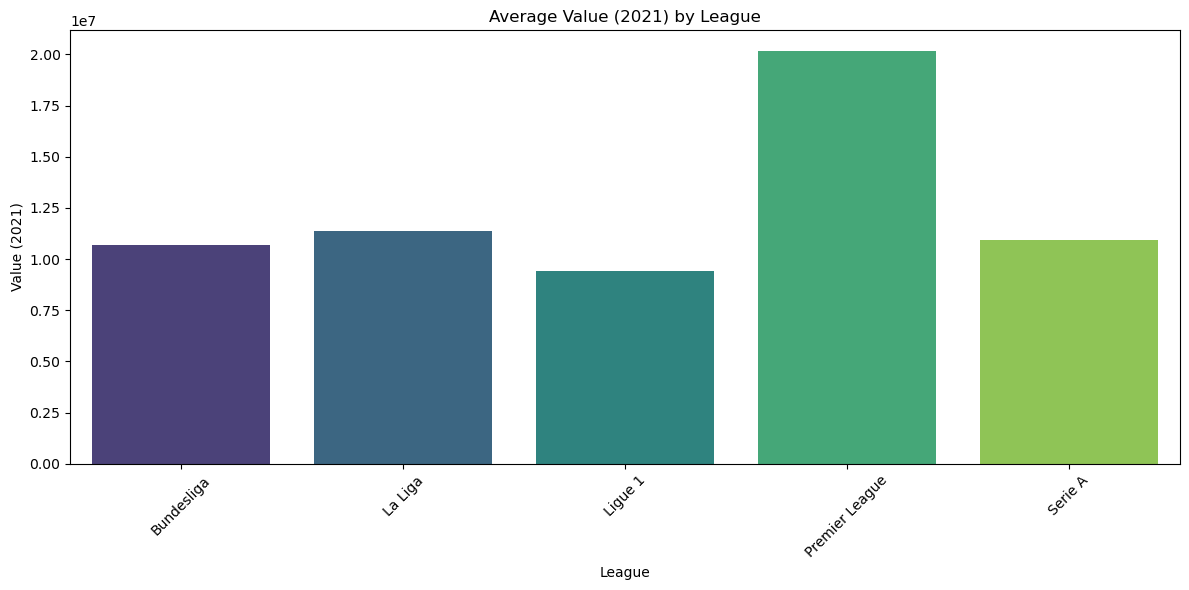

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y=metric, data=league_stats, palette='viridis')


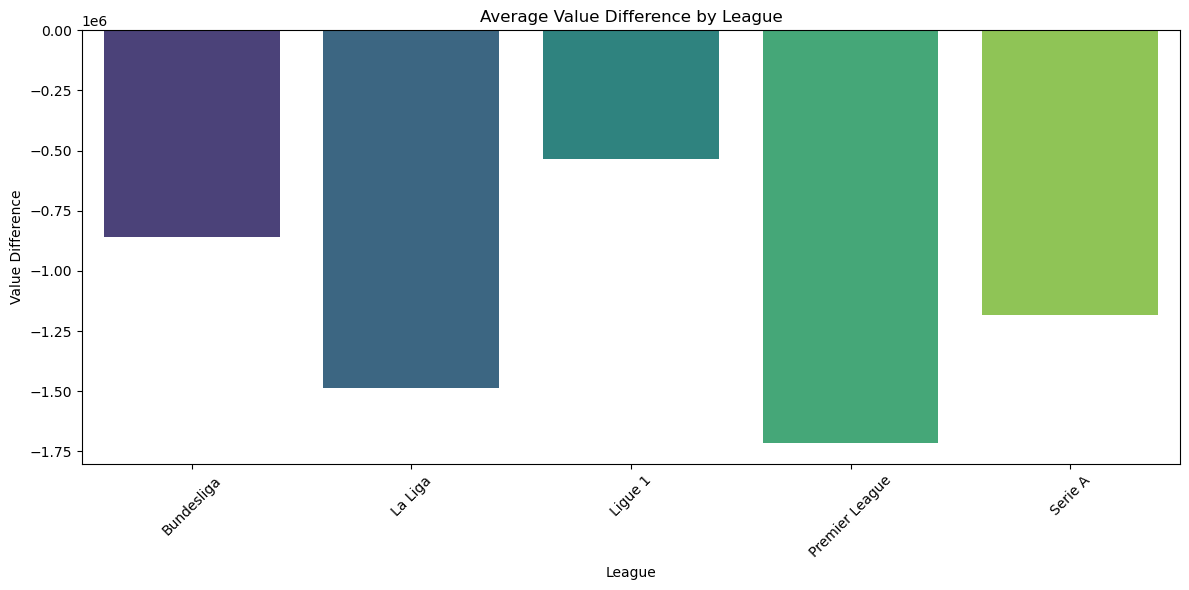

C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='League', y=metric, data=league_stats, palette='viridis')


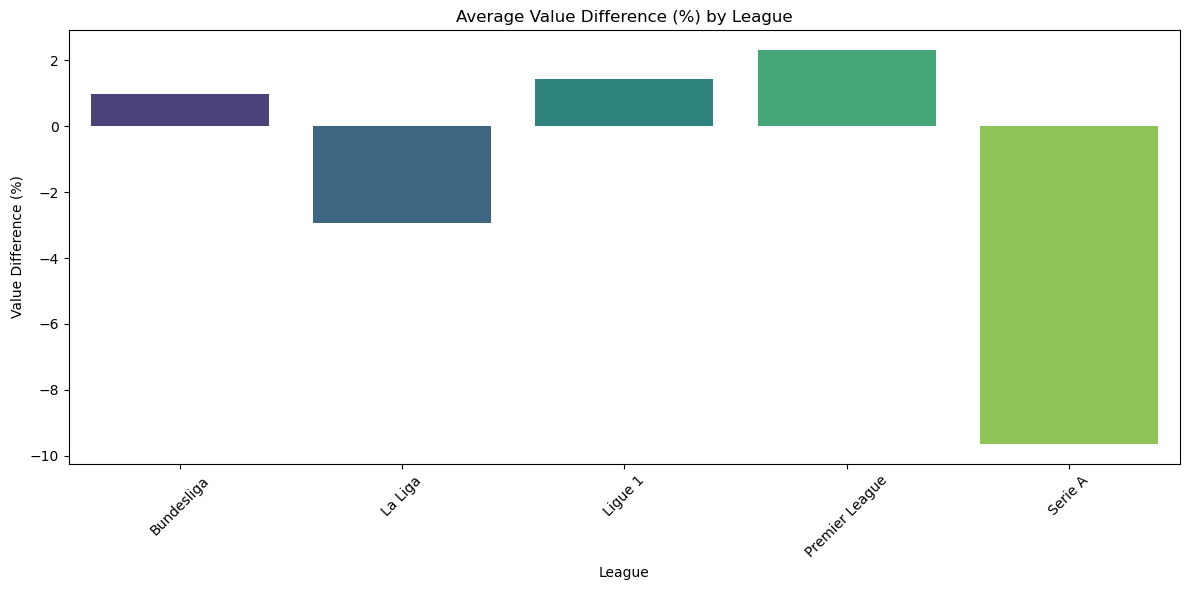


Value changes by league:
                Decreased  Increased  Total  Increased %
League                                                  
Bundesliga            226         78    304         25.7
La Liga               246         78    324         24.1
Ligue 1               207        101    308         32.8
Premier League        262         75    337         22.3
Serie A               254         81    335         24.2


C:\Users\ardao\AppData\Local\Temp\ipykernel_18832\275467329.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=league_value_change.index, y=league_value_change['Increased %'], palette='RdYlGn')


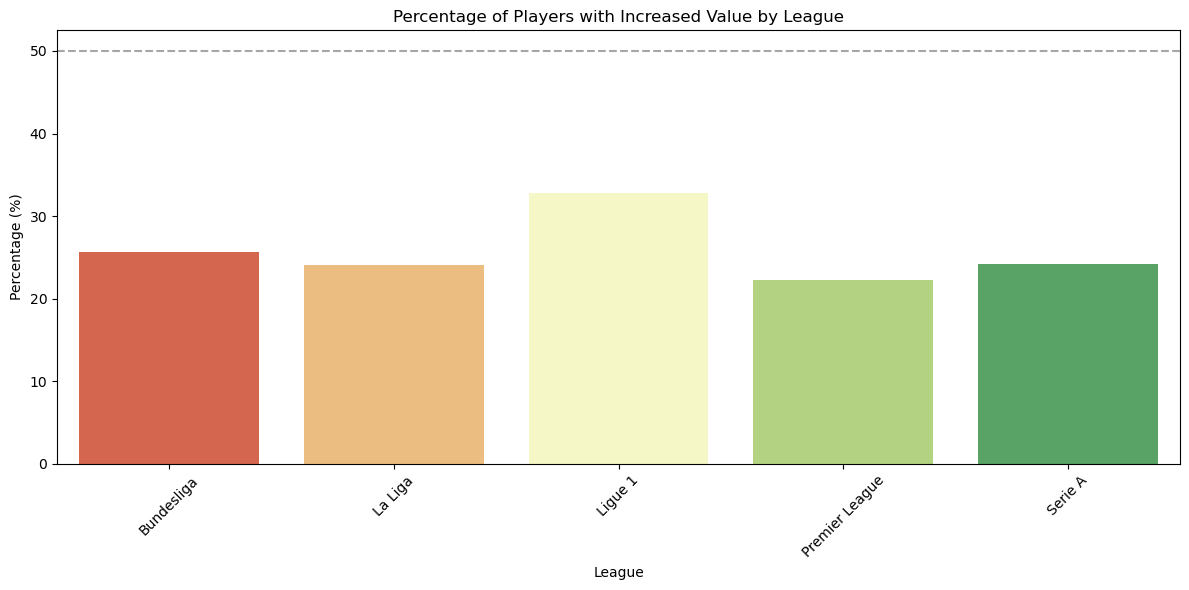

In [5]:
# Define columns that are not stats (for example: Player names and Squad info)
non_stat_cols = ['Player', 'Squad (20/21)']

# Define the value metrics to analyze
value_metrics = ['Value (2020)', 'Value (2021)', 'Value Difference','Value Difference (%)']

# Select only numeric columns for correlation analysis
# Get all numeric columns
all_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Get the first 6 columns of the dataframe
first_six_cols = df.columns[:10].tolist()

# Select only numeric columns that are not in the first 6 columns
numeric_cols = [col for col in all_numeric_cols if col not in first_six_cols]

# ---------------------------
# 2. Correlation Computation Function
# ---------------------------

def compute_correlations(data, target_columns, stat_columns):
    """
    Computes Pearson correlations between each target column and all other numeric stat columns.
    Returns a dictionary mapping target columns to a tuple of:
    (sorted by magnitude, sorted by actual value)
    """
    results = {}
    for target in target_columns:
        corr = {}
        for col in stat_columns:
            if col != target:
                corr_val = data[target].corr(data[col])
                corr[col] = corr_val
        
        # Sort by absolute value (magnitude) - strongest correlations first
        corr_by_magnitude = dict(sorted(corr.items(), key=lambda x: abs(x[1]) if pd.notnull(x[1]) else 0, reverse=True))
        
        # Sort by actual value - most positive first, most negative last
        corr_by_value = dict(sorted(corr.items(), key=lambda x: x[1] if pd.notnull(x[1]) else 0, reverse=True))
        
        results[target] = (corr_by_magnitude, corr_by_value)
    return results

def plot_correlations(corr_dict, target, top_n=5, group_label="Overall", plot_type="top"):
    """
    Plots a horizontal bar plot for correlations for a given target metric.
    plot_type can be "top" (most positive), "bottom" (most negative), or "strongest" (by magnitude)
    """
    if plot_type == "strongest":
        # Use correlations sorted by magnitude
        all_corr = list(corr_dict[0].items())
        title_prefix = "Strongest"
    elif plot_type == "top":
        # Use correlations sorted by value, take first top_n
        all_corr = list(corr_dict[1].items())[:top_n]
        title_prefix = "Most Positive"
    elif plot_type == "bottom":
        # Use correlations sorted by value, take last bottom_n
        all_corr = list(corr_dict[1].items())[-top_n:]
        all_corr.reverse()  # Reverse to show most negative first
        title_prefix = "Most Negative"
    
    features, corr_values = zip(*all_corr)
    
    plt.figure(figsize=(10, 8))
    bar_plot = sns.barplot(x=list(corr_values), y=list(features), orient='h', palette="vlag")
    
    # Add value labels to the bars
    for i, v in enumerate(corr_values):
        bar_plot.text(v + (0.01 if v >= 0 else -0.07), i, f"{v:.3f}", va='center')
    
    plt.title(f"{title_prefix} {top_n} Correlations with {target} ({group_label})")
    plt.xlabel("Pearson Correlation Coefficient")
    plt.ylabel("Feature")
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)  # Add vertical line at x=0
    plt.tight_layout()
    plt.show()

# ---------------------------
# 3. Overall Analysis
# ---------------------------

print("=== Overall Correlation Analysis ===")
overall_corr = compute_correlations(df, value_metrics, numeric_cols)

# For each value metric, print and plot the top and bottom correlations
for target, corr_tuple in overall_corr.items():
    # Get the correlations sorted by magnitude and by value
    corr_by_magnitude, corr_by_value = corr_tuple
    
    print(f"\n--- {target} ---")
    
    # Print Top 20 most positive correlations
    top_20 = list(corr_by_value.items())[:5]
    print(f"\nTop 20 (most positive) correlations with {target}:")
    for i, (col, val) in enumerate(top_20, 1):
        print(f"{i:2d}. {col}: {val:.3f}")
    
    # Print Bottom 20 most negative correlations
    bottom_20 = list(corr_by_value.items())[-5:]
    bottom_20.reverse()  # Reverse to show most negative first
    print(f"\nBottom 20 (most negative) correlations with {target}:")
    for i, (col, val) in enumerate(bottom_20, 1):
        print(f"{i:2d}. {col}: {val:.3f}")
    
    # Plot top 20 most positive correlations
    plot_correlations(corr_tuple, target, top_n=5, group_label="Overall", plot_type="top")
    
    # Plot bottom 20 most negative correlations
    plot_correlations(corr_tuple, target, top_n=5, group_label="Overall", plot_type="bottom")

# ---------------------------
# 4. Group-wise Analysis by Category
# ---------------------------

print("\n=== Group-wise Analysis by 'Category' ===")
categories = df['Category'].unique()

for cat in categories:
    cat_data = df[df['Category'] == cat]
    # Get numeric columns for the current group
    all_cat_numeric_cols = cat_data.select_dtypes(include=[np.number]).columns.tolist()
    first_six_cat_cols = cat_data.columns[:10].tolist()
    cat_numeric_cols = [col for col in all_cat_numeric_cols if col not in first_six_cat_cols]
    
    # Compute correlations for the group
    cat_corr = compute_correlations(cat_data, value_metrics, cat_numeric_cols)
    
    print(f"\n--- Group: {cat} ---")
    for target, corr_tuple in cat_corr.items():
        # Get the correlations sorted by magnitude and by value
        corr_by_magnitude, corr_by_value = corr_tuple
        
        print(f"\n--- {target} (Group: {cat}) ---")
        
        # Print Top 20 most positive correlations
        top_20 = list(corr_by_value.items())[:5]
        print(f"\nTop 20 (most positive) correlations with {target} in group '{cat}':")
        for i, (col, val) in enumerate(top_20, 1):
            print(f"{i:2d}. {col}: {val:.3f}")
        
        # Print Bottom 20 most negative correlations
        bottom_20 = list(corr_by_value.items())[-5:]
        bottom_20.reverse()  # Reverse to show most negative first
        print(f"\nBottom 20 (most negative) correlations with {target} in group '{cat}':")
        for i, (col, val) in enumerate(bottom_20, 1):
            print(f"{i:2d}. {col}: {val:.3f}")
        
        # Plot top 20 most positive correlations
        plot_correlations(corr_tuple, target, top_n=5, group_label=cat, plot_type="top")
        
        # Plot bottom 20 most negative correlations
        plot_correlations(corr_tuple, target, top_n=5, group_label=cat, plot_type="bottom")

    # Add this after the Category Analysis

# ---------------------------
# 5. Group-wise Analysis by League
# ---------------------------

print("\n=== Group-wise Analysis by 'League' ===")
leagues = df['League'].unique()

for league in leagues:
    league_data = df[df['League'] == league]
    # Get numeric columns for the current league
    all_league_numeric_cols = league_data.select_dtypes(include=[np.number]).columns.tolist()
    first_six_league_cols = league_data.columns[:10].tolist()
    league_numeric_cols = [col for col in all_league_numeric_cols if col not in first_six_league_cols]
    
    # Compute correlations for the group
    league_corr = compute_correlations(league_data, value_metrics, league_numeric_cols)
    
    print(f"\n--- League: {league} ---")
    print(f"Number of players: {league_data.shape[0]}")
    
    for target, corr_tuple in league_corr.items():
        # Get the correlations sorted by magnitude and by value
        corr_by_magnitude, corr_by_value = corr_tuple
        
        print(f"\n--- {target} (League: {league}) ---")
        
        # Print Top 20 most positive correlations
        top_20 = list(corr_by_value.items())[:5]
        print(f"\nTop 20 (most positive) correlations with {target} in league '{league}':")
        for i, (col, val) in enumerate(top_20, 1):
            print(f"{i:2d}. {col}: {val:.3f}")
        
        # Print Bottom 20 most negative correlations
        bottom_20 = list(corr_by_value.items())[-5:]
        bottom_20.reverse()  # Reverse to show most negative first
        print(f"\nBottom 20 (most negative) correlations with {target} in league '{league}':")
        for i, (col, val) in enumerate(bottom_20, 1):
            print(f"{i:2d}. {col}: {val:.3f}")
        
        # Plot top 20 most positive correlations
        plot_correlations(corr_tuple, target, top_n=5, group_label=f"League: {league}", plot_type="top")
        
        # Plot bottom 20 most negative correlations
        plot_correlations(corr_tuple, target, top_n=5, group_label=f"League: {league}", plot_type="bottom")

# Visualization comparing leagues
print("\n=== League Comparison ===")

# Compare average value metrics across leagues
league_stats = df.groupby('League')[value_metrics].mean().reset_index()

# Plot bar charts for each value metric
for metric in value_metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='League', y=metric, data=league_stats, palette='viridis')
    plt.title(f'Average {metric} by League')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Count of players with increased vs decreased value by league
league_value_change = df.groupby(['League', df['Value Difference'] > 0]).size().unstack()
league_value_change.columns = ['Decreased', 'Increased']
league_value_change['Total'] = league_value_change['Decreased'] + league_value_change['Increased']
league_value_change['Increased %'] = (league_value_change['Increased'] / league_value_change['Total'] * 100).round(1)

print("\nValue changes by league:")
print(league_value_change)

# Visualize percentage of players with increased values by league
plt.figure(figsize=(12, 6))
sns.barplot(x=league_value_change.index, y=league_value_change['Increased %'], palette='RdYlGn')
plt.title('Percentage of Players with Increased Value by League')
plt.ylabel('Percentage (%)')
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7)  # Add reference line at 50%
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

